В цьому ноутбуці ми проведемо дослідницький аналіз даних про історичні платежі по кредитам клієнтами.

[Опис колонок в даних тут.](https://drive.google.com/file/d/1Yp2aOdC33QFAVfTyxav_gKGwi4M9VN1Z/view?usp=sharing)

Цільова змінна TARGET тут має наступне значення: 1 – клієнт із труднощами з оплатою: він/вона прострочив платіж понад X днів принаймні одного з перших Y платежів кредиту в нашій вибірці, 0 – усі інші випадки

Задача - виявити, яким клієнтам видавати кредит, а яким - не варто, бо вони з високою імовірністю його не повернуть.

Дані взяті з [Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter). Прошу використовувати саме ті, які надані в нашому курсі, аби нам бути впевненими, що ми точно працюємо з одними і тими ж даними.

# Імпорт необхідних бібліотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Імпорт даних

Вмонтуємо наш диск, якщо Ви працюєте в Google Colab. Якщо працюєте локально, пропустіть наступну клітинку.

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Знайдемо, де лежать наші файли з даними. В мене вони знаходяться тут:

In [3]:
!ls '/Users/marynadeorditsa/ML_Learning/Lesson_materials/Module_1'

First_JN.ipynb
archive
health_insurance_cross_sell_prediction.csv
kompiuterna_gramotnist_ta_instrumenti_dlia_roboti_z_kodom.pdf
osnovni_komandi_v_bash_ta_powershell.pdf
supermarket_sales.csv
Як встановити Anaconda.pdf


Якщо треба зчитати опис, то робимо це аналогічно.

In [4]:
descr = pd.read_csv("/Users/marynadeorditsa/ML_Learning/Lesson_materials/Module_1/archive/columns_description.csv")

In [5]:
descr.loc[1].Description

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

Зчитуємо дані.

In [6]:
!ls '/Users/marynadeorditsa/ML Learning/Lesson materials/Module_1/archive/'

ls: /Users/marynadeorditsa/ML Learning/Lesson materials/Module_1/archive/: No such file or directory


In [7]:
df = pd.read_csv("/Users/marynadeorditsa/ML_Learning/Lesson_materials/Module_1/archive/application_data.csv")

In [8]:
description = pd.read_csv("/Users/marynadeorditsa/ML_Learning/Lesson_materials/Module_1/archive/columns_description.csv")

In [9]:
description.head()

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [10]:
#перевірила подивилась опис стовпців
print(description.loc[description['Row'] == 'AMT_REQ_CREDIT_BUREAU_HOUR', 'Description'].iloc[0])

Number of enquiries to Credit Bureau about the client one hour before application


In [11]:
# Огляд декількох записів з датафрейму
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Перевірка структури даних

In [12]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [13]:
df.shape

(307511, 122)

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [14]:
df.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00 307511.00     307511.00         307511.00   307511.00   
mean    278180.52      0.08          0.42         168797.92   599026.00   
std     102790.18      0.27          0.72         237123.15   402490.78   
min     100002.00      0.00          0.00          25650.00    45000.00   
25%     189145.50      0.00          0.00         112500.00   270000.00   
50%     278202.00      0.00          0.00         147150.00   513531.00   
75%     367142.50      0.00          1.00         202500.00   808650.00   
max     456255.00      1.00         19.00      117000000.00  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count      307511.00          307511.00        307511.00    104582.00   
mean        63815.05           -4986.12         -2994.20        12.06   
std        141275.77            3522.89          1509.45        11.94   
min        -17912.00          -24672.00         -7197.00         0.00   
25%         -2760.00           -7479.50         -4299.00         5.00   
50%         -1213.00           -4504.00         -3254.00         9.00   
75%          -289.00           -2010.00         -1720.00        15.00   
max        365243.00               0.00             0.00        91.00   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   307511.00       307511.00        307511.00         307511.00   
mean         1.00            0.82             0.20              1.00   
std          0.00            0.38             0.40              0.04   
min          0.00            0.00             0.00              0.00   
25%          1.00            1.00             0.00              1.00   
50%          1.00            1.00             0.00              1.00   
75%          1.00            1.00             0.00              1.00   
max          1.00            1.00             1.00              1.00   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   307511.00   307511.00        307509.00             307511.00   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min          0.00        0.00             1.00                  1.00   
25%          0.00        0.00             2.00                  2.00   
50%          0.00        0.00             2.00                  2.00   
75%          1.00        0.00             3.00                  2.00   
max          1.00        1.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                    307511.00                307511.00   
mean                          2.03                    12.06   
std                           0.50                     3.27   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   307511

# Аналіз категоріальних змінних

In [15]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [16]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

16

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [17]:
number_df = df.select_dtypes(include="number")

In [18]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [19]:
# Перевірка кількості числових змінних
len(number_df.columns)

106

Дані містять 106 `numerical` змінних

In [20]:
number_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0         202500.00   406597.50   
1      100003       0             0         270000.00  1293502.50   
2      100004       0             0          67500.00   135000.00   
3      100006       0             0         135000.00   312682.50   
4      100007       0             0         121500.00   513000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     24700.50        351000.00                        0.02       -9461   
1     35698.50       1129500.00                        0.00      -16765   
2      6750.00        135000.00                        0.01      -19046   
3     29686.50        297000.00                        0.01      -19005   
4     21865.50        513000.00                        0.03      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637           -3648.00            -2120          NaN           1   
1          -1188           -1186.00             -291          NaN           1   
2           -225           -4260.00            -2531        26.00           1   
3          -3039           -9833.00            -2437          NaN           1   
4          -3038           -4311.00            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             1.00                     2                            2   
1             2.00                     1                            1   
2             1.00                     2                            2   
3             2.00                     2                            2   
4             1.00                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.08          0.26          0.14            0.02              0.04   
1          0.31          0.62           NaN            0.10              0.05   
2           NaN          0.56          0.73             NaN               NaN   
3           NaN          0.65           NaN             NaN               NaN   
4           NaN          0.32           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [21]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Дивлячись на дані та відповідні їм типи даних, можна змінити тип стовпчика SKU.

In [22]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [23]:
df.memory_usage().sum()/1024/1024

286.22710037231445

In [24]:
'flag' in 'SK_ID_CURR'.lower()

False

In [25]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [26]:
df[df.columns[flag_cols]].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [27]:
df[df.columns[flag_cols]].nunique()

FLAG_OWN_CAR        2
FLAG_OWN_REALTY     2
FLAG_MOBIL          2
FLAG_EMP_PHONE      2
FLAG_WORK_PHONE     2
FLAG_CONT_MOBILE    2
FLAG_PHONE          2
FLAG_EMAIL          2
FLAG_DOCUMENT_2     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_4     2
FLAG_DOCUMENT_5     2
FLAG_DOCUMENT_6     2
FLAG_DOCUMENT_7     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_10    2
FLAG_DOCUMENT_11    2
FLAG_DOCUMENT_12    2
FLAG_DOCUMENT_13    2
FLAG_DOCUMENT_14    2
FLAG_DOCUMENT_15    2
FLAG_DOCUMENT_16    2
FLAG_DOCUMENT_17    2
FLAG_DOCUMENT_18    2
FLAG_DOCUMENT_19    2
FLAG_DOCUMENT_20    2
FLAG_DOCUMENT_21    2
dtype: int64

Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [28]:
import numpy as np
from sys import getsizeof

In [29]:
getsizeof(np.int64(1))

32

In [30]:
getsizeof(np.int8(1))

25

In [31]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [32]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [33]:
df[str_flag_cols]


FLAG_OWN_CAR FLAG_OWN_REALTY
0                 N               Y
1                 N               N
2                 Y               Y
3                 N               Y
4                 N               Y
...             ...             ...
307506            N               N
307507            N               Y
307508            N               Y
307509            N               Y
307510            N               N

[307511 rows x 2 columns]

In [34]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [35]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [36]:
df.columns[flag_cols]

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [37]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [38]:
df.memory_usage().sum()/1024/1024

228.7470932006836

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає null-значень в нашому наборі даних

In [39]:
df.isnull().values.any()

True

Порахуємо загальну кількість null-значень в наборі даних

In [40]:
df.isnull().values.sum()

9152465

Сформуємо список із стовпців з null-значеннями

In [41]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [42]:
len(df.columns[df.isnull().any()])

67

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [43]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [44]:
null_percentage

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [45]:
df.shape[0]

307511

In [46]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [47]:
null_df

column_name  null_count  null_percentage
0                      SK_ID_CURR           0             0.00
1                          TARGET           0             0.00
2              NAME_CONTRACT_TYPE           0             0.00
3                     CODE_GENDER           0             0.00
4                    FLAG_OWN_CAR           0             0.00
5                 FLAG_OWN_REALTY           0             0.00
6                    CNT_CHILDREN           0             0.00
7                AMT_INCOME_TOTAL           0             0.00
8                      AMT_CREDIT           0             0.00
9                     AMT_ANNUITY          12             0.00
10                AMT_GOODS_PRICE         278             0.09
11                NAME_TYPE_SUITE        1292             0.42
12               NAME_INCOME_TYPE           0             0.00
13            NAME_EDUCATION_TYPE           0             0.00
14             NAME_FAMILY_STATUS           0             0.00
15              NAME_HOUSING_TYPE           0             0.00
16     REGION_POPULATION_RELATIVE           0             0.00
17                     DAYS_BIRTH           0             0.00
18                  DAYS_EMPLOYED           0             0.00
19              DAYS_REGISTRATION           0             0.00
20                DAYS_ID_PUBLISH           0             0.00
21                    OWN_CAR_AGE      202929            65.99
22                     FLAG_MOBIL           0             0.00
23                 FLAG_EMP_PHONE           0             0.00
24                FLAG_WORK_PHONE           0             0.00
25               FLAG_CONT_MOBILE           0             0.00
26                     FLAG_PHONE           0             0.00
27                     FLAG_EMAIL           0             0.00
28                OCCUPATION_TYPE       96391            31.35
29                CNT_FAM_MEMBERS           2             0.00
30           REGION_RATING_CLIENT           0             0.00
31    REGION_RATING_CLIENT_W_CITY           0             0.00
32     WEEKDAY_APPR_PROCESS_START           0             0.00
33        HOUR_APPR_PROCESS_START           0             0.00
34     REG_REGION_NOT_LIVE_REGION           0             0.00
35     REG_REGION_NOT_WORK_REGION           0             0.00
36    LIVE_REGION_NOT_WORK_REGION           0             0.00
37         REG_CITY_NOT_LIVE_CITY           0             0.00
38         REG_CITY_NOT_WORK_CITY           0             0.00
39        LIVE_CITY_NOT_WORK_CITY           0             0.00
40              ORGANIZATION_TYPE           0             0.00
41                   EXT_SOURCE_1      173378            56.38
42                   EXT_SOURCE_2         660             0.21
43                   EXT_SOURCE_3       60965            19.83
44                 APARTMENTS_AVG      156061            50.75
45               BASEMENTAREA_AVG      179943            58.52
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
47                YEARS_BUILD_AVG      204488            66.50
48                 COMMONAREA_AVG      214865            69.87
49                  ELEVATORS_AVG      163891            53.30
50                  ENTRANCES_AVG      154828            50.35
51                  FLOORSMAX_AVG      153020            49.76
52                  FLOORSMIN_AVG      208642            67.85
53                   LANDAREA_AVG      182590            59.38
54           LIVINGAPARTMENTS_AVG      210199            68.35
55                 LIVINGAREA_AVG      154350            50.19
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
57              NONLIVINGAREA_AVG      169682            55.18
58                APARTMENTS_MODE      156061            50.75
59              BASEMENTAREA_MODE      179943            58.52
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
61               YEARS_BUILD_MODE      204488            66.50
62                COMMONAREA_MODE      214865        

In [48]:
null_df.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
76                COMMONAREA_MEDI      214865            69.87
48                 COMMONAREA_AVG      214865            69.87
62                COMMONAREA_MODE      214865            69.87
70       NONLIVINGAPARTMENTS_MODE      213514            69.43
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
84       NONLIVINGAPARTMENTS_MEDI      213514            69.43
86             FONDKAPREMONT_MODE      210295            68.39
68          LIVINGAPARTMENTS_MODE      210199            68.35
54           LIVINGAPARTMENTS_AVG      210199            68.35
82          LIVINGAPARTMENTS_MEDI      210199            68.35
52                  FLOORSMIN_AVG      208642            67.85
66                 FLOORSMIN_MODE      208642            67.85
80                 FLOORSMIN_MEDI      208642            67.85
75               YEARS_BUILD_MEDI      204488            66.50
61               YEARS_BUILD_MODE      204488            66.50
47                YEARS_BUILD_AVG      204488            66.50
21                    OWN_CAR_AGE      202929            65.99
81                  LANDAREA_MEDI      182590            59.38
67                  LANDAREA_MODE      182590            59.38
53                   LANDAREA_AVG      182590            59.38
73              BASEMENTAREA_MEDI      179943            58.52
45               BASEMENTAREA_AVG      179943            58.52
59              BASEMENTAREA_MODE      179943            58.52
41                   EXT_SOURCE_1      173378            56.38
71             NONLIVINGAREA_MODE      169682            55.18
57              NONLIVINGAREA_AVG      169682            55.18
85             NONLIVINGAREA_MEDI      169682            55.18
77                 ELEVATORS_MEDI      163891            53.30
49                  ELEVATORS_AVG      163891            53.30
63                 ELEVATORS_MODE      163891            53.30
89             WALLSMATERIAL_MODE      156341            50.84
72                APARTMENTS_MEDI      156061            50.75
44                 APARTMENTS_AVG      156061            50.75
58                APARTMENTS_MODE      156061            50.75
78                 ENTRANCES_MEDI      154828            50.35
50                  ENTRANCES_AVG      154828            50.35
64                 ENTRANCES_MODE      154828            50.35
55                 LIVINGAREA_AVG      154350            50.19
69                LIVINGAREA_MODE      154350            50.19
83                LIVINGAREA_MEDI      154350            50.19
87                 HOUSETYPE_MODE      154297            50.18
65                 FLOORSMAX_MODE      153020            49.76
79                 FLOORSMAX_MEDI      153020            49.76
51                  FLOORSMAX_AVG      153020            49.76
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
74   YEARS_BEGINEXPLUATATION_MEDI      150007            48.78
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
88                 TOTALAREA_MODE      148431            48.27
90            EMERGENCYSTATE_MODE      145755            47.40
28                OCCUPATION_TYPE       96391            31.35
43                   EXT_SOURCE_3       60965            19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
117     AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119     AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
120     AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
11                NAME_TYPE_SUITE        1292             0.42
92       DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91       OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93       OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94       DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                   EXT_SOURCE_2         660        

## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [49]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [50]:
columns_to_be_deleted

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [51]:
len(columns_to_be_deleted)

49

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [52]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [53]:
df.shape

(307511, 73)

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [54]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [55]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
28               OCCUPATION_TYPE       96391            31.35
43                  EXT_SOURCE_3       60965            19.83
121   AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
120    AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
119    AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
118   AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
117    AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
116   AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
11               NAME_TYPE_SUITE        1292             0.42
91      OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92      DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93      OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94      DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                  EXT_SOURCE_2         660             0.21
10               AMT_GOODS_PRICE         278             0.09
101              FLAG_DOCUMENT_7           0             0.00
95        DAYS_LAST_PHONE_CHANGE           1             0.00
96               FLAG_DOCUMENT_2           0             0.00
97               FLAG_DOCUMENT_3           0             0.00
98               FLAG_DOCUMENT_4           0             0.00
99               FLAG_DOCUMENT_5           0             0.00
100              FLAG_DOCUMENT_6           0             0.00
105             FLAG_DOCUMENT_11           0             0.00
102              FLAG_DOCUMENT_8           0             0.00
103              FLAG_DOCUMENT_9           0             0.00
104             FLAG_DOCUMENT_10           0             0.00
39       LIVE_CITY_NOT_WORK_CITY           0             0.00
106             FLAG_DOCUMENT_12           0             0.00
107             FLAG_DOCUMENT_13           0             0.00
108             FLAG_DOCUMENT_14           0             0.00
109             FLAG_DOCUMENT_15           0             0.00
110             FLAG_DOCUMENT_16           0             0.00
111             FLAG_DOCUMENT_17           0             0.00
112             FLAG_DOCUMENT_18           0             0.00
113             FLAG_DOCUMENT_19           0             0.00
114             FLAG_DOCUMENT_20           0             0.00
115             FLAG_DOCUMENT_21           0             0.00
40             ORGANIZATION_TYPE           0             0.00
0                     SK_ID_CURR           0             0.00
38        REG_CITY_NOT_WORK_CITY           0             0.00
9                    AMT_ANNUITY          12             0.00
17                    DAYS_BIRTH           0             0.00
16    REGION_POPULATION_RELATIVE           0             0.00
15             NAME_HOUSING_TYPE           0             0.00
14            NAME_FAMILY_STATUS           0             0.00
13           NAME_EDUCATION_TYPE           0             0.00
12              NAME_INCOME_TYPE           0             0.00
8                     AMT_CREDIT           0             0.00
1                         TARGET           0             0.00
7               AMT_INCOME_TOTAL           0             0.00
6                   CNT_CHILDREN           0             0.00
5                FLAG_OWN_REALTY           0             0.00
4                   FLAG_OWN_CAR           0             0.00
3                    CODE_GENDER           0             0.00
2             NAME_CONTRACT_TYPE           0             0.00
18                 DAYS_EMPLOYED           0             0.00
19             DAYS_REGISTRATION           0             0.00
20               DAYS_ID_PUBLISH           0             0.00
22                    FLAG_MOBIL           0             0.00
23                FLAG_EMP_PHONE           0             0.00
24               FLAG_WORK_PHONE           0             0.00
25              FLAG_CONT_MOBILE           0             0.00
26                    FLAG_PHONE           0             0.00
27                    FLAG_EMAIL           0         

Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [56]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Заміна NULL-значень на категорією `Unknown`

In [57]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

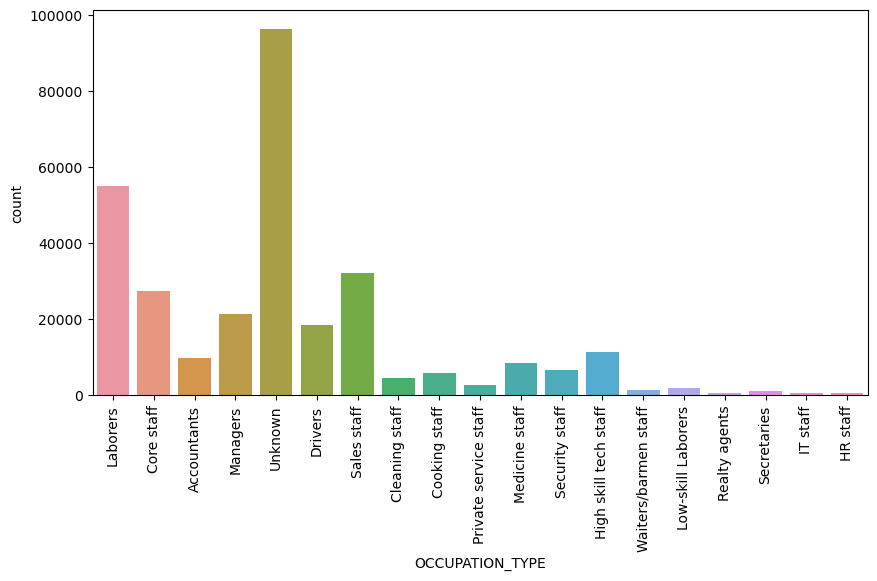

In [58]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [59]:
df.EXT_SOURCE_3.value_counts().head()

EXT_SOURCE_3
0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: count, dtype: int64

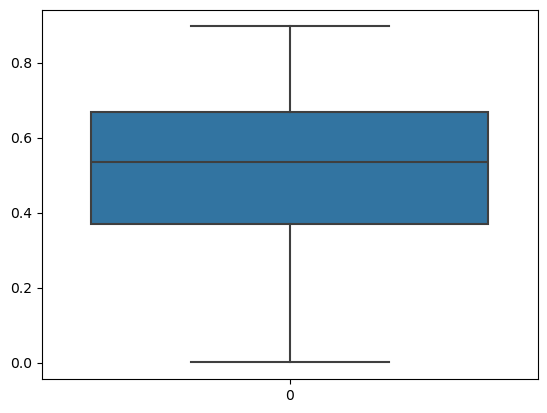

In [60]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [61]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

Найбільш повторюване значення в `EXT_SOURCE_3

In [62]:
df.EXT_SOURCE_3.mode()[0]

0.746300213050371

Перевірка середнього значення `EXT_SOURCE_3`

In [63]:
df.EXT_SOURCE_3.mean()

0.5108529061799658

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імплікації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імплікації. Якщо метод вимагає імплікації, ми можемо імплікувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпліковані.

# ДЗ 1. Аналіз стовпців `AMT_REQ_CREDIT_BUREAU` з пропущеними значеннями

Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

-  `AMT_REQ_CREDIT_BUREAU_YEAR`
-	`AMT_REQ_CREDIT_BUREAU_QRT`
-	`AMT_REQ_CREDIT_BUREAU_MON`
-	`AMT_REQ_CREDIT_BUREAU_WEEK`
-	`AMT_REQ_CREDIT_BUREAU_DAY`
-	`AMT_REQ_CREDIT_BUREAU_HOUR`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

`AMT_REQ_CREDIT_BUREAU_YEAR` - нульових значень 13.50%
Подивимось які значення приймають дані в цьому стовпці

In [64]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.00     71801
1.00     63405
2.00     50192
3.00     33628
4.00     20714
5.00     12052
6.00      6967
7.00      3869
8.00      2127
9.00      1096
11.00       31
12.00       30
10.00       22
13.00       19
14.00       10
17.00        7
15.00        6
19.00        4
18.00        4
16.00        3
25.00        1
23.00        1
22.00        1
21.00        1
20.00        1
Name: count, dtype: int64

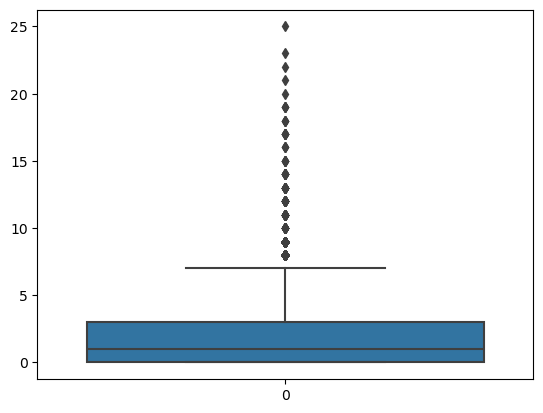

In [65]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

In [66]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.mean()

1.899974435321363

In [67]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0   0.00
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [68]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

`AMT_REQ_CREDIT_BUREAU_QRT` - пропущених значень 13.50%

In [69]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.00      215417
1.00       33862
2.00       14412
3.00        1717
4.00         476
5.00          64
6.00          28
8.00           7
7.00           7
261.00         1
19.00          1
Name: count, dtype: int64

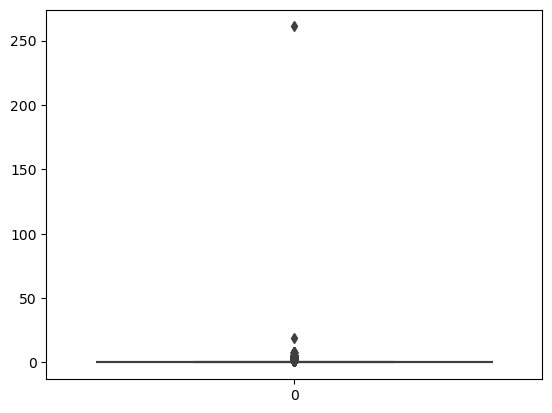

In [70]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

In [71]:
df.AMT_REQ_CREDIT_BUREAU_QRT.median()
df.AMT_REQ_CREDIT_BUREAU_QRT.mean()

0.26547414959848414

Стовпчик `AMT_REQ_CREDIT_BUREAU_QRT`. Пропущених значень 13.50%

In [72]:
df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.00     222233
1.00      33147
2.00       5386
3.00       1991
4.00       1076
5.00        602
6.00        343
7.00        298
9.00        206
8.00        185
10.00       132
11.00       119
12.00        77
13.00        72
14.00        40
15.00        35
16.00        23
17.00        14
18.00         6
19.00         3
24.00         1
23.00         1
27.00         1
22.00         1
Name: count, dtype: int64

In [73]:
print('mean - ' + str(df.AMT_REQ_CREDIT_BUREAU_MON.mean()))
print('median - ' + str(df.AMT_REQ_CREDIT_BUREAU_MON.median()))
print('mode - ' + str(df.AMT_REQ_CREDIT_BUREAU_MON.mode()))

mean - 0.26739526000781977
median - 0.0
mode - 0   0.00
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


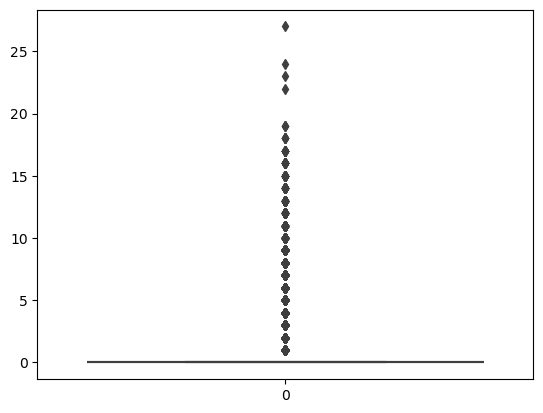

In [74]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_MON)
plt.show()

Далі розглянемо `AMT_REQ_CREDIT_BUREAU_WEEK` 

In [75]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.00    257456
1.00      8208
2.00       199
3.00        58
4.00        34
6.00        20
5.00        10
8.00         5
7.00         2
Name: count, dtype: int64

In [76]:
print('mean - ' + str(df.AMT_REQ_CREDIT_BUREAU_WEEK.mean()))
print('median - ' + str(df.AMT_REQ_CREDIT_BUREAU_WEEK.median()))
print('mode - ' + str(df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()))

mean - 0.0343619356973142
median - 0.0
mode - 0   0.00
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


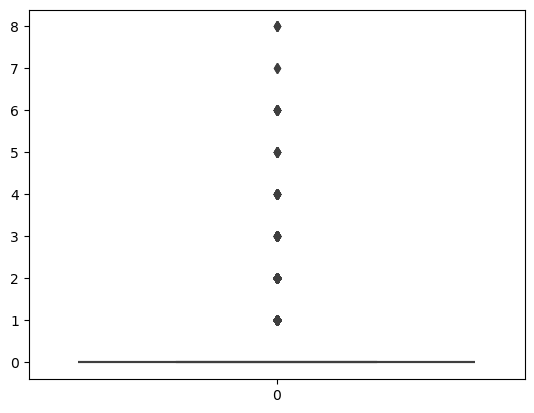

In [77]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_WEEK)
plt.show()

Стовпець `AMT_REQ_CREDIT_BUREAU_DAY`. Пропущених значень 13.50%

In [78]:
df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.00    264503
1.00      1292
2.00       106
3.00        45
4.00        26
5.00         9
6.00         8
9.00         2
8.00         1
Name: count, dtype: int64

In [79]:
print('mean - ' + str(df.AMT_REQ_CREDIT_BUREAU_DAY.mean()))
print('median - ' + str(df.AMT_REQ_CREDIT_BUREAU_DAY.median()))
print('mode - ' + str(df.AMT_REQ_CREDIT_BUREAU_DAY.mode()))

mean - 0.0070002105326475985
median - 0.0
mode - 0   0.00
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


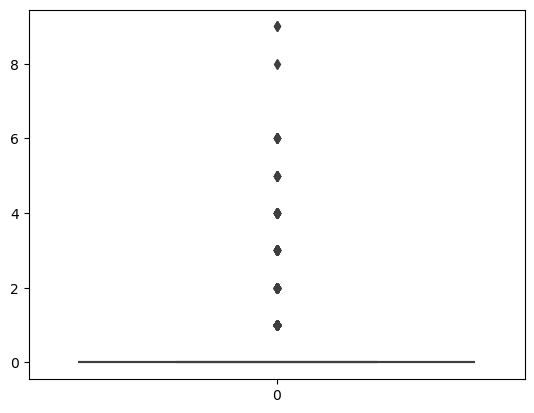

In [80]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_DAY)
plt.show()

Стовпець `AMT_REQ_CREDIT_BUREAU_HOUR`. Відсоток пропущених значень такий же, як і в попередніх стовпцях - 13.50%.

In [81]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.00    264366
1.00      1560
2.00        56
3.00         9
4.00         1
Name: count, dtype: int64

In [82]:
print('mean - ' + str(df.AMT_REQ_CREDIT_BUREAU_HOUR.mean()))
print('median - ' + str(df.AMT_REQ_CREDIT_BUREAU_HOUR.median()))
print('mode - ' + str(df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()))

mean - 0.006402448193930645
median - 0.0
mode - 0   0.00
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


`AMT_REQ_CREDIT_BUREAU_YEAR` - найпоширеніше значення цього стовпця є 0.00, значення медіани - 1.0. бачимо, що є викиди, але їх відносно небагато. Спочатку думала про те, щоб заповнити пропущені дані значенням медіани, але враховуючи, що їх там більше 40К, це призведе до значного збільшення колонки зі значеннями 1.0, що може в подальшому викривити підрахунки моделі. Тому, думаю, що для цього стовпчика варто взяти дані моди для заповнення відсутніх значень.

`AMT_REQ_CREDIT_BUREAU_QRT` - переважна більшість значень у цьому стовпці є 0.00 в тому числі медіана; середнє значення дуже близьке до нього і складає 0.26. Є 16 викидів даних. В цьому стовпці я б заповнила пропущені дані значенням 0.00.

`AMT_REQ_CREDIT_BUREAU_MON` - Середнє арифметичне складає 0.267, мода та медіана  = 0.0. Є викиди в значеннях від 3.0 до 22.0. Загалом такий же висновок, як і для попереднього стовпця. Зважаючи на моду та медіану, я б заповнила пропущені дані значенням 0.00.

`AMT_REQ_CREDIT_BUREAU_WEEK` - Середнє арифметичне складає 0.034, мода та медіана  = 0.0.  Зважаючи на моду та медіану, я б заповнила пропущені дані значенням 0.00.

`AMT_REQ_CREDIT_BUREAU_DAY` - Середнє арифметичне складає 0.007, мода та медіана  = 0.0.  Зважаючи на усі три показники, я б заповнила пропущені дані значенням 0.00.

`AMT_REQ_CREDIT_BUREAU_HOUR` - Середнє арифметичне складає 0.006, мода та медіана  = 0.0.  Зважаючи на усі три показники, я б заповнила пропущені дані значенням 0.00.

В усіх стовпцях є викиди, але їх кількість невелика відносно кількості значень 0.00 та 1.00.

Загалом склалось враження, що ці стовпці можуть надавати +- ту саму інформацію просто в різних розрізах. І якщо це так, то можна було б дропнути усі крім одного, який дасть нам найбільше інформації.
PS перевірила опис стовпців і так і є, вони надають інформацію по тому скільки разів у кредитного бюро робили запит на кредитну історю клієнта за наданий в стовпці термін. Схоже на те, що загалом запит на кредитну історію клієнтів з бази даних, робили в більшості раз на 3-6 місяців. В такому разі можна було б лишити тільки колонки `_YEAR` та `_QRT`.

## Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [83]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [84]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09

### Аналіз стовпця `NAME_TYPE_SUITE`

In [85]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

column_name  null_count  null_percentage
11  NAME_TYPE_SUITE        1292             0.42

In [86]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

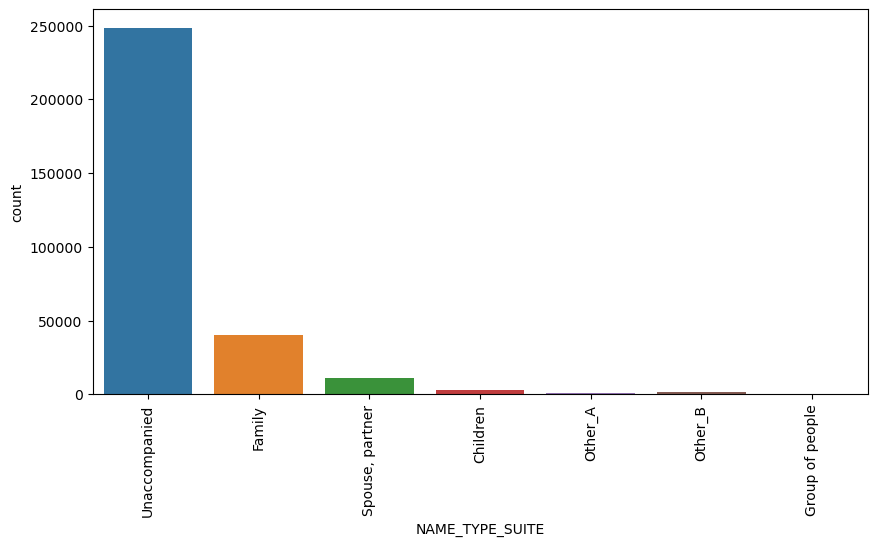

In [87]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити і вказати `Unaccompanied` у датафреймі, але я б віддала перевагу другому варіанту.
- Ми також могли заповнити дані зі значенням "NA", оскільки цей стовпець є категоріальним.
- Так само, якщо в стовпці відсутні менше 1% даних, ми можемо видалити відсутні значення. Але якщо ми видалимо всі дані в усіх стовпцях, які мають <=1% відсутніх даних, ми можемо видалити забагато даних. Тому я переважно зберігаю дані, наскільки можу.

In [88]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

### Analysis of `OBS_30_CNT_SOCIAL_CIRCLE` column

In [89]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [90]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

OBS_30_CNT_SOCIAL_CIRCLE
0.00    163910
1.00     48783
2.00     29808
3.00     20322
4.00     14143
5.00      9553
6.00      6453
7.00      4390
8.00      2967
9.00      2003
Name: count, dtype: int64

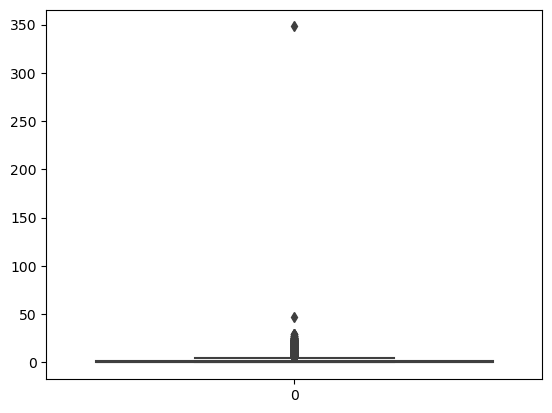

In [91]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Getting percentile values for `OBS_30_CNT_SOCIAL_CIRCLE`

In [92]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Most recurring value in `OBS_30_CNT_SOCIAL_CIRCLE`

In [93]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

Checking the average value of `OBS_30_CNT_SOCIAL_CIRCLE`

In [94]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4222454239942575

**Спостереження**
- Дивлячись на боксплот, медіана становить 0,0
- Найчастіше повторюване значення становить 0,0
- Середнє значення 1,4222
- Є два виброси: 50 і 350.
- Середнє значення та мода близькі (відносно рангу даних у цьому стовпці) і можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток відсутнього значення невеликий (0,33%)

In [95]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- DEF_30_CNT_SOCIAL_CIRCLE
- EXT_SOURCE_2
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.

In [96]:
#функція для аналізу колонок
def analyze_column(dataframe, column_name):
    # Print value counts
    print("Value Counts:")
    print(dataframe[column_name].value_counts())
    print()
    
    #Print null count and percentage of nulls
    print("Null count and percentage of nulls")
    print(null_df_under1[null_df_under1.column_name == column_name])
    print()

    # Print quantiles
    print("Quantiles:")
    print(dataframe[column_name].quantile(q=[0.25, 0.5, 0.75, 1]))
    print()
    
    # Print mean and median
    print("Mean:", dataframe[column_name].mean())
    print("Median:", dataframe[column_name].median())
    print("Mode:", dataframe[column_name].mode())
    print()
    
    # Create and show boxplot
    dataframe.boxplot(column=column_name)
    plt.title(column_name + " Boxplot")
    plt.show()

Value Counts:
DEF_30_CNT_SOCIAL_CIRCLE
0.00     271324
1.00      28328
2.00       5323
3.00       1192
4.00        253
5.00         56
6.00         11
7.00          1
34.00         1
8.00          1
Name: count, dtype: int64

Null count and percentage of nulls
                 column_name  null_count  null_percentage
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33

Quantiles:
0.25    0.00
0.50    0.00
0.75    0.00
1.00   34.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

Mean: 0.1434206662533851
Median: 0.0
Mode: 0   0.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64



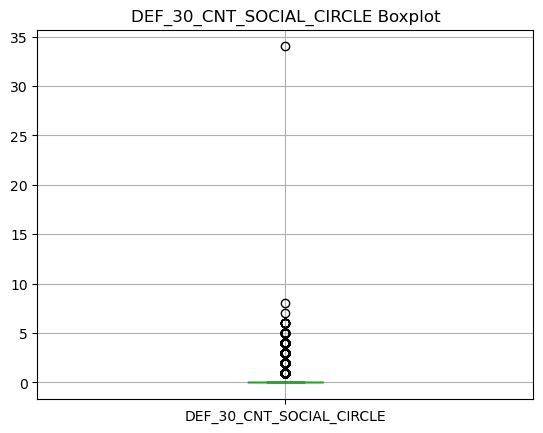

In [97]:
analyze_column(df,'DEF_30_CNT_SOCIAL_CIRCLE')

Value Counts:
EXT_SOURCE_2
0.29    721
0.26    417
0.27    343
0.16    322
0.27    306
       ... 
0.00      1
0.26      1
0.28      1
0.18      1
0.27      1
Name: count, Length: 119831, dtype: int64

Null count and percentage of nulls
     column_name  null_count  null_percentage
42  EXT_SOURCE_2         660             0.21

Quantiles:
0.25   0.39
0.50   0.57
0.75   0.66
1.00   0.85
Name: EXT_SOURCE_2, dtype: float64

Mean: 0.5143926741308462
Median: 0.5659614260608526
Mode: 0   0.29
Name: EXT_SOURCE_2, dtype: float64



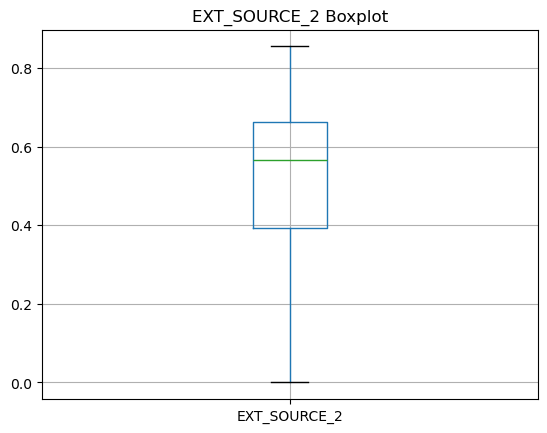

In [98]:
analyze_column(df,'EXT_SOURCE_2')

Value Counts:
OBS_60_CNT_SOCIAL_CIRCLE
0.00      164666
1.00       48870
2.00       29766
3.00       20215
4.00       13946
5.00        9463
6.00        6349
7.00        4344
8.00        2886
9.00        1959
10.00       1335
11.00        837
12.00        620
13.00        401
14.00        238
15.00        166
16.00        137
17.00         73
18.00         49
19.00         44
20.00         30
21.00         28
22.00         20
23.00         13
24.00         12
25.00         11
27.00          5
29.00          2
28.00          1
47.00          1
344.00         1
30.00          1
26.00          1
Name: count, dtype: int64

Null count and percentage of nulls
                 column_name  null_count  null_percentage
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33

Quantiles:
0.25     0.00
0.50     0.00
0.75     2.00
1.00   344.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

Mean: 1.4052921791901856
Median: 0.0
Mode: 0   0.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64



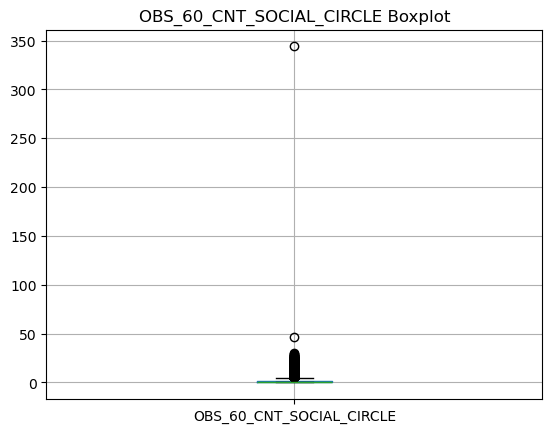

In [99]:
analyze_column(df,'OBS_60_CNT_SOCIAL_CIRCLE')

Value Counts:
DEF_60_CNT_SOCIAL_CIRCLE
0.00     280721
1.00      21841
2.00       3170
3.00        598
4.00        135
5.00         20
6.00          3
7.00          1
24.00         1
Name: count, dtype: int64

Null count and percentage of nulls
                 column_name  null_count  null_percentage
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33

Quantiles:
0.25    0.00
0.50    0.00
0.75    0.00
1.00   24.00
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

Mean: 0.10004894123788705
Median: 0.0
Mode: 0   0.00
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64



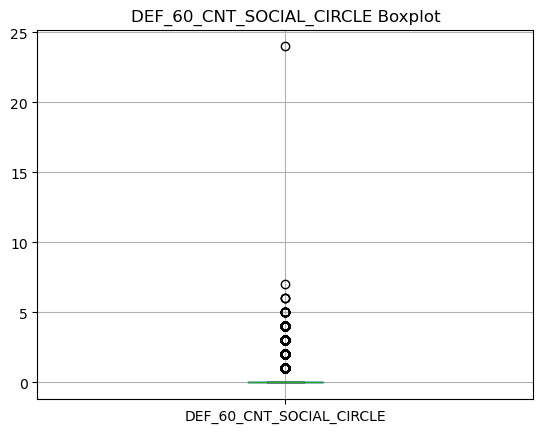

In [100]:
analyze_column(df,'DEF_60_CNT_SOCIAL_CIRCLE')

Value Counts:
AMT_GOODS_PRICE
450000.00     26022
225000.00     25282
675000.00     24962
900000.00     15416
270000.00     11428
              ...  
1265751.00        1
503266.50         1
810778.50         1
666090.00         1
743863.50         1
Name: count, Length: 1002, dtype: int64

Null count and percentage of nulls
        column_name  null_count  null_percentage
10  AMT_GOODS_PRICE         278             0.09

Quantiles:
0.25    238500.00
0.50    450000.00
0.75    679500.00
1.00   4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Mean: 538396.2074288895
Median: 450000.0
Mode: 0   450000.00
Name: AMT_GOODS_PRICE, dtype: float64



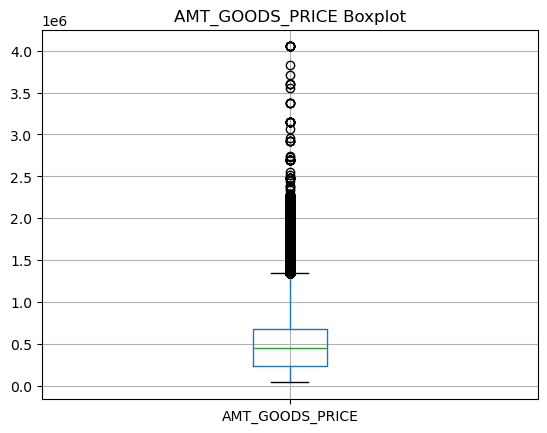

In [101]:
analyze_column(df,'AMT_GOODS_PRICE')

**Висновок**

`DEF_30_CNT_SOCIAL_CIRCLE` - мода та медіана становлять 0.0, середнє арифметичне становить 0.14. Є викиди від 4.0 до 34.0. Зогляду на те, що нулових значень трохи більше тисячі (0.33%), можемо замінити їх на 0.0 не спровокувавши перекосу даних. 

`EXT_SOURCE_2` - середнє арифметичне складає 0.514; медіана - 0.566; мода - 0.29. Бачимо, що викидів нема і сукупність даних зосереджено на проміжку ід 0.0 до 9.0.
Для заповнення нулових значень, які складають 0.21% я б використала моду, оскільки використання медіани призведе до того, що перерозподілу даних і зсуне моду з поточного значення на значення медіани.

`OBS_60_CNT_SOCIAL_CIRCLE` - середнє арифметичне - 1.41; мода та медіана - 0.0. Бачимо, що більше половина значень є 0.0. Присутні викиди від 5.00 до 26.00.  Оскільки мода і медіана в цьому стовпці співпадають, я б обрала це значення для заповнення null.

`DEF_60_CNT_SOCIAL_CIRCLE` - 75% значень цього стовпця дорівнюють 0.00. Мода та медіана - 0.00, середнє арифметичне дуже близьке до медіани і складає 0.10. Відповідно, для заповнення нулових значень я б обрала 0.00.

`AMT_GOODS_PRICE` - мода та медіана складають 450000. Є викиди, наприклад `1265751`, яке зміщують середнє арифметичне, яке складає 538396. Для заповнення нулових значень, кількість яких складає 278, я б використала значення медіани. Це дозволить не змінювати загальну тенденцію даних у цьому стовпчику.

In [326]:
#Замінимо описані вище значення для використання в подальшому аналізі
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mode(), inplace=True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].mode(), inplace=True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].mode(), inplace=True)
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)

# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [102]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [103]:
df[df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
35657      141289       0    Revolving loans         XNA             1   
38566      144669       0    Revolving loans         XNA             0   
83382      196708       0    Revolving loans         XNA             0   
189640     319880       0    Revolving loans         XNA             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                 1             0         207000.00   382500.00   
38566                 1             2         157500.00   270000.00   
83382                 1             1         135000.00   405000.00   
189640                1             0         247500.00   540000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657      19125.00        337500.00   Unaccompanied               Working   
38566      13500.00        225000.00          Family               Working   
83382      20250.00        225000.00   Unaccompanied               Working   
189640     27000.00        900000.00   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                         0.02      -20232         -10044   
38566                         0.03      -13717          -2797   
83382                         0.04      -10647          -1228   
189640                        0.04       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657           -10024.00            -3537           1               1   
38566            -2241.00            -4659           1               1   
83382             -183.00            -1671           1               1   
189640           -4099.00            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown             2.00                     3   
38566   Low-skill Laborers             4.00                     2   
83382           Core staff             3.00                     2   
189640             Unknown             2.00                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       

Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [104]:
df['CODE_GENDER_CHANGED'] = df['CODE_GENDER'].apply(lambda x: 1 if x == 'XNA' else 0)

In [105]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA

In [106]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### Аналіз стовпця `DAYS_BIRTH`

In [107]:
df['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: count, dtype: int64

Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [108]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [109]:
df['DAYS_BIRTH'].nunique()

17460

In [110]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Перетворення `Days Birth` на додатні дні

In [111]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [112]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean     16037.00
std       4363.99
min       7489.00
25%      12413.00
50%      15750.00
75%      19682.00
max      25229.00
Name: DAYS_BIRTH, dtype: float64

Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [113]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

In [114]:
df['YEARS_BIRTH'].describe()

count   307511.00
mean        43.94
std         11.96
min         21.00
25%         34.00
50%         43.00
75%         54.00
max         69.00
Name: YEARS_BIRTH, dtype: float64

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [115]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [116]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
41982      148605       0    Revolving loans           M             0   
187348     317181       0    Revolving loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                 1             0         450000.00   675000.00   
187348                1             0         202500.00   585000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982      33750.00              NaN              NA  Commercial associate   
187348     29250.00              NaN              NA  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                         0.02       12396          -1161   
187348                        0.03       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982            -3265.00            -4489           1               1   
187348           -1597.00            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance          0.70   
187348                        0  Business Entity Type 2          0.65   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                      3.00                      0.00   
187348          0.67                      1.00                      0.00   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                       3.00                      0.00   
187348                      1.00                      0.00   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                  -876.00                0                0   
187348                 -654.00                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15 

In [117]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

NAME_FAMILY_STATUS
Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Unknown                 0.00
Name: proportion, dtype: float64

Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імплікації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [118]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [119]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

### Аналіз стовпця`DAYS_EMPLOYED`

In [120]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [121]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

DAYS_EMPLOYED
 365243   18.01
-200       0.05
-224       0.05
-230       0.05
-199       0.05
           ... 
-13961     0.00
-11827     0.00
-10176     0.00
-9459      0.00
-8694      0.00
Name: proportion, Length: 12574, dtype: float64

In [122]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [123]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
-200      156
-224      152
-199      151
-230      151
-212      150
         ... 
-13961      1
-11827      1
-10176      1
-9459       1
-8694       1
Name: count, Length: 12573, dtype: int64

In [124]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [125]:
df['DAYS_EMPLOYED'].nunique()

12574

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [126]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [127]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64

Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення.

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або "пенсіонерами", або "безробітними", і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [128]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

In [129]:
days_median = df[df['DAYS_EMPLOYED'] != 365243].DAYS_EMPLOYED.median()
print(days_median)

1648.0


In [130]:
df_days_employed = df['DAYS_EMPLOYED'].apply(lambda x: days_median if x==365243 else x)

<Axes: >

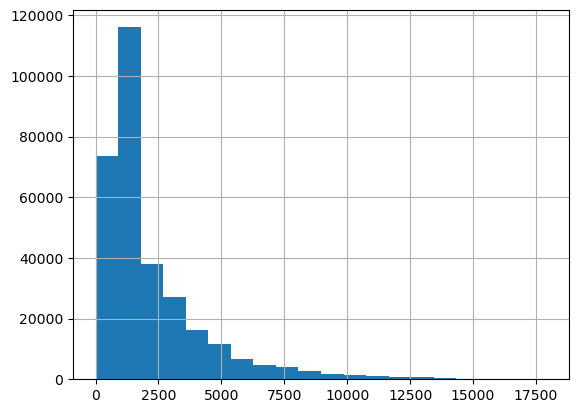

In [131]:
df_days_employed.hist(bins=20)

<Axes: >

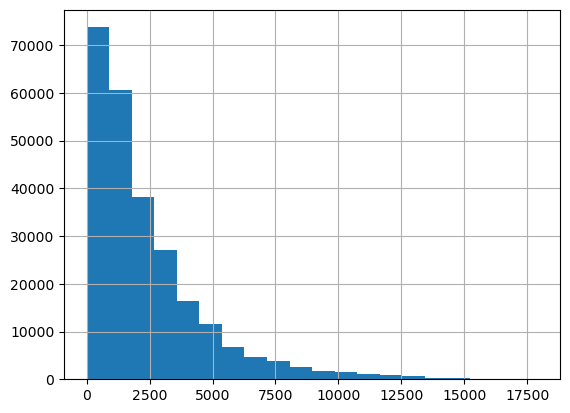

In [132]:
df[df['DAYS_EMPLOYED'] != 365243].DAYS_EMPLOYED.hist(bins=20)

In [133]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [134]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [135]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.00    113
-7.00     98
-6.00     96
-4.00     92
-2.00     92
Name: count, dtype: int64

In [136]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

DAYS_REGISTRATION
-1.00   0.00
-7.00   0.00
-6.00   0.00
-4.00   0.00
-2.00   0.00
Name: proportion, dtype: float64

In [137]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [138]:
df['DAYS_REGISTRATION'].nunique()

15688

Перетворення `DAYS_REGISTRATION` в додатні дні

In [139]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [140]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
1.00    113
7.00     98
6.00     96
4.00     92
2.00     92
Name: count, dtype: int64

Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [141]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [142]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [143]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

DAYS_ID_PUBLISH
-4053   0.00
-4095   0.00
-4046   0.00
-4417   0.00
-4256   0.00
Name: proportion, dtype: float64

In [144]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211])

In [145]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [146]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [147]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
4053    169
4095    162
4046    161
4417    159
4256    158
Name: count, dtype: int64

Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [148]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [149]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00     37672
-1.00     2812
-2.00     2318
-3.00     1763
-4.00     1285
Name: count, dtype: int64

In [150]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

DAYS_LAST_PHONE_CHANGE
0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: proportion, dtype: float64

In [151]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [152]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [153]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [154]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00    37672
1.00     2812
2.00     2318
3.00     1763
4.00     1285
Name: count, dtype: int64

Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [155]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Функції для автоматизації

### Створення функції `age_cat` для категоризації даних, що містять інформацію про роки

In [156]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [157]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET')


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [285]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

### Робота з викидами для числових стовпців

In [159]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця`CNT_CHILDREN`

In [160]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False)

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [161]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_CHILDREN
0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: proportion, dtype: float64

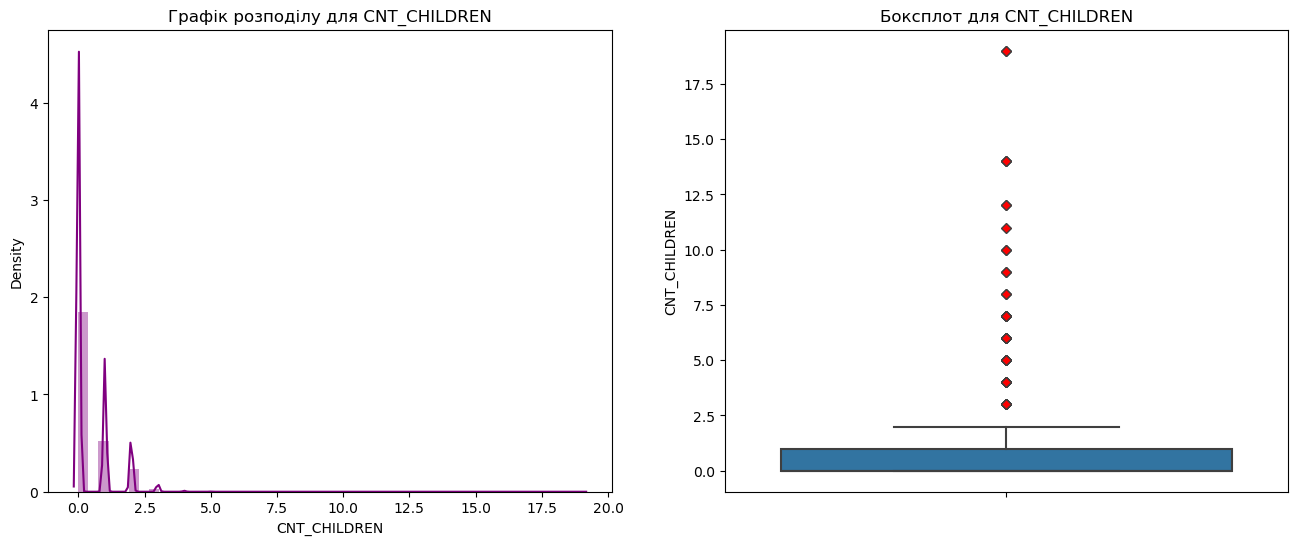

In [162]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [163]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [164]:
Q1, Q3

(0.0, 1.0)

Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [165]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


In [166]:
df[df['CNT_CHILDREN'].isin(range(10,20))].YEARS_BIRTH

34545     47
80948     39
132585    31
155369    30
171125    38
176011    49
183878    56
186820    41
265784    28
267998    42
Name: YEARS_BIRTH, dtype: int64

In [167]:
df[df['CNT_CHILDREN'].isin([10])][['SK_ID_CURR', 'CNT_CHILDREN', 'YEARS_BIRTH']]

SK_ID_CURR  CNT_CHILDREN  YEARS_BIRTH
132585     253779            10           31
186820     316580            10           41

**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [168]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

AMT_INCOME_TOTAL
135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: count, dtype: int64

In [169]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_INCOME_TOTAL
135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: proportion, dtype: float64

In [170]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Побудуємо графік для `AMT_INCOME_TOTAL`

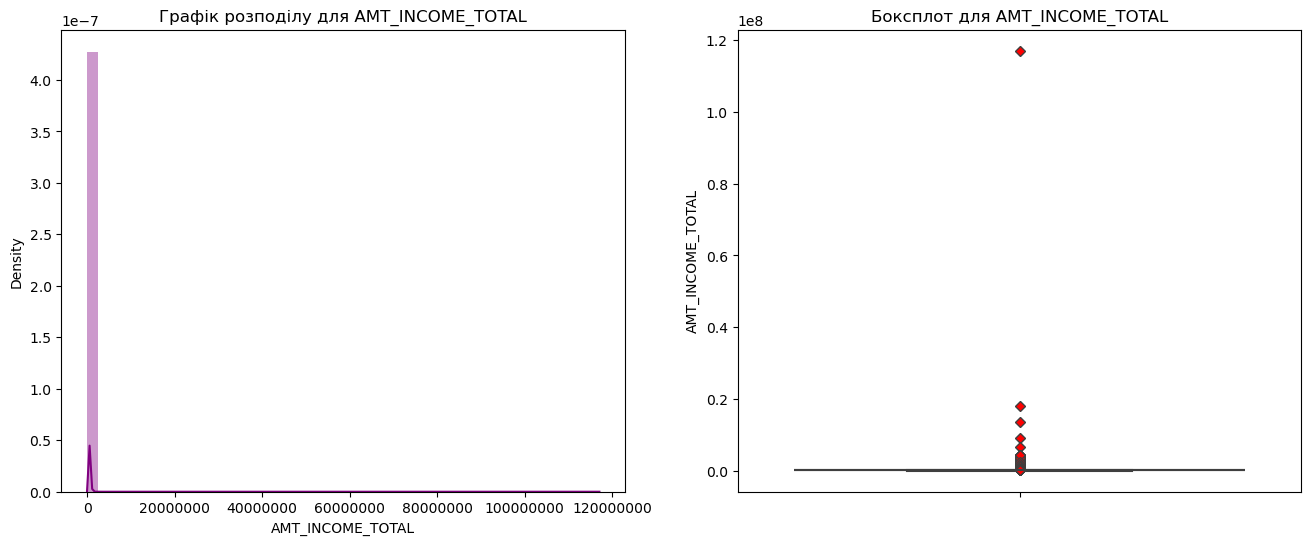

In [171]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

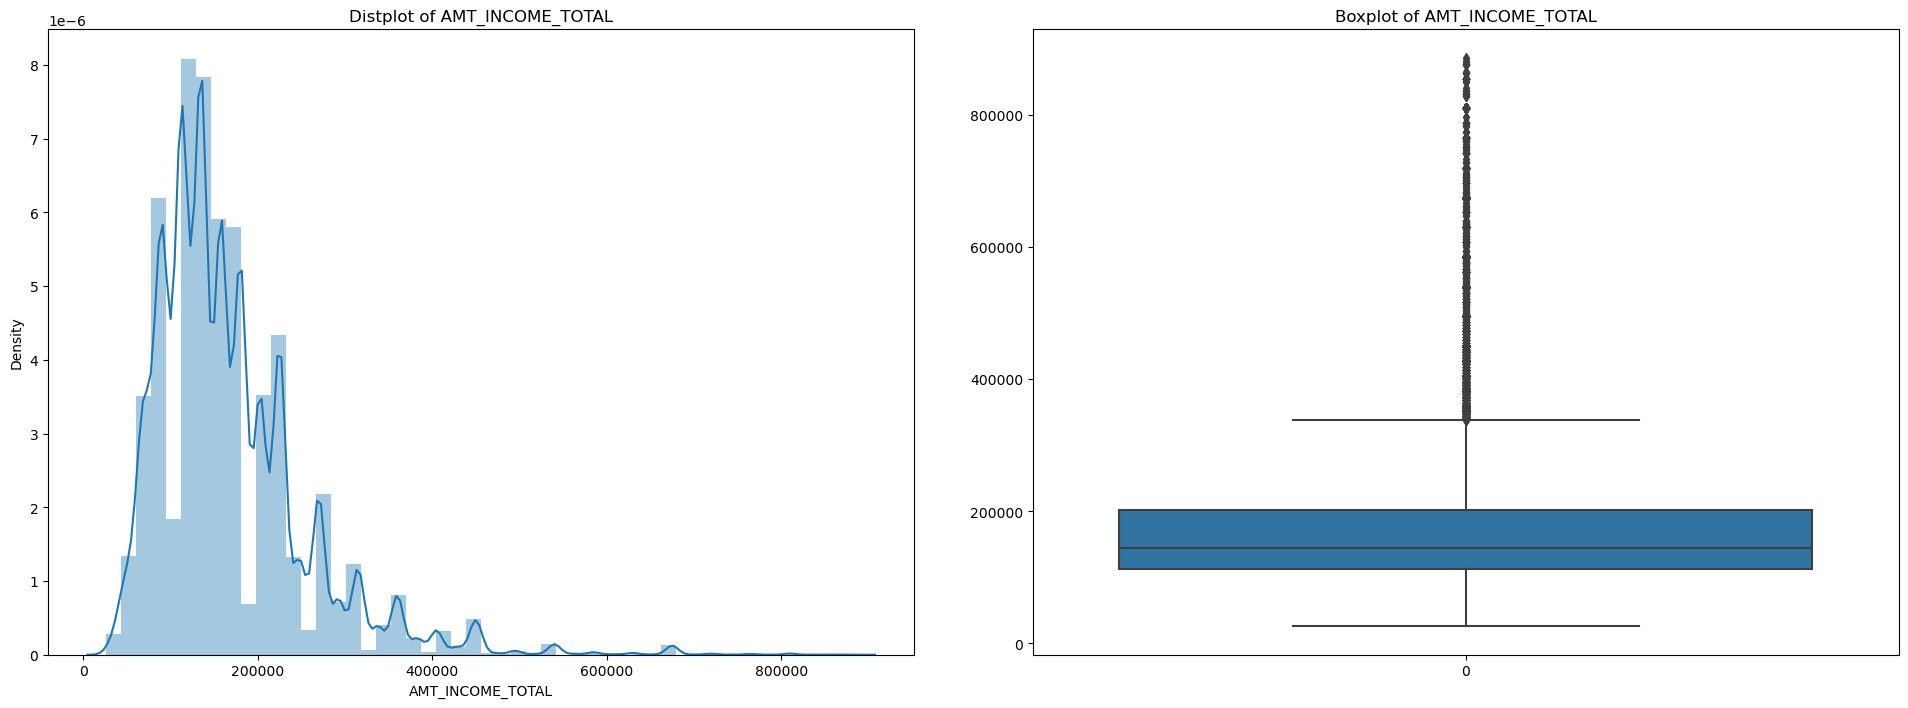

In [172]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [173]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1504     101769       0    Revolving loans           M             1   
1723     102015       0         Cash loans           F             0   
3371     103938       0         Cash loans           F             0   
4603     105384       0    Revolving loans           F             1   
5673     106637       0         Cash loans           M             1   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1504                1             0        1080000.00   180000.00   
1723                1             0        1935000.00   269550.00   
3371                0             1        1350000.00  2410380.00   
4603                1             0        1350000.00   405000.00   
5673                1             3         967500.00   450000.00   

      AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504      9000.00        180000.00   Unaccompanied  Commercial associate   
1723     10534.50        225000.00   Unaccompanied             Pensioner   
3371    109053.00       2250000.00              NA  Commercial associate   
4603     20250.00        405000.00   Unaccompanied  Commercial associate   
5673     30073.50        450000.00   Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504               Higher education            Married  House / apartment   
1723  Secondary / secondary special            Married  House / apartment   
3371               Higher education            Married  House / apartment   
4603               Higher education            Married  House / apartment   
5673               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1504                        0.07       13633           5536   
1723                        0.01       18636         365243   
3371                        0.07       12213            843   
4603                        0.02       14781           4768   
5673                        0.05       11901            546   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1504               3.00             4971           1               1   
1723            3401.00             2168           1               0   
3371             757.00             4132           1               1   
4603            3469.00             4045           1               1   
5673            2932.00              215           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1504                0                 1           0           0   
1723                0                 1           1           0   
3371                0                 1           1           0   
4603                0                 1           0           0   
5673                0                 1           0           0   

     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1504         Unknown             2.00                     1   
1723         Unknown             2.00                     2   
3371        Managers             3.00                     1   
4603        Managers             2.00                     2   
5673        Managers             5.00                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1504                            1                     FRIDAY   
1723                            2                     MONDAY   
3371                            1                     SUNDAY   
4603                            2                    TUESDAY   
5673                            1                     MONDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1504                       13                           0   
1723                       11                           0   
3371                       13                           0   
4603          

**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

Value Counts:
CNT_FAM_MEMBERS
2.00     158357
1.00      67847
3.00      52601
4.00      24697
5.00       3478
6.00        408
7.00         81
8.00         20
9.00          6
10.00         3
14.00         2
12.00         2
20.00         2
16.00         2
13.00         1
15.00         1
11.00         1
Name: count, dtype: int64

Null count and percentage of nulls
Empty DataFrame
Columns: [column_name, null_count, null_percentage]
Index: []

Quantiles:
0.25    2.00
0.50    2.00
0.75    3.00
1.00   20.00
Name: CNT_FAM_MEMBERS, dtype: float64

Mean: 2.152665450442101
Median: 2.0
Mode: 0   2.00
Name: CNT_FAM_MEMBERS, dtype: float64



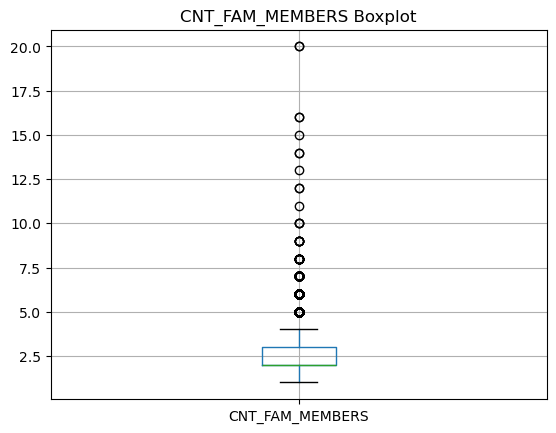

In [174]:
analyze_column(df,'CNT_FAM_MEMBERS')

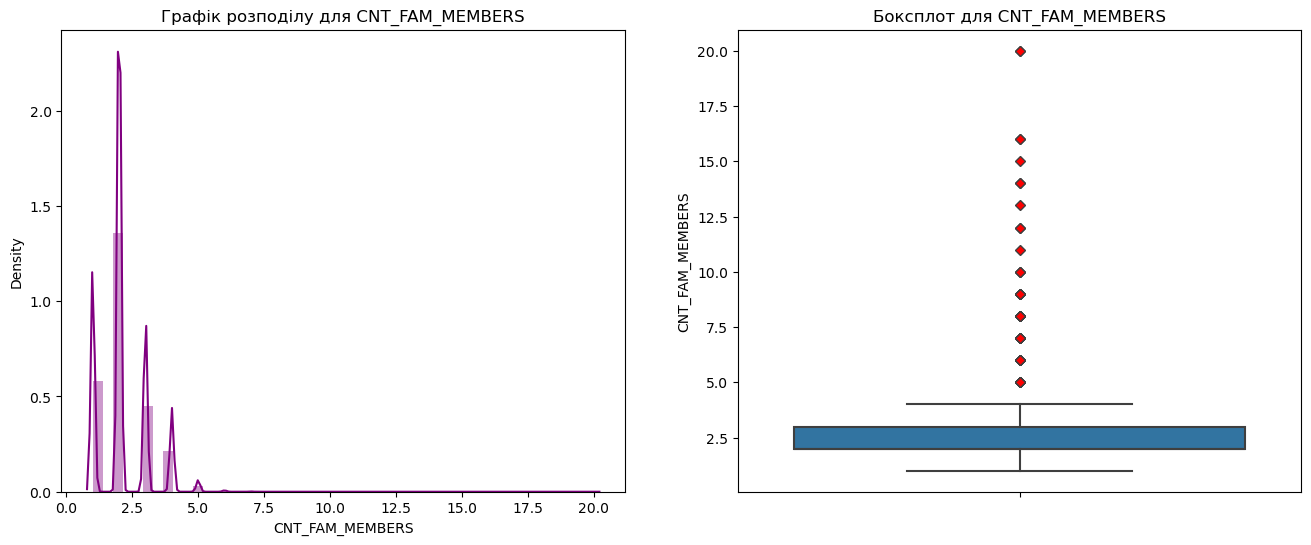

In [175]:
dist_box(df, 'CNT_FAM_MEMBERS')

In [176]:
# розрахуємо IQR
Q1 = df['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = df['CNT_FAM_MEMBERS'].quantile(0.75)
IQR = Q3 - Q1
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: 0.5
Максимальне значення, після якого існують викиди: 4.5


`CNT_FAM_MEMBERS` - показує кількість членів сім'ї заявника. Розподіл по квантилям і графіки показують, що в основної маси заявників кількість людей в сім'ї від одного до чотирьох. Викиди починаються з 5 людей і більше до 20. 

Value Counts:
AMT_ANNUITY
9000.00      6385
13500.00     5514
6750.00      2279
10125.00     2035
37800.00     1602
             ... 
79902.00        1
106969.50       1
60885.00        1
59661.00        1
77809.50        1
Name: count, Length: 13672, dtype: int64

Null count and percentage of nulls
Empty DataFrame
Columns: [column_name, null_count, null_percentage]
Index: []

Quantiles:
0.25    16524.00
0.50    24903.00
0.75    34596.00
1.00   258025.50
Name: AMT_ANNUITY, dtype: float64

Mean: 27108.573909183444
Median: 24903.0
Mode: 0   9000.00
Name: AMT_ANNUITY, dtype: float64



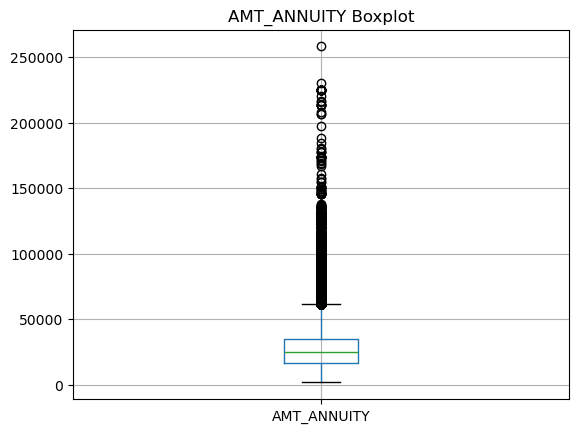

In [177]:
analyze_column(df,'AMT_ANNUITY')

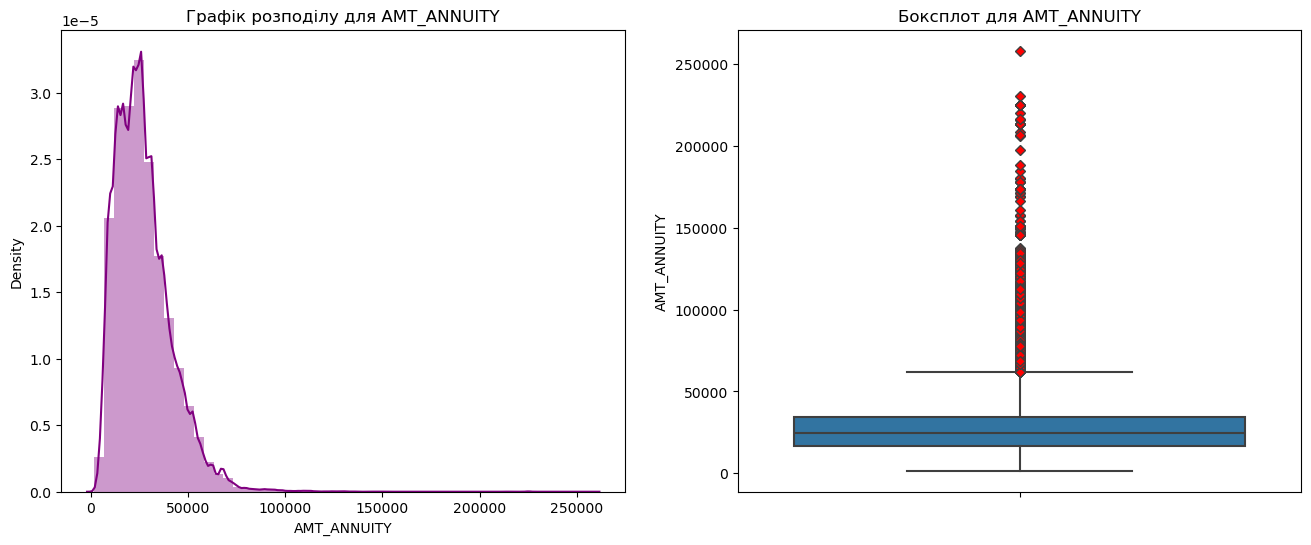

In [178]:
dist_box(df, 'AMT_ANNUITY')

In [179]:
# перевіримо які дані містить ця колонка
print(description.loc[description['Row'] == 'AMT_ANNUITY', 'Description'].iloc[0])


Loan annuity


`AMT_ANNUITY` - колонка містить ануїтетний платіж по кредиту. 75% виплат сягають суми 35000.00. Відповідно до отриманих графіків бачимо, що викиди починаються орієнтовно зі значення в 60000.00, але перевіримо розрахунком IQR:

In [180]:
# розрахуємо IQR
Q1 = df['AMT_ANNUITY'].quantile(0.25)
Q3 = df['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -10584.0
Максимальне значення, після якого існують викиди: 61704.0


Оскільки платіж по кредиту не може бути від'ємним, то нижня межа починається фактично з 0.00, а верхня межа, відповідно до розрахунку, майже 620000.00. Тобто усі платежі, суми яких вищі за це значення є викидами. Якщо побудуємо графіки в межах від 0.00 до 62000.00, вони будуть мати наступний вигляд, що вже більше схоже на нормальний розподіл.

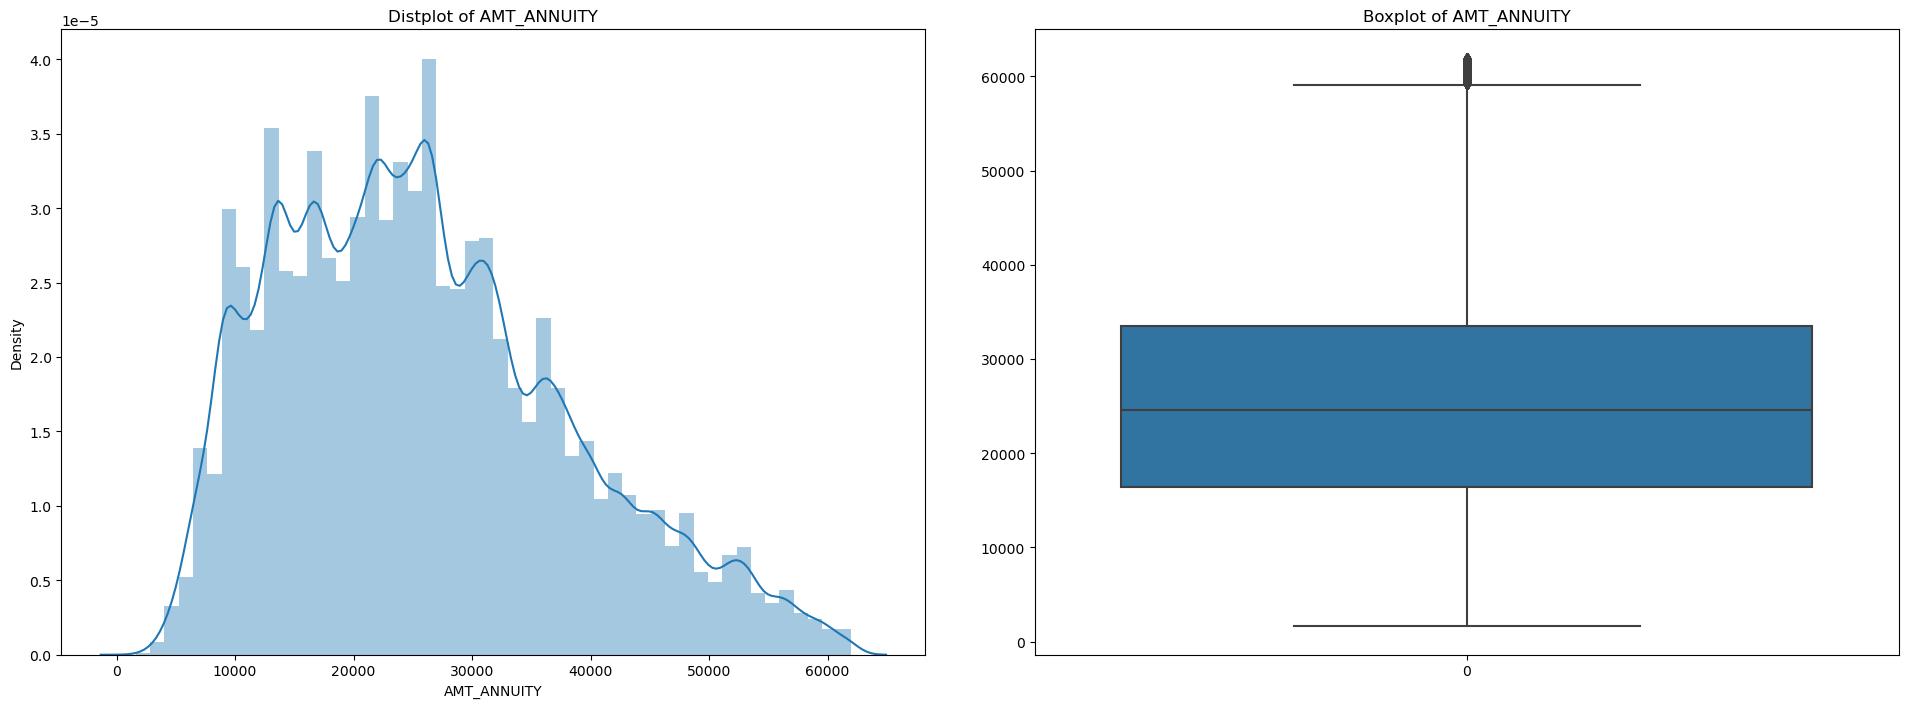

In [181]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_ANNUITY'] < 62000].AMT_ANNUITY)
    pltname = 'Distplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_ANNUITY'] < 62000].AMT_ANNUITY)
    pltname = 'Boxplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [182]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

AMT_GOODS_PRICE
450000.00    26022
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64

In [183]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_GOODS_PRICE
450000.00   8.47
225000.00   8.23
675000.00   8.12
900000.00   5.02
270000.00   3.72
Name: proportion, dtype: float64

Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [184]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
99.99%   2934964.80
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [185]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [186]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

AMT_GOODS_PRICE_CATEGORY
very low     246973
low           56087
medium         4108
high             47
very high        18
Name: count, dtype: int64

### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [187]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

YEARS_BIRTH
39    9023
38    8793
37    8727
40    8602
41    8495
Name: count, dtype: int64

In [188]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_BIRTH
39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: proportion, dtype: float64

Подивимось статистичний звіт для  `YEARS_BIRTH`

In [189]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         43.94
std          11.96
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [190]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [191]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_BIRTH_CATEGORY
30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: count, dtype: int64

### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [192]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

YEARS_REGISTRATION
1     15661
2     15564
3     13894
13    12866
12    12697
Name: count, dtype: int64

In [193]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_REGISTRATION
1    5.09
2    5.06
3    4.52
13   4.18
12   4.13
Name: proportion, dtype: float64

Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [194]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         13.66
std           9.66
min           0.00
25%           6.00
50%          12.00
75%          20.00
99%          38.00
99.99%       54.25
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [195]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [196]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_REGISTRATION_CATEGORY
0-20     230697
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: count, dtype: int64

# Зберігання оновлених даних зі стисненням

In [198]:
!ls


UPD_Credit_EDA.ipynb


In [199]:
filename = "/Users/marynadeorditsa/ML_Learning/Homework/application_data_processed"
compression_options = dict(method='zip', archive_name=f'{filename}.csv')
df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

In [201]:
# якщо Вам треба буде зчитати оновлені дані - замініть шлях на свій і можна зчитати їх тут
# df = pd.read_csv('drive/MyDrive/Machine Learning для людей/data/credit/application_data_processed.zip')

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [202]:
df['TARGET'].value_counts().sort_values(ascending = False)

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [203]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64

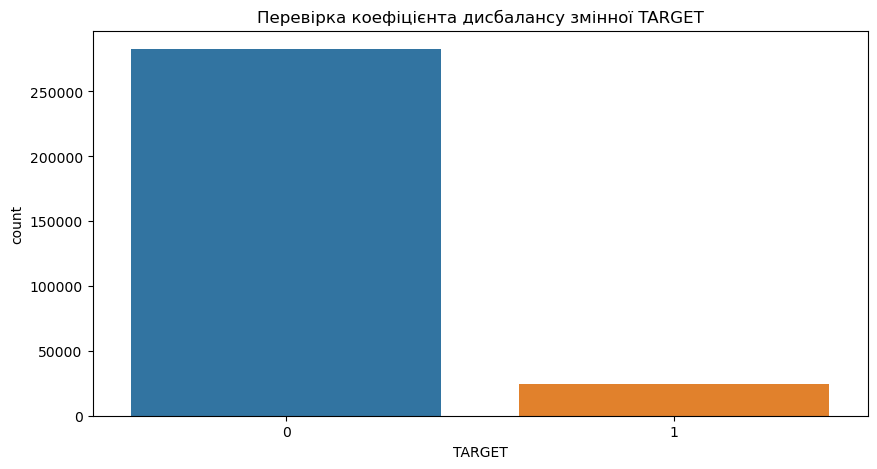

In [204]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [275]:
df1 = df[df['TARGET'] == 1]

In [206]:
df1.TARGET.value_counts()

TARGET
1    24825
Name: count, dtype: int64

### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [273]:
df0 = df[df['TARGET'] == 0]

In [208]:
df0.TARGET.value_counts()

TARGET
0    282686
Name: count, dtype: int64

# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

In [209]:
df[df.TARGET==0].NAME_CONTRACT_TYPE.value_counts(normalize=True)*10

NAME_CONTRACT_TYPE
Cash loans        9.02
Revolving loans   0.98
Name: proportion, dtype: float64

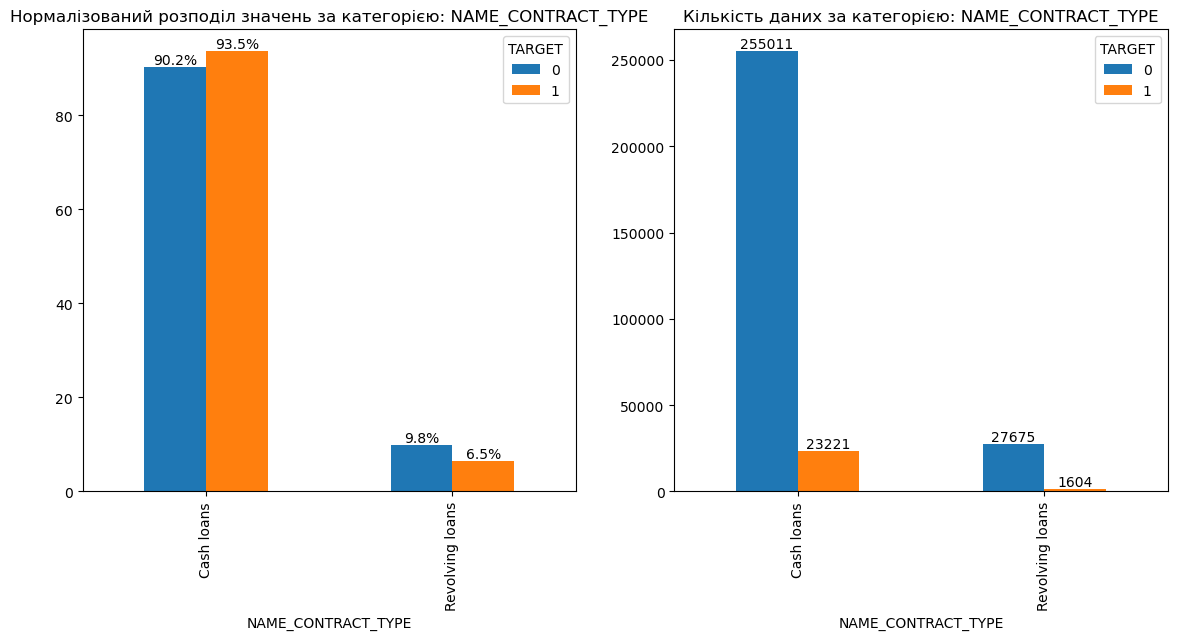

In [210]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

Проведіть подібний аналіз для колонок
- CODE_GENDER
- FLAG_OWN_CAR
- NAME_INCOME_TYPE

Опціонально
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

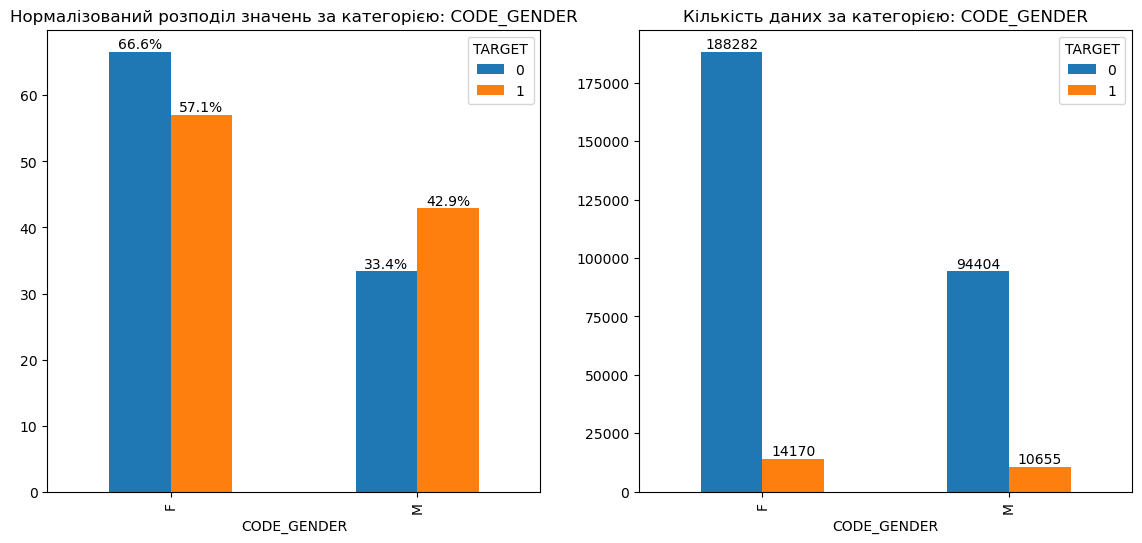

In [211]:
uni_cat_target_compare(df, 'CODE_GENDER')

**Висновок**

Судячи з гістограм, де різниця між відсотковим значенням в межах категорії статі близько 10%, бачимо наявну залежність між статтю клієнта та вчасністю погашення кредиту. 

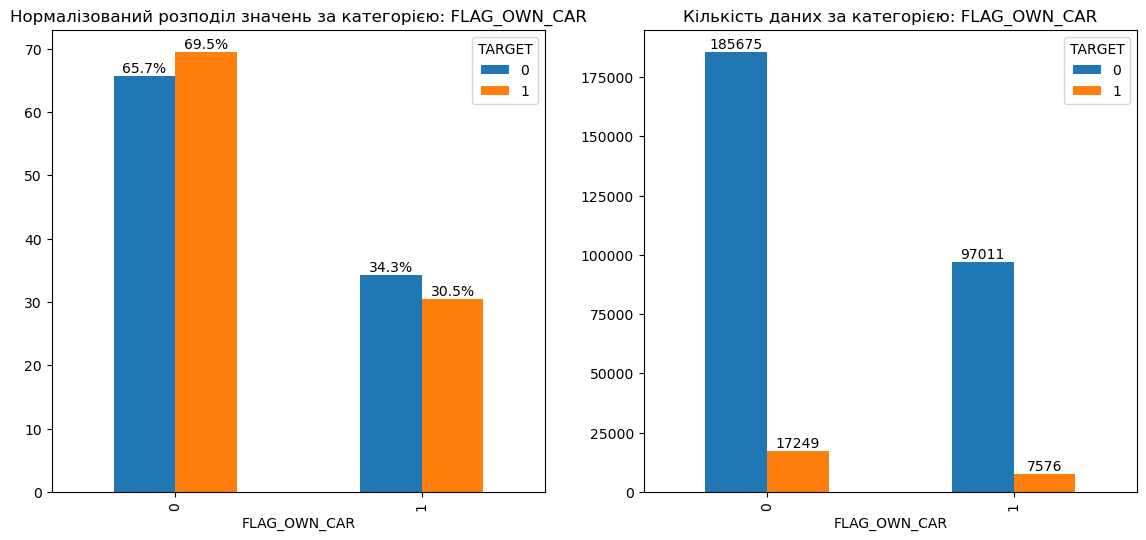

In [212]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

**Висновок**
Судячи з графіку по колонці `FLAG_OWN_CAR`, бачимо, що не має залежності в наявності у власності автомобіля та клієнтами, які мають труднощі з оплатою АБО вчасно сплачують

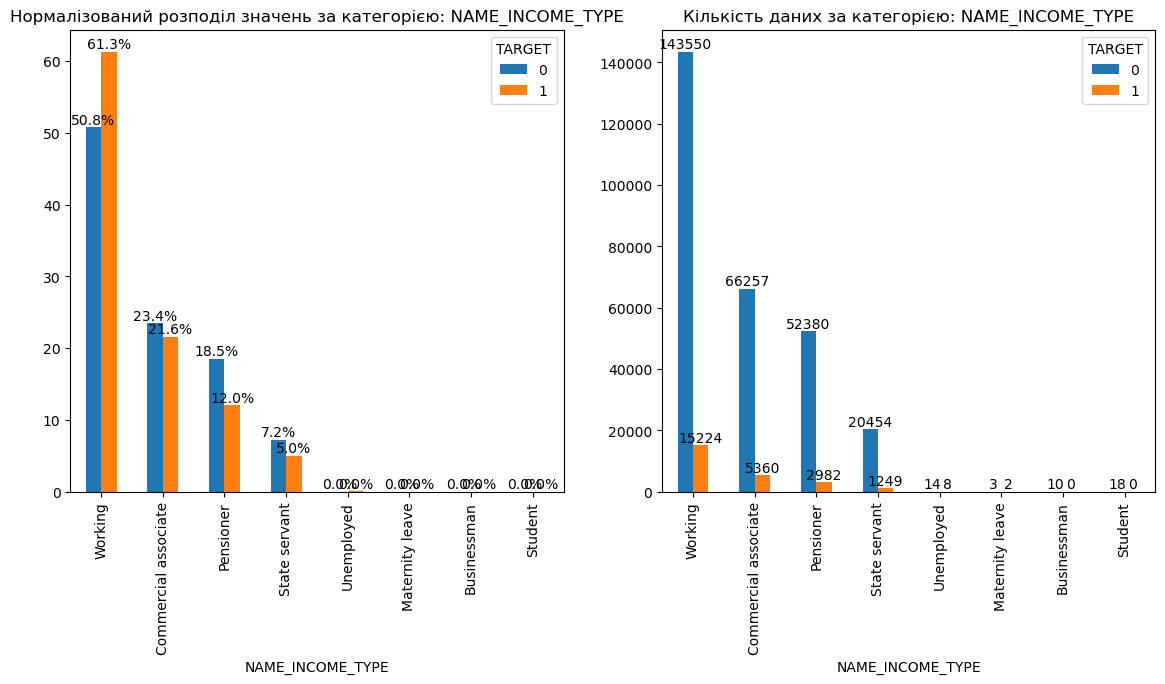

In [213]:
uni_cat_target_compare(df, 'NAME_INCOME_TYPE')

**Висновок**

Судячи з гістограм бачимо наявну залежність між матеріальним статусом клієнта та вчасністю погашення кредиту. Особливо помітна різниця в категорії "Працюючі", яка склала більше 10%.

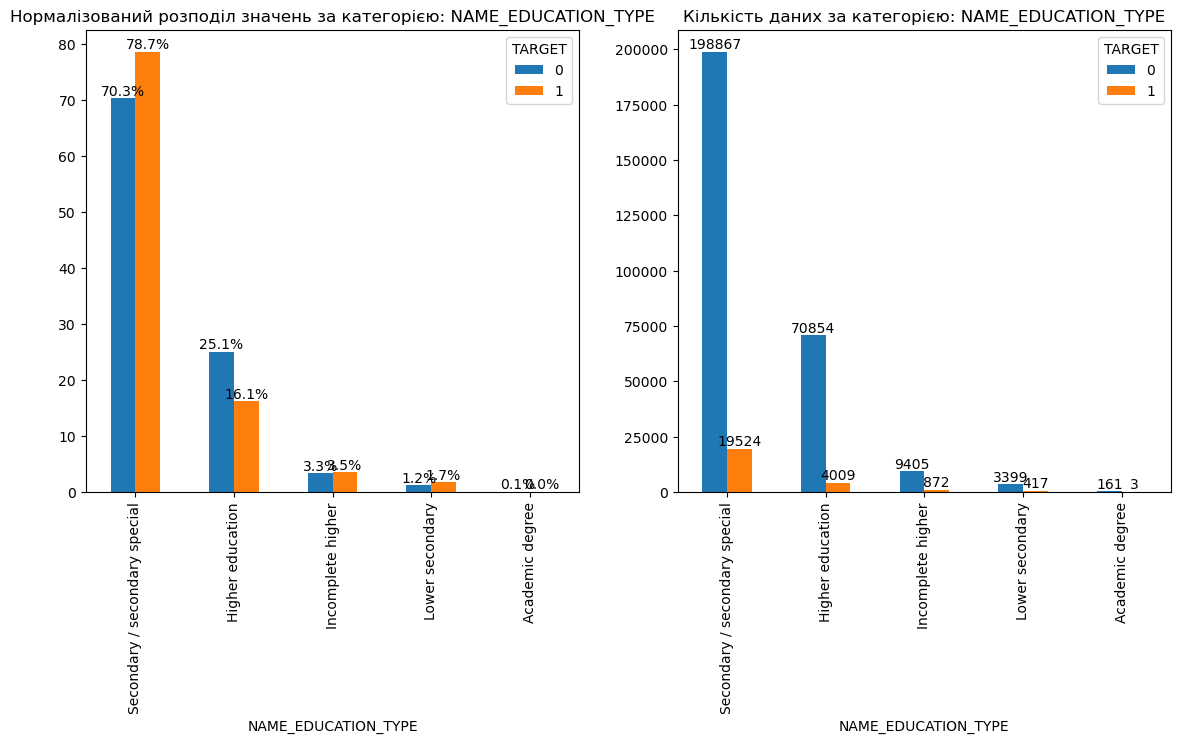

In [214]:
uni_cat_target_compare(df, 'NAME_EDUCATION_TYPE')

**Висновок**

Судячи з гістограм бачимо наявну залежність між освітою клієнта та вчасністю погашення кредиту. Особливо це стосується категорії клієнтів з вищою освітою, де різниця склала 11%.

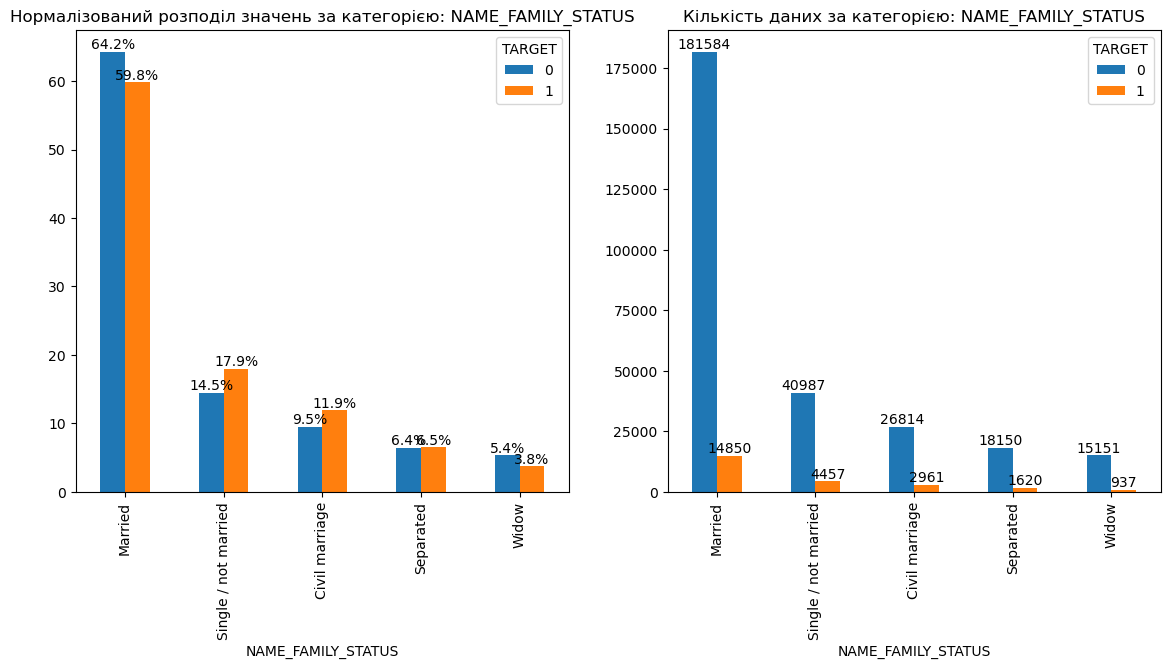

In [215]:
uni_cat_target_compare(df, 'NAME_FAMILY_STATUS')

**Висновок**
Судячи з графіку по колонці, бачимо, що не має залежності від сімейного статусу клієнтівта вчасністю оплати кредиту, оскільки максимальна різниця в категорії склала близько 4%.

# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [216]:
df1.select_dtypes(include='number').shape

(24825, 68)

Є 67 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [217]:
corr_df1 = df1.select_dtypes(include='number').corr()

In [218]:
corr_df1.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
TARGET               NaN           NaN              NaN           NaN   
FLAG_OWN_CAR         NaN          1.00             0.02          0.07   
FLAG_OWN_REALTY      NaN          0.02             1.00          0.02   
CNT_CHILDREN         NaN          0.07             0.02          1.00   
AMT_INCOME_TOTAL     NaN          0.02             0.01          0.00   

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                         NaN         NaN          NaN              NaN   
FLAG_OWN_CAR                  0.02        0.10         0.14             0.10   
FLAG_OWN_REALTY               0.01       -0.01         0.00            -0.02   
CNT_CHILDREN                  0.00       -0.00         0.03            -0.01   
AMT_INCOME_TOTAL              1.00        0.04         0.05             0.04   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
TARGET                                   NaN         NaN            NaN   
FLAG_OWN_CAR                            0.03       -0.07          -0.11   
FLAG_OWN_REALTY                         0.03        0.11           0.06   
CNT_CHILDREN                           -0.03       -0.26          -0.19   
AMT_INCOME_TOTAL                        0.01       -0.00          -0.01   

                  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
TARGET                          NaN              NaN         NaN   
FLAG_OWN_CAR                  -0.07             0.02         NaN   
FLAG_OWN_REALTY                0.01            -0.02         NaN   
CNT_CHILDREN                  -0.15             0.03         NaN   
AMT_INCOME_TOTAL              -0.00             0.00         NaN   

                  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
TARGET                       NaN              NaN               NaN   
FLAG_OWN_CAR                0.11            -0.02              0.00   
FLAG_OWN_REALTY            -0.06            -0.14             -0.01   
CNT_CHILDREN                0.19             0.05              0.00   
AMT_INCOME_TOTAL            0.01            -0.01             -0.00   

                  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
TARGET                   NaN         NaN              NaN   
FLAG_OWN_CAR           -0.00        0.03             0.11   
FLAG_OWN_REALTY        -0.05        0.03             0.03   
CNT_CHILDREN           -0.02        0.01             0.89   
AMT_INCOME_TOTAL       -0.00        0.01             0.01   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
TARGET                             NaN                          NaN   
FLAG_OWN_CAR                     -0.01                        -0.01   
FLAG_OWN_REALTY                  -0.01                        -0.01   
CNT_CHILDREN                      0.04                         0.04   
AMT_INCOME_TOTAL                 -0.02                        -0.02   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
TARGET                                NaN                         NaN   
FLAG_OWN_CAR                         0.01                       -0.00   
FLAG_OWN_REALTY                     -0.12                       -0.05   
CNT_CHILDREN                        -0.02                       -0.02   
AMT_INCOME_TOTAL                     0.01                        0.01   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                          NaN   
FLAG_OWN_CAR                            0.02                         0.02   
FLAG_OWN_REALTY                        -0.04                        -0.02   
CNT_CHILDREN                           -0.02                        -0.01   
AMT_INCOME_TOTAL                        0.01                         0.01   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
TARGET                               NaN       

In [219]:
df1.TARGET.value_counts()

TARGET
1    24825
Name: count, dtype: int64

Перегляд повної кореляційної матриці

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


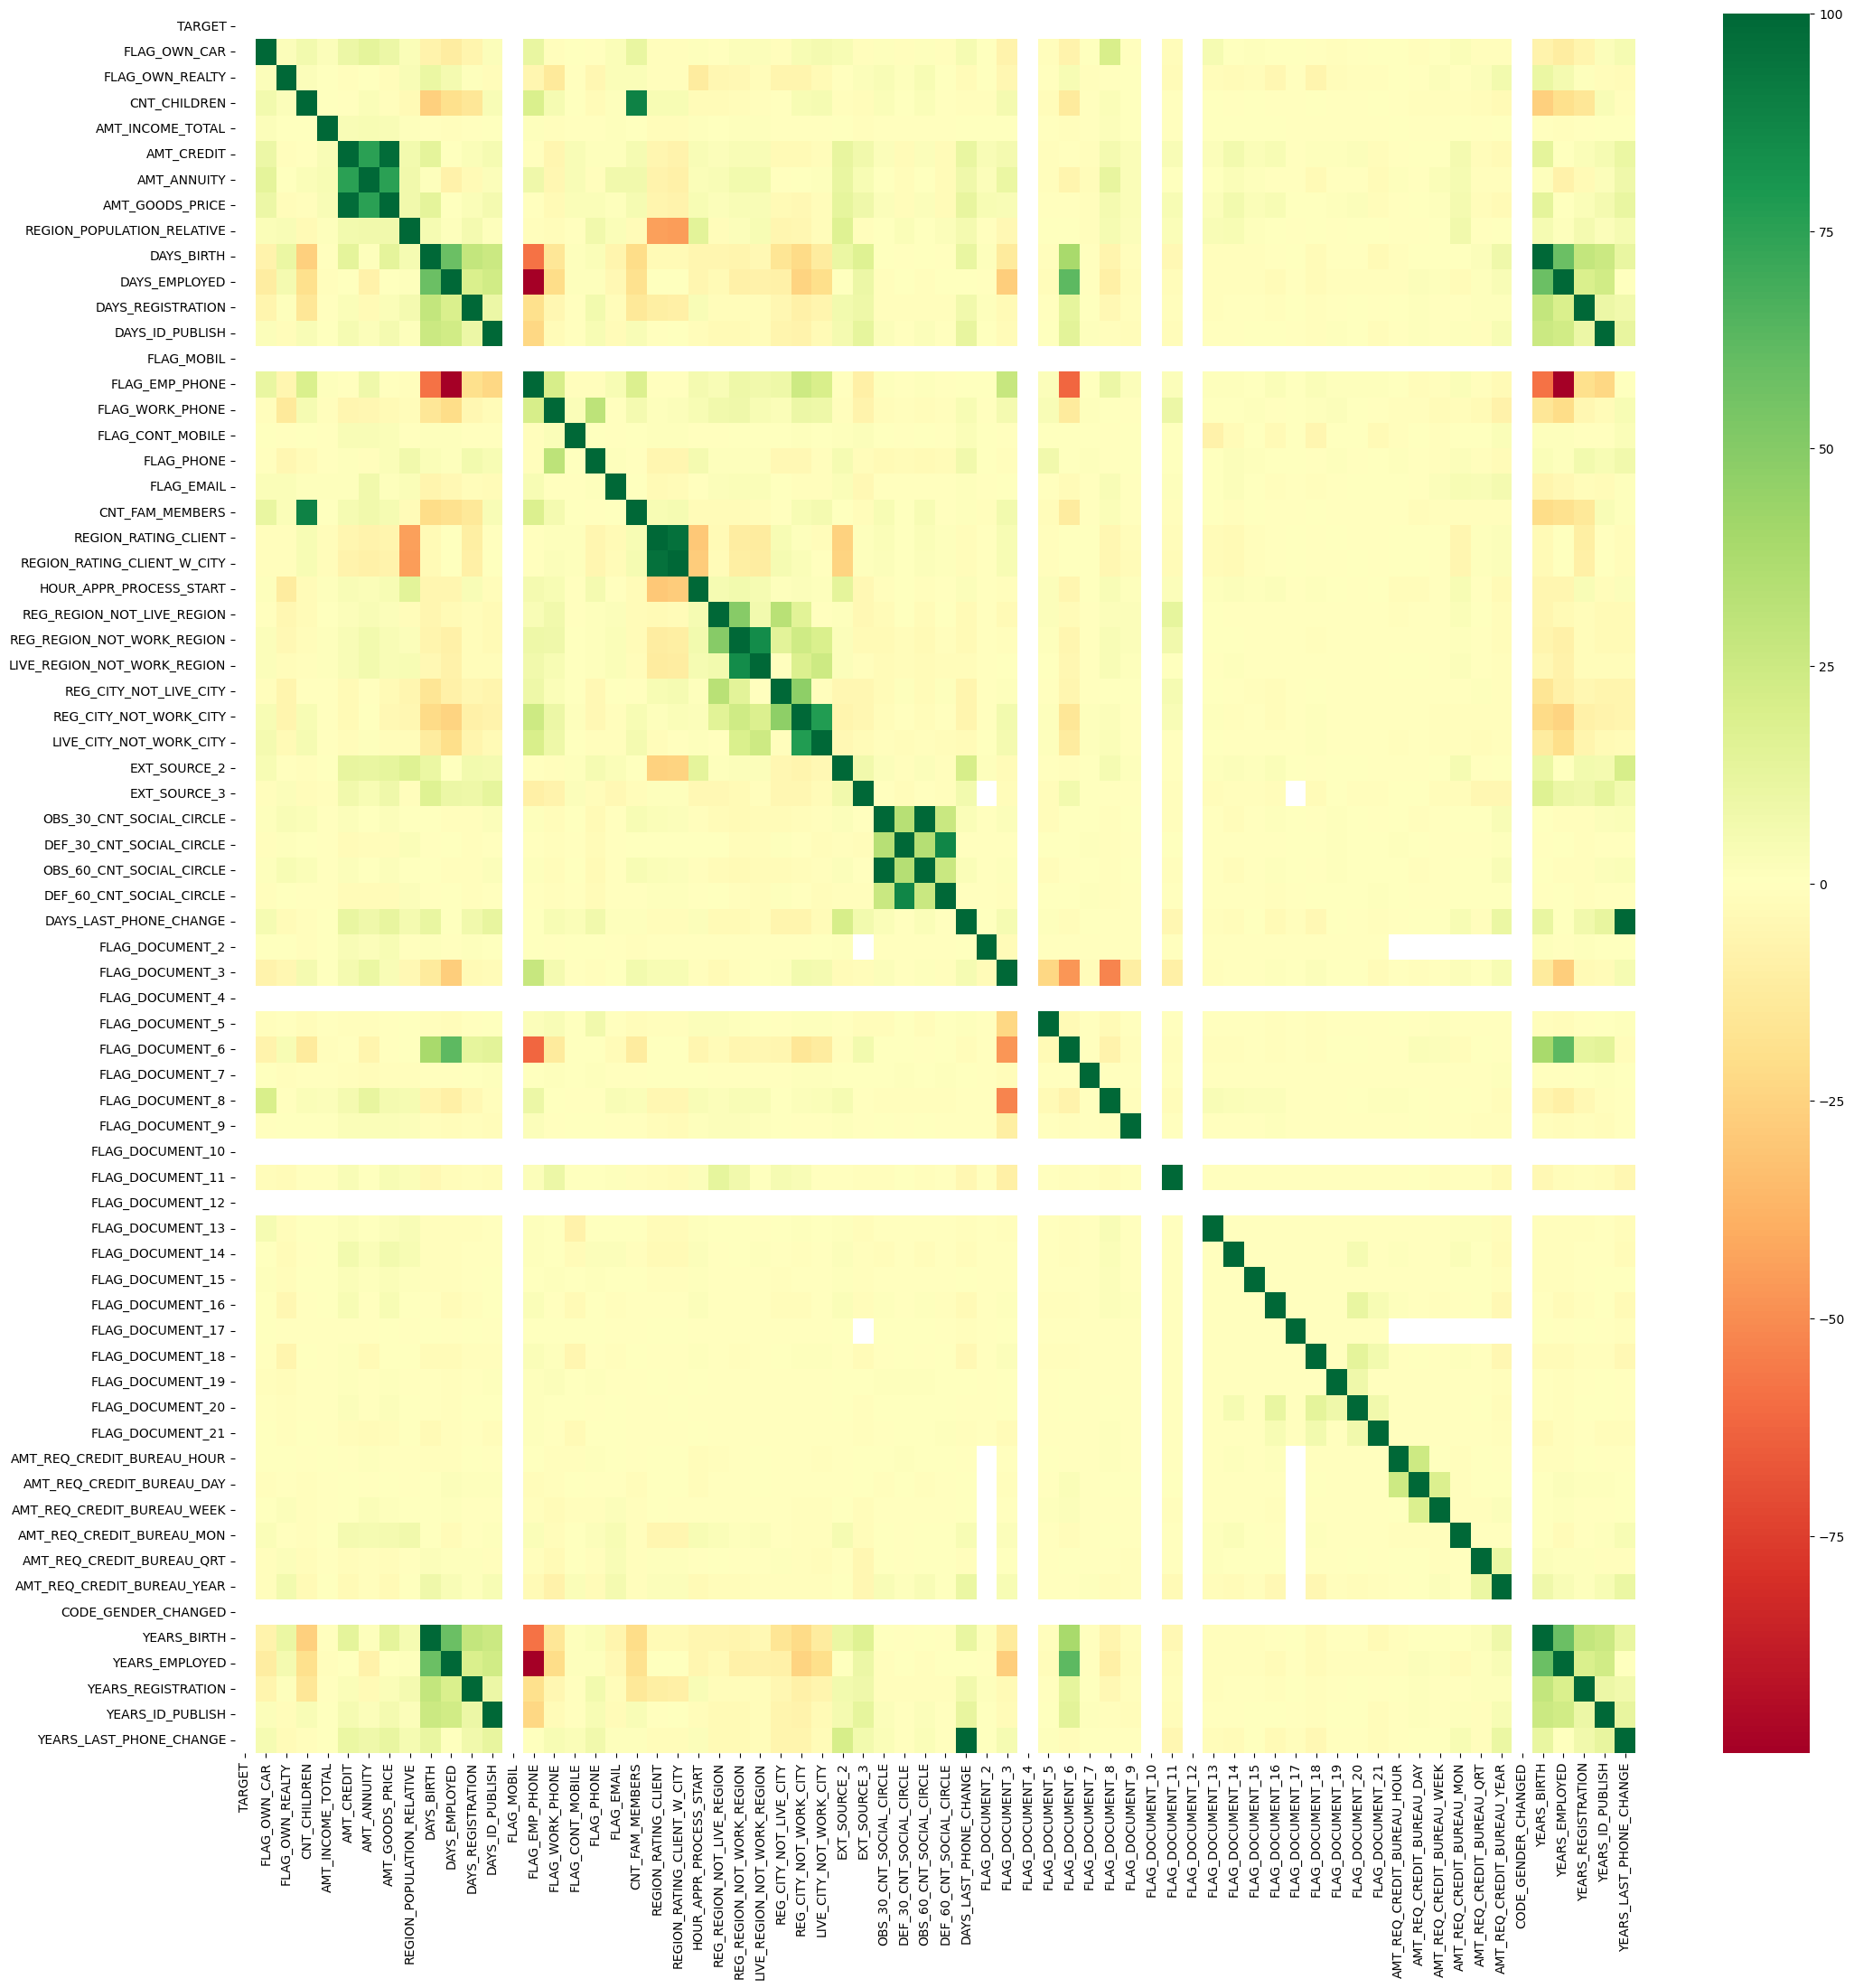

In [220]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


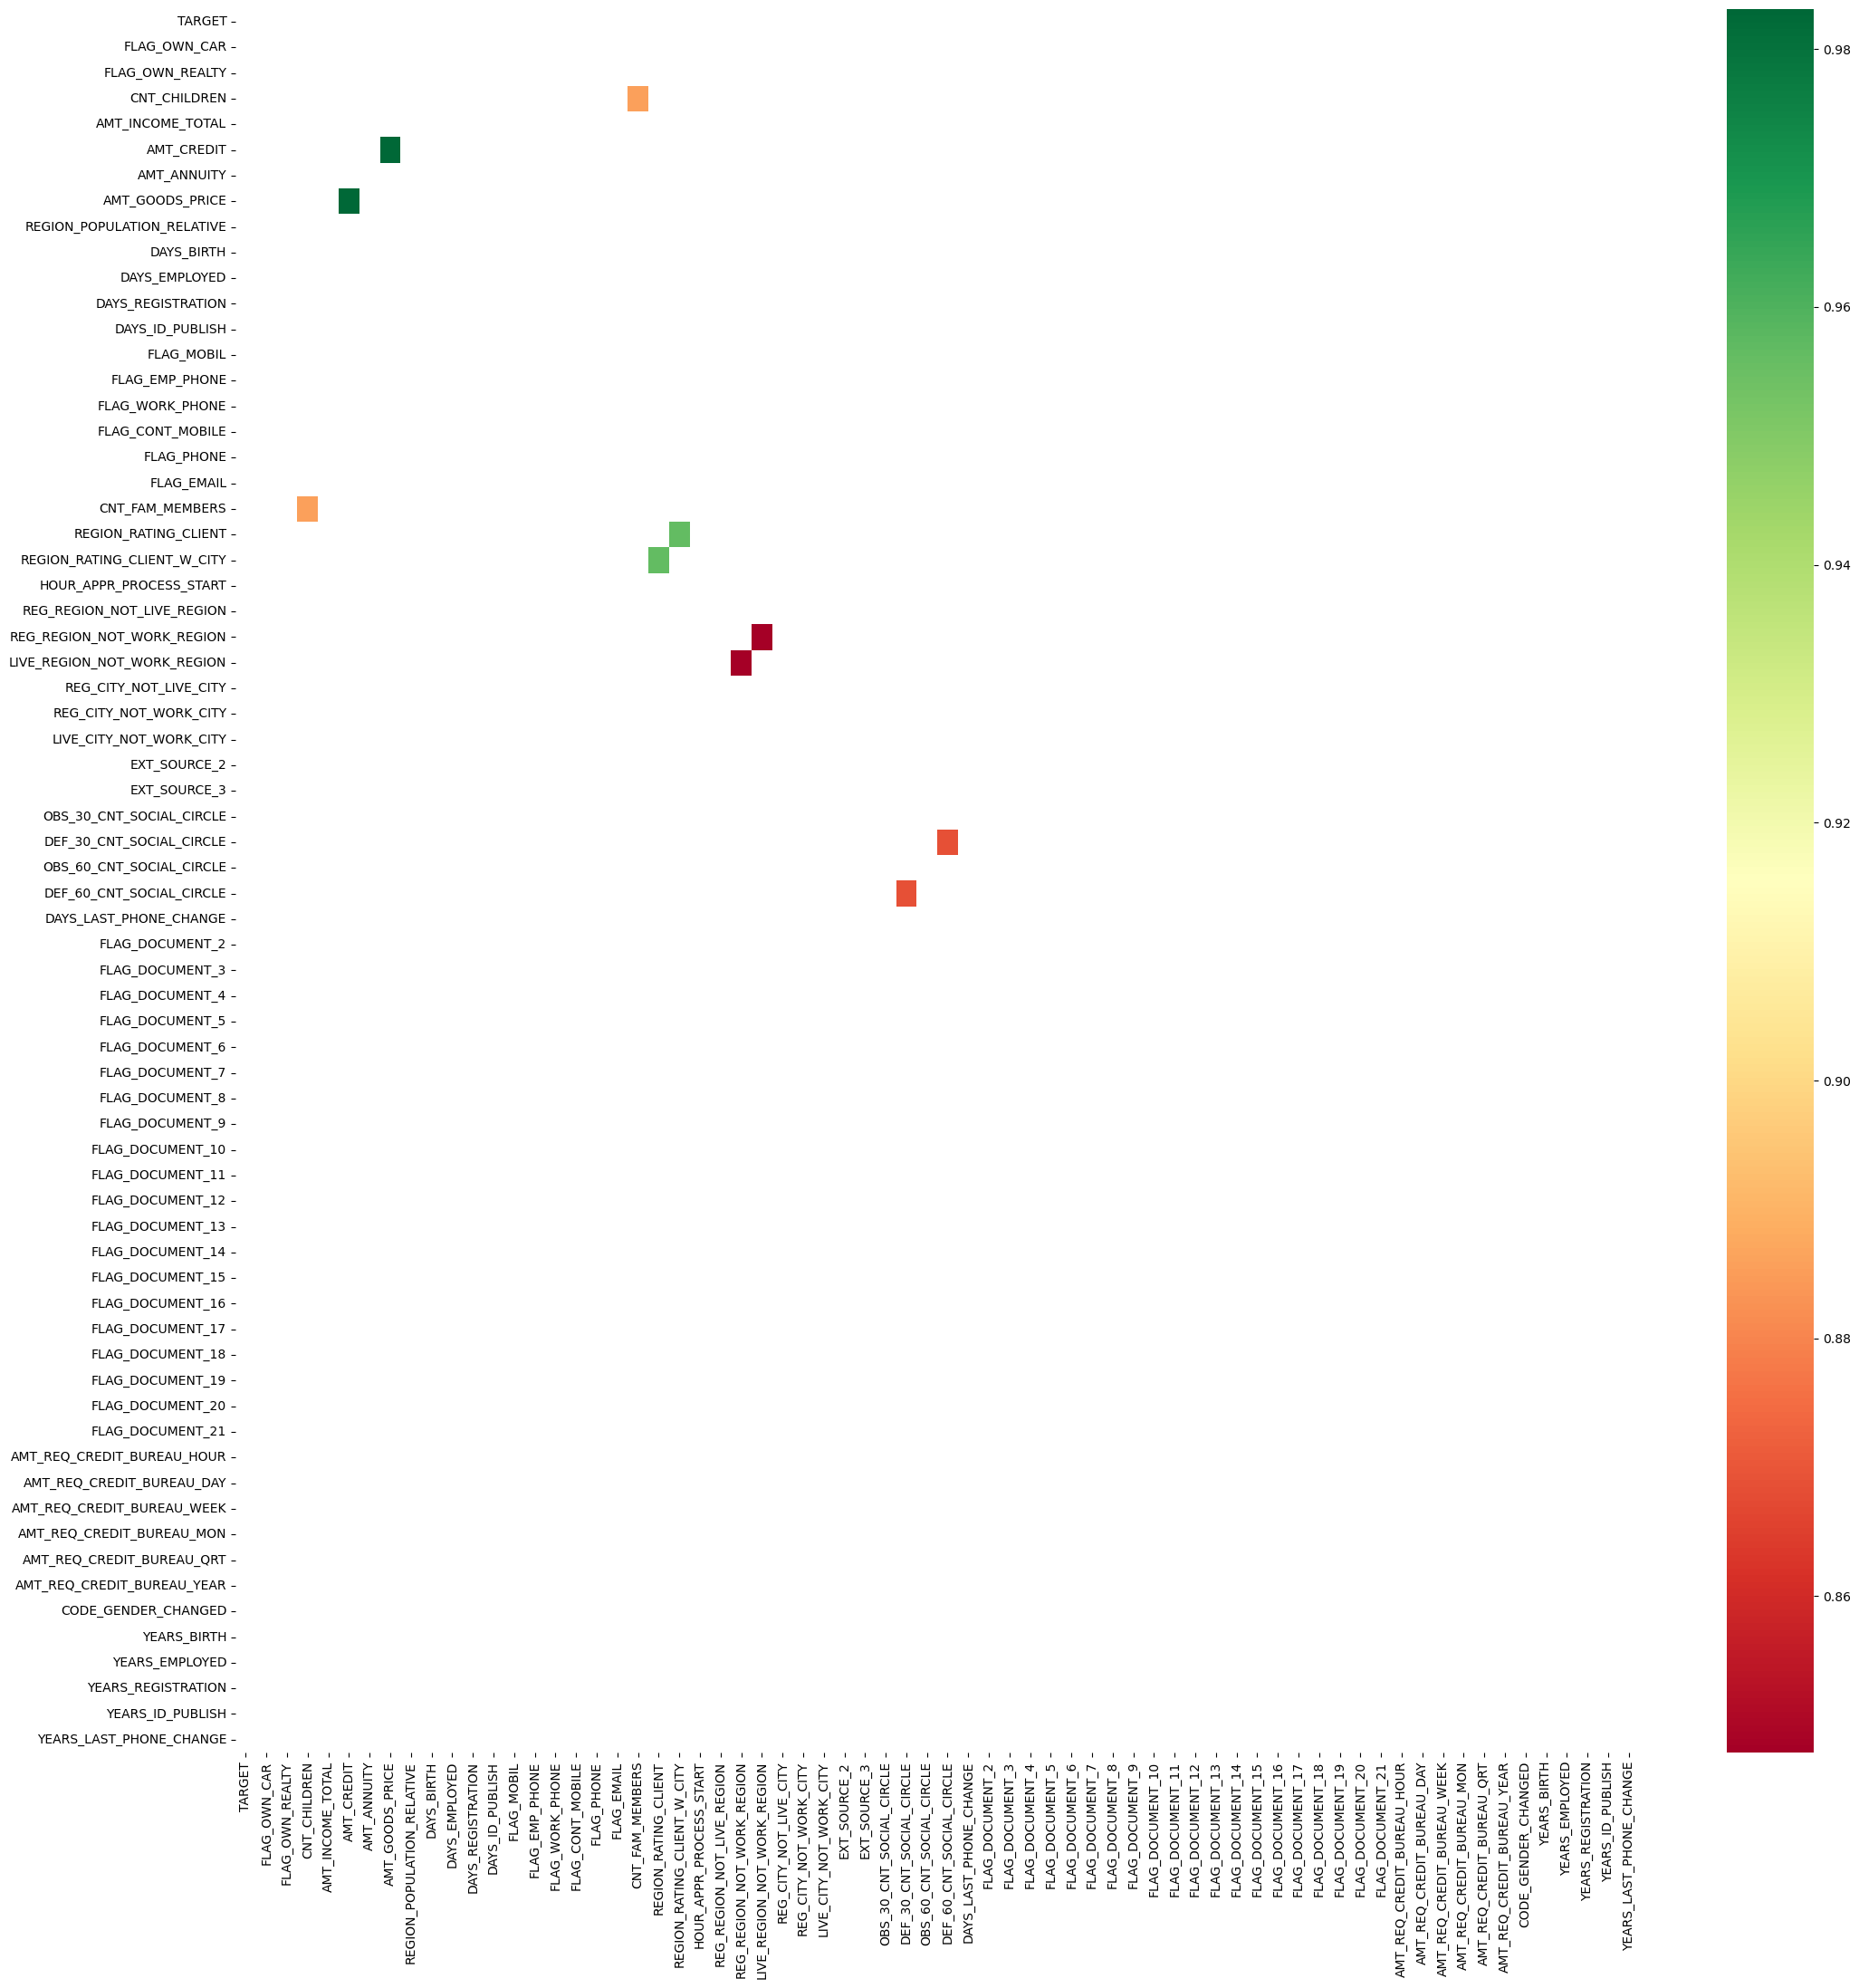

In [221]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.99)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [222]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                   AMT_GOODS_PRICE               0.98
AMT_GOODS_PRICE              AMT_CREDIT                    0.98
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.85
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.85
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.78
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.75
AMT_ANNUITY                  AMT_GOODS_PRICE               0.75
                             AMT_CREDIT                    0.75
AMT_CREDIT                   AMT_ANNUITY

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [223]:
df0.select_dtypes(include='number').shape

(282686, 68)

Є 67 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [224]:
corr_df0 = df0.select_dtypes(include='number').corr()

In [225]:
corr_df0.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
TARGET               NaN           NaN              NaN           NaN   
FLAG_OWN_CAR         NaN          1.00            -0.01          0.11   
FLAG_OWN_REALTY      NaN         -0.01             1.00         -0.00   
CNT_CHILDREN         NaN          0.11            -0.00          1.00   
AMT_INCOME_TOTAL     NaN          0.18             0.00          0.03   

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                         NaN         NaN          NaN              NaN   
FLAG_OWN_CAR                  0.18        0.12         0.14             0.12   
FLAG_OWN_REALTY               0.00       -0.04        -0.01            -0.05   
CNT_CHILDREN                  0.03        0.00         0.02            -0.00   
AMT_INCOME_TOTAL              1.00        0.34         0.42             0.35   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
TARGET                                   NaN         NaN            NaN   
FLAG_OWN_CAR                            0.04       -0.14          -0.16   
FLAG_OWN_REALTY                         0.01        0.12           0.07   
CNT_CHILDREN                           -0.02       -0.34          -0.25   
AMT_INCOME_TOTAL                        0.17       -0.06          -0.14   

                  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
TARGET                          NaN              NaN         NaN   
FLAG_OWN_CAR                  -0.09            -0.02       -0.00   
FLAG_OWN_REALTY                0.03            -0.01       -0.00   
CNT_CHILDREN                  -0.19             0.03        0.00   
AMT_INCOME_TOTAL              -0.06            -0.02        0.00   

                  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
TARGET                       NaN              NaN               NaN   
FLAG_OWN_CAR                0.16             0.01             -0.01   
FLAG_OWN_REALTY            -0.07            -0.11              0.01   
CNT_CHILDREN                0.24             0.06             -0.00   
AMT_INCOME_TOTAL            0.14            -0.03             -0.02   

                  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
TARGET                   NaN         NaN              NaN   
FLAG_OWN_CAR           -0.01        0.03             0.15   
FLAG_OWN_REALTY        -0.04        0.03             0.01   
CNT_CHILDREN           -0.03        0.02             0.88   
AMT_INCOME_TOTAL        0.00        0.08             0.03   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
TARGET                             NaN                          NaN   
FLAG_OWN_CAR                     -0.02                        -0.02   
FLAG_OWN_REALTY                   0.00                         0.00   
CNT_CHILDREN                      0.02                         0.02   
AMT_INCOME_TOTAL                 -0.19                        -0.20   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
TARGET                                NaN                         NaN   
FLAG_OWN_CAR                         0.01                       -0.00   
FLAG_OWN_REALTY                     -0.10                       -0.03   
CNT_CHILDREN                        -0.01                       -0.01   
AMT_INCOME_TOTAL                     0.08                        0.07   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                          NaN   
FLAG_OWN_CAR                            0.04                         0.05   
FLAG_OWN_REALTY                        -0.03                        -0.02   
CNT_CHILDREN                            0.01                         0.02   
AMT_INCOME_TOTAL                        0.14                         0.13   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
TARGET                               NaN       

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


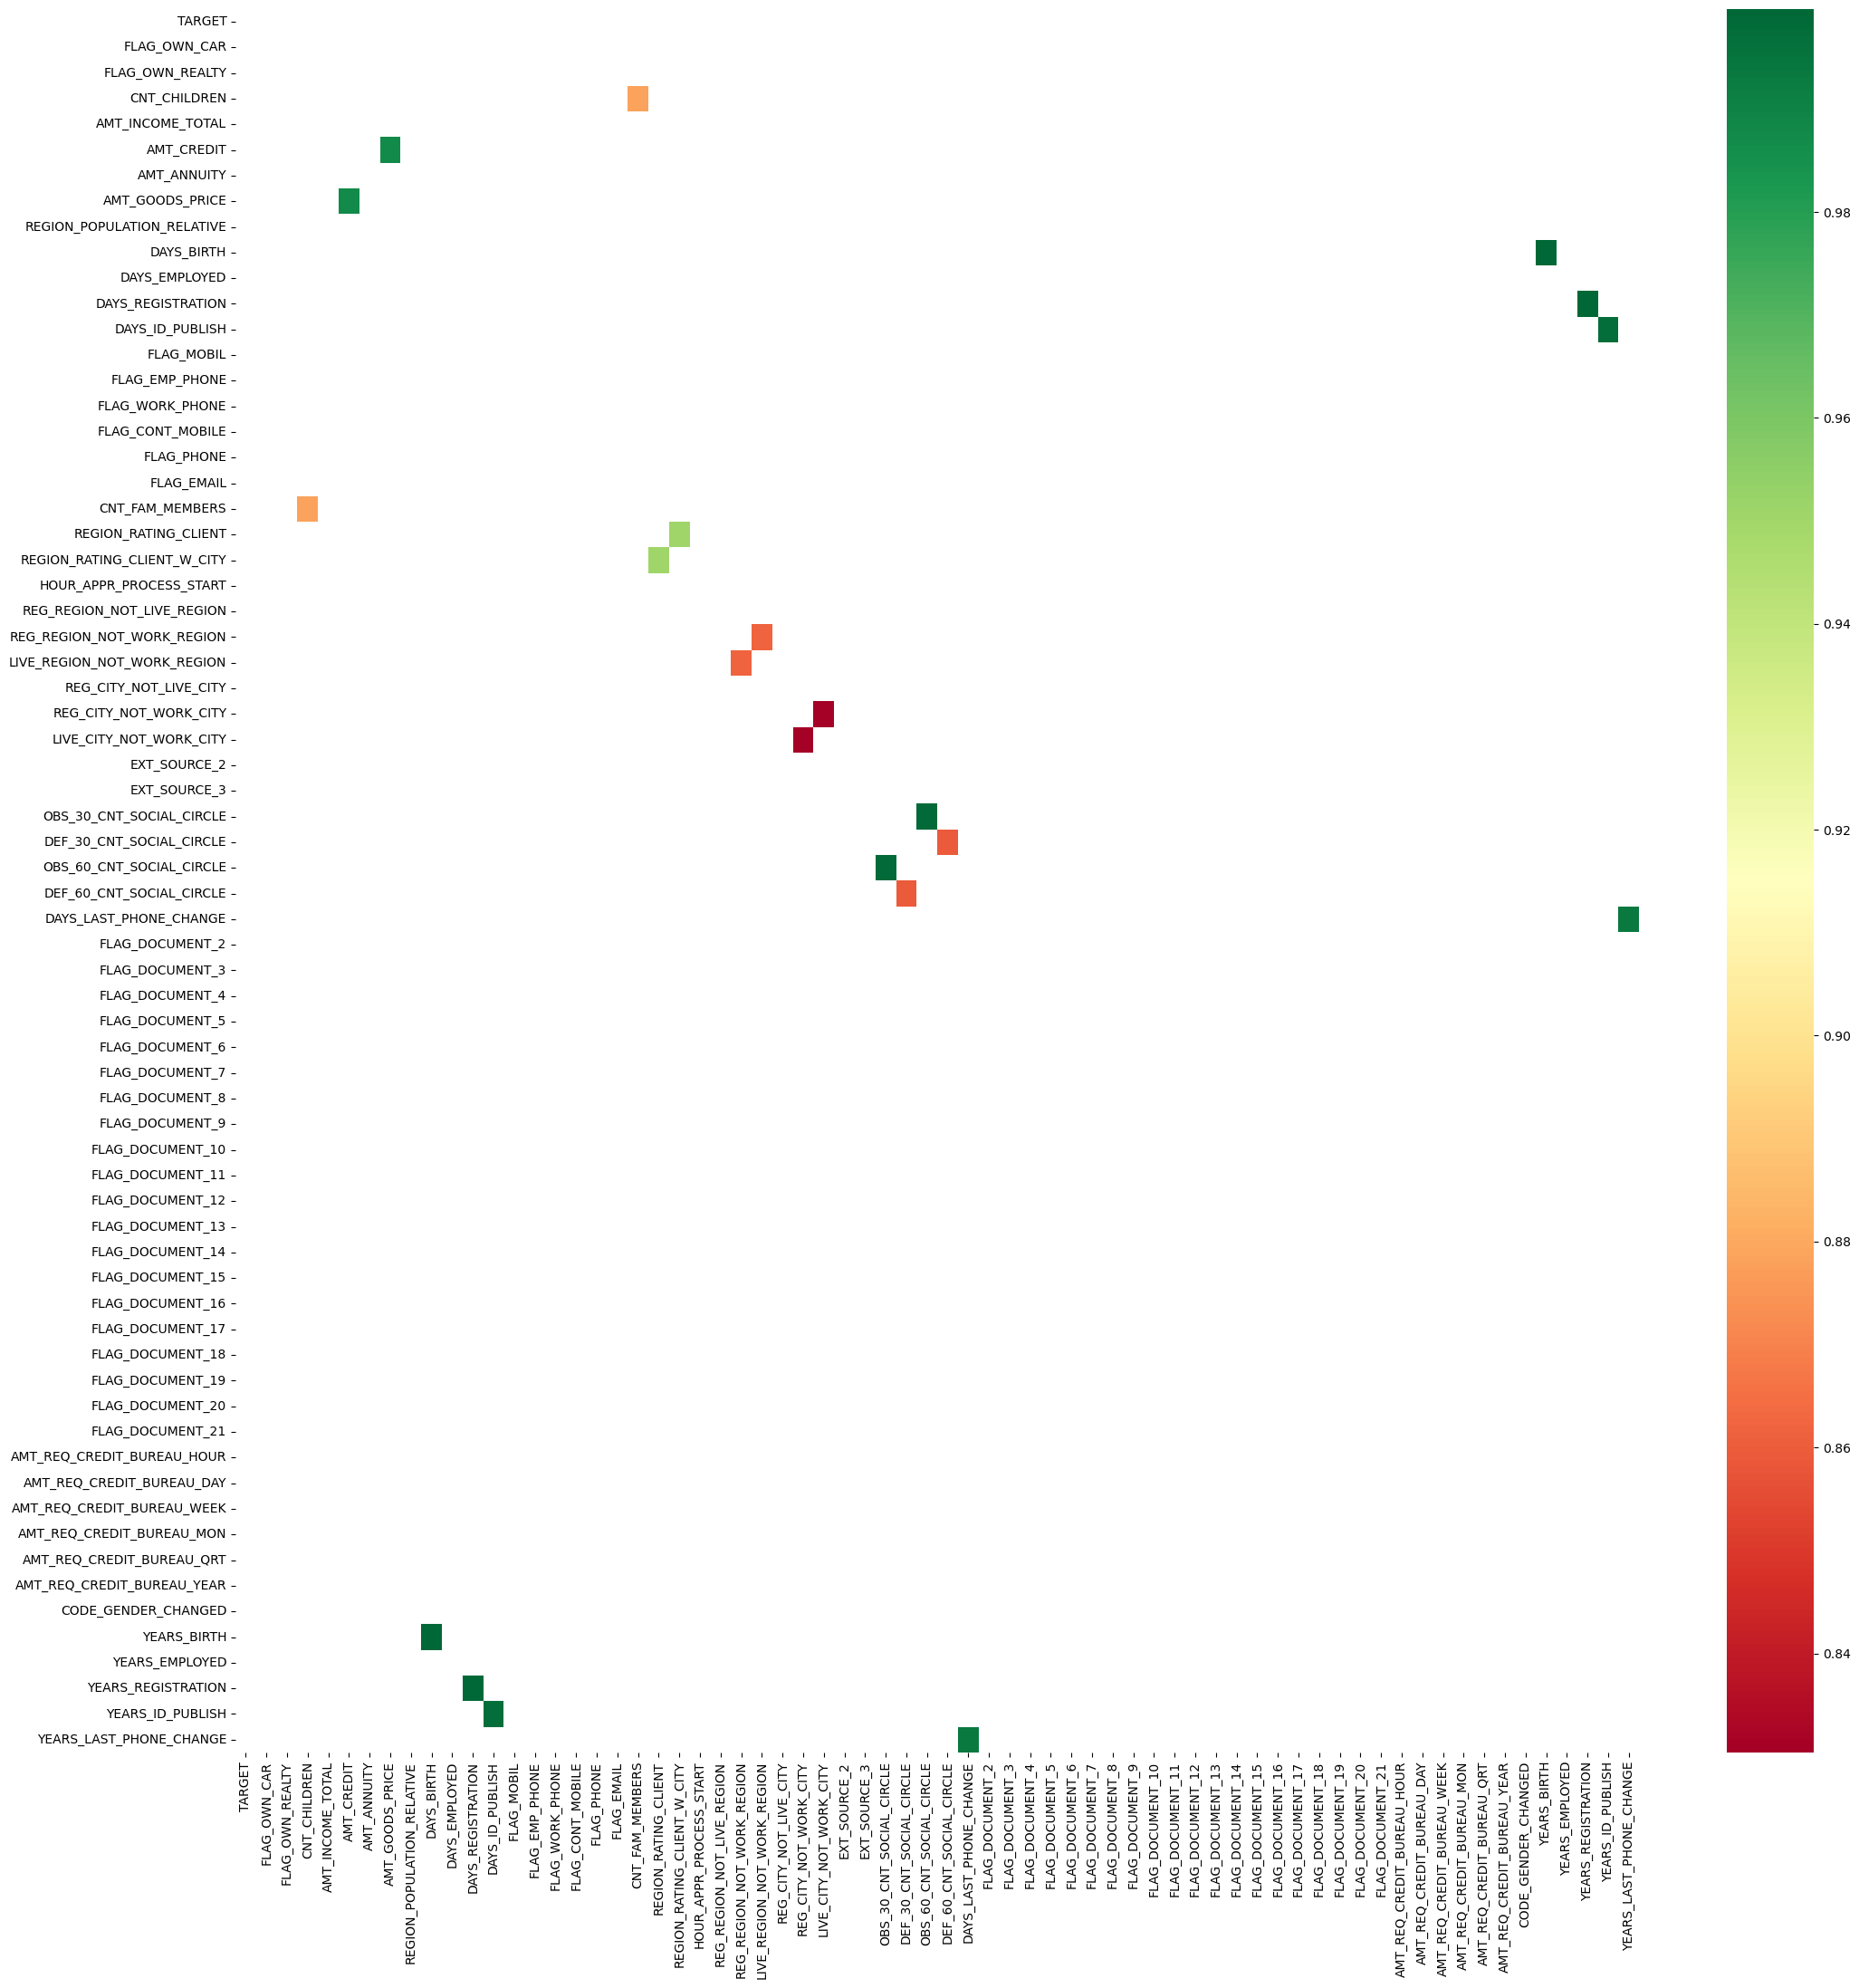

In [226]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [227]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_CREDIT                   AMT_GOODS_PRICE               0.99
AMT_GOODS_PRICE              AMT_CREDIT                    0.99
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.86
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.86
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.83
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.78
AMT_CREDIT                   AMT_ANNUITY                   0.77
AMT_ANNUITY                  AMT_CREDIT 

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [228]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [229]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -388973.25
Максимальне значення, після якого існують викиди: 1406688.75


#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [230]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [231]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -540000.0
Максимальне значення, після якого існують викиди: 1620000.0


Видалення викидів і побудова діаграми розподілу

In [232]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


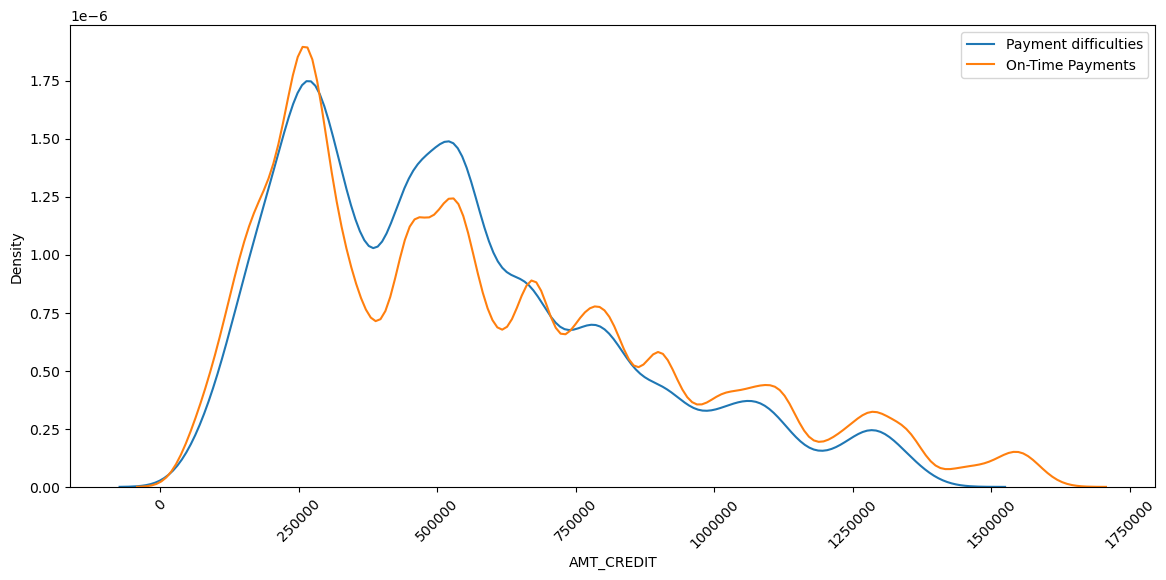

In [233]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

 Проведіть подібний до прикладу одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

In [249]:
# створимо функцію для аналізу колонки

def col_one_dim_analysis(df0, df1, colname):
    # df0 IQR calculation
    Q1_1 = df0[colname].quantile(0.25)
    Q1_3 = df0[colname].quantile(0.75)
    IQR_1 = Q1_3 - Q1_1
    print("IQR в таблиці target_0: " + str(IQR_1))
    print()

    #outliers df0
    Min_value0 = (Q1_1 - 1.5 * IQR_1)
    Max_value0 = (Q1_3 + 1.5 * IQR_1)
    print("Мінімальне значення, до якого існують викиди target_0: {}".format(Min_value0))
    print("Максимальне значення, після якого існують викиди target_0: {}".format(Max_value0))
    print()
    
    # df1 IQR calculation
    Q2_1 = df1[colname].quantile(0.25)
    Q2_3 = df1[colname].quantile(0.75)
    IQR_2 = Q2_3 - Q2_1
    print("IQR в таблиці target_1: " + str(IQR_2))
    print()

    #outliers df1
    Min_value1 = (Q2_1 - 1.5 * IQR_2)
    Max_value1 = (Q2_3 + 1.5 * IQR_2)
    print("Мінімальне значення, до якого існують викиди target_1: {}".format(Min_value1))
    print("Максимальне значення, після якого існують викиди target_1: {}".format(Max_value1))
    print()

    kde_no_outliers(df0, df1, Max_value0, Max_value1, colname)


IQR в таблиці target_0: 20.0

Мінімальне значення, до якого існують викиди target_0: 4.0
Максимальне значення, після якого існують викиди target_0: 84.0

IQR в таблиці target_1: 18.0

Мінімальне значення, до якого існують викиди target_1: 4.0
Максимальне значення, після якого існують викиди target_1: 76.0



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


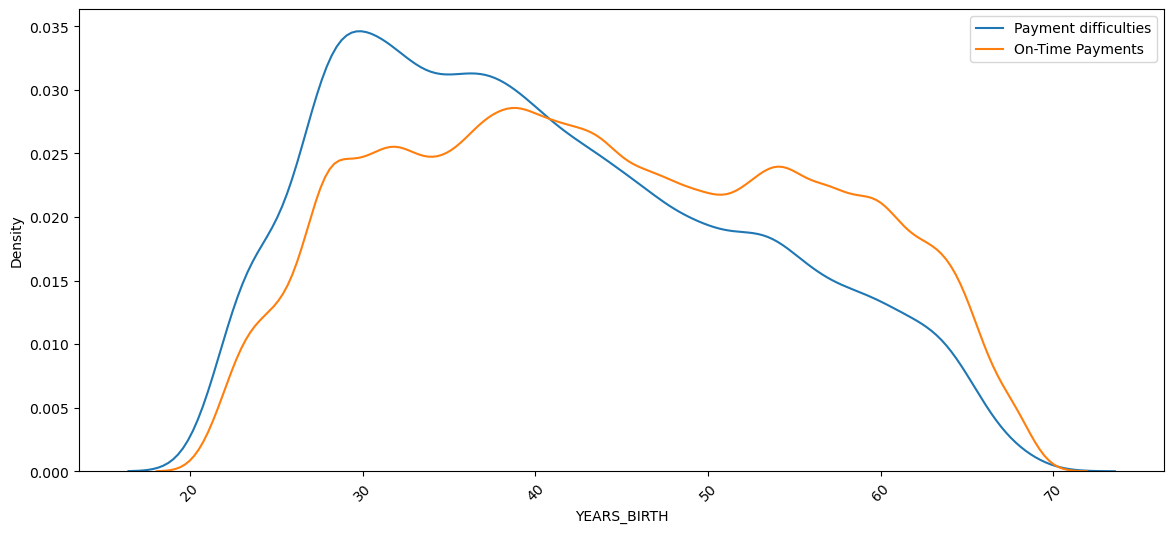

In [250]:
col_one_dim_analysis(df0, df1, 'YEARS_BIRTH')

**Спостереження**
Труднощі звчасною сплатою кредиту є у клієнтів віком до 41 року. Клієнти віком від 41 року не мають проблем з вчасною сплатою кредиту.

IQR в таблиці target_0: 450000.0

Мінімальне значення, до якого існують викиди target_0: -436500.0
Максимальне значення, після якого існують викиди target_0: 1363500.0

IQR в таблиці target_1: 436500.0

Мінімальне значення, до якого існують викиди target_1: -416250.0
Максимальне значення, після якого існують викиди target_1: 1329750.0



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


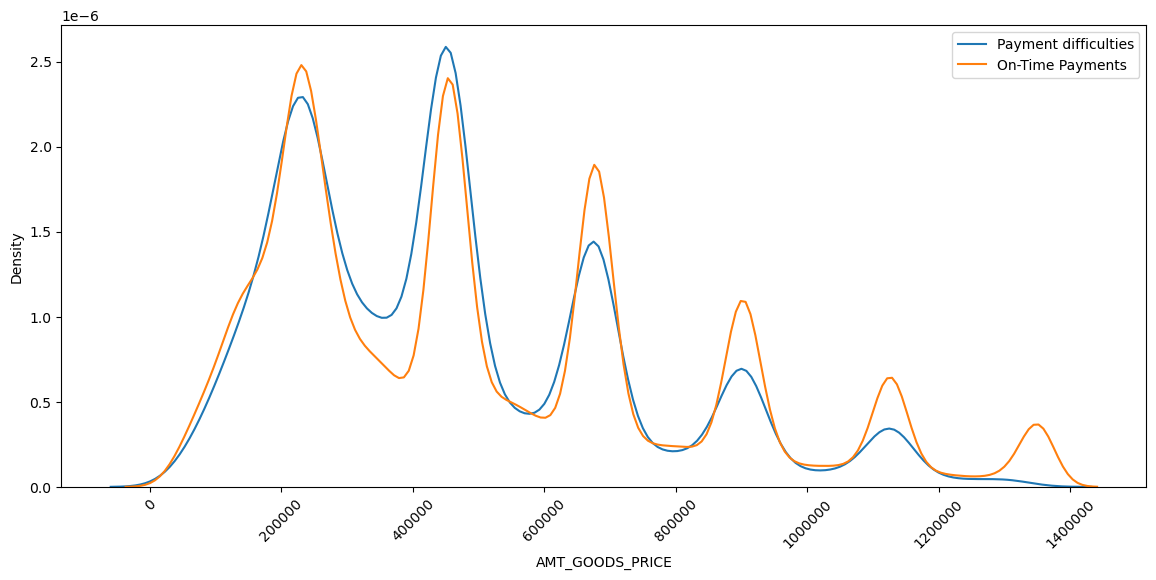

In [251]:
col_one_dim_analysis(df0, df1, 'AMT_GOODS_PRICE')

**Спостереження**

Для ціни застави (?) від 170'000 до 190'000 і від 250'000 до 650'000 є проблеми з вчасною сплатою кредиту. За виключенням невеликої частки з ціною ~570'000.

Для ціни застави від 670'000 і вище проблема з вчасною сплатою відсутня. За виключенням двох відрізків від ~ 720'000 до 770'000 і від 820'000 до 880'000.

IQR в таблиці target_0: 5107.0

Мінімальне значення, до якого існують викиди target_0: -6693.5
Максимальне значення, після якого існують викиди target_0: 13734.5

IQR в таблиці target_1: 2603.0

Мінімальне значення, до якого існують викиди target_1: -3227.5
Максимальне значення, після якого існують викиди target_1: 7184.5



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


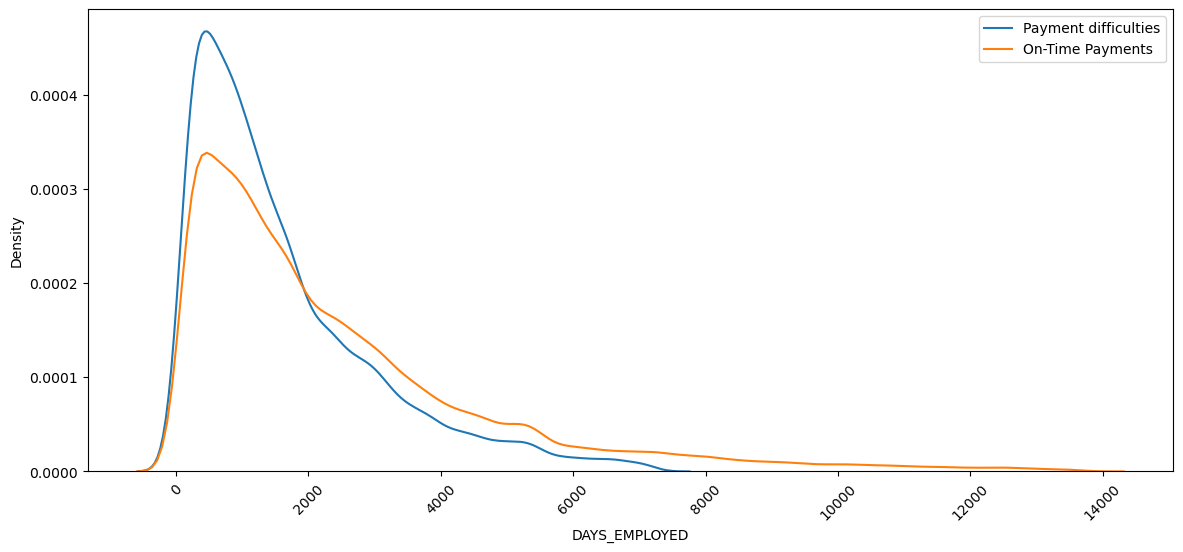

In [252]:
col_one_dim_analysis(df0, df1, 'DAYS_EMPLOYED')

**Спостереження**

У категорії клієнтів, які мають менше 2000 днів робочого стажу є проблеми з вчасним погашенням кредиту, а для клієнтів зі стажем вище цього значення платежі виконуються вчасно.

IQR в таблиці target_0: 1.0

Мінімальне значення, до якого існують викиди target_0: -1.5
Максимальне значення, після якого існують викиди target_0: 2.5

IQR в таблиці target_1: 1.0

Мінімальне значення, до якого існують викиди target_1: -1.5
Максимальне значення, після якого існують викиди target_1: 2.5



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


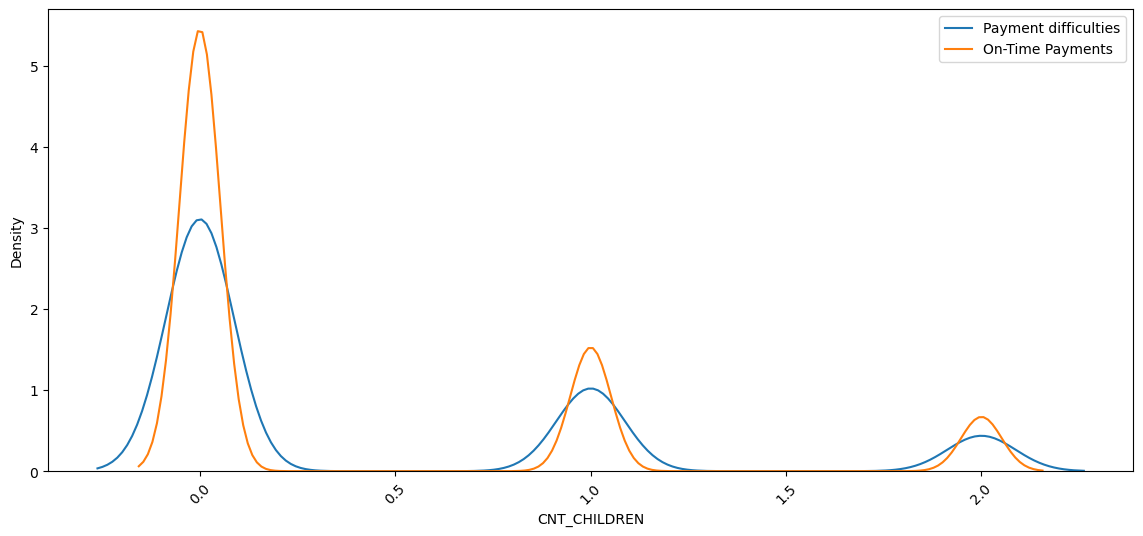

In [253]:
col_one_dim_analysis(df0, df1, 'CNT_CHILDREN')

**Спостереження**

З цього графіку важко зробити висновок про вплив наявності дітей на вчастність погашення кредиту, оскільки бачимо, що загалом незалежно від того мають клієнти одну, дві дитини чи не мають дітей - графік показує, що платіжних складнощів клієнти не мають, але загалом ми знаємо, що в інших категоріях такі клієнти є. І тут або ж складнощі з платежами мають клієнти з більшою кількістю дітей, яких ми виключили обрізавши аутлаєри, або ж робимо висновок, що цей стовпець не впливає на наш таргет.

IQR в таблиці target_0: 90000.0

Мінімальне значення, до якого існують викиди target_0: -22500.0
Максимальне значення, після якого існують викиди target_0: 337500.0

IQR в таблиці target_1: 90000.0

Мінімальне значення, до якого існують викиди target_1: -22500.0
Максимальне значення, після якого існують викиди target_1: 337500.0



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


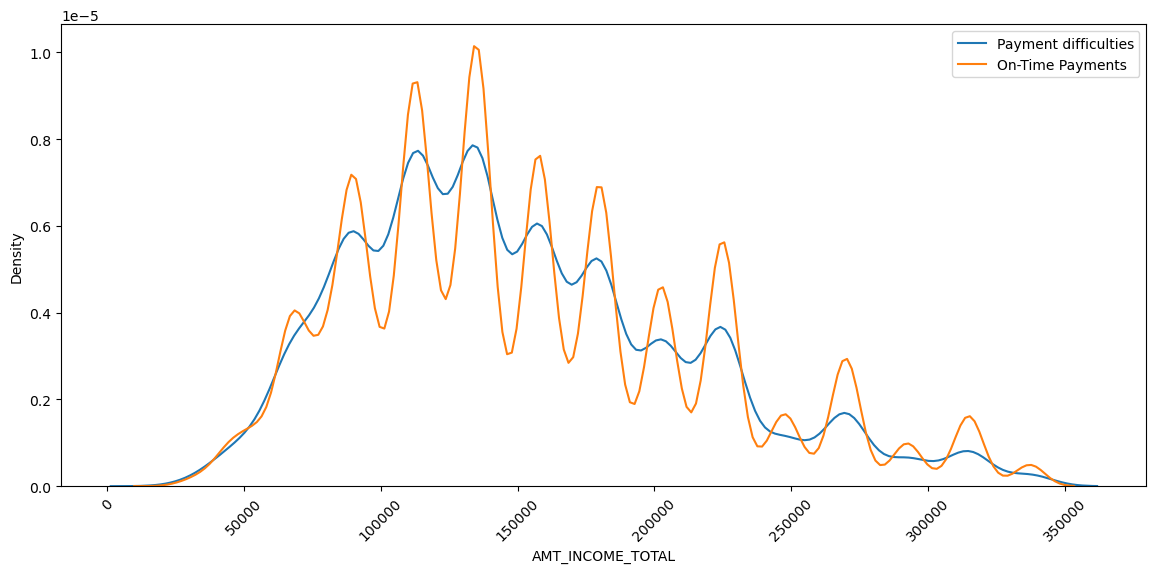

In [254]:
col_one_dim_analysis(df0, df1, 'AMT_INCOME_TOTAL')

**Cпостереження**

З цього графіку важко сказати про залежність визначення таргету від даного стовпця. Бачимо, що згідно графіку змінюється вчасність погашення кредиту клієнтами і клієнти з проблемами з погашенням. Крок доходу для кожного наступного етапу складає ~ 15'000-20'000

# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [286]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

1329750.0

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [235]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [236]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

1363500.0

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [237]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

Побудова діаграми розсіювання для порівняння з видаленими викидами

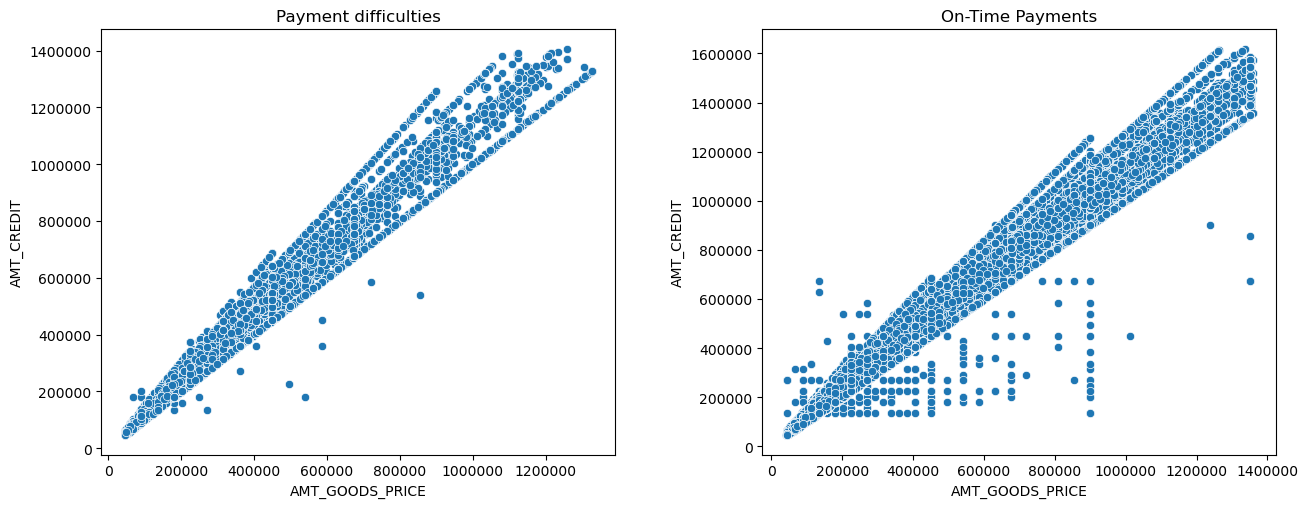

In [238]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

Проведіть подібний до прикладу кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.
Зробіть висновок про наявність кореляції між змінними.

In [257]:
def col_two_dim_analysis (df0,df1,colname1, colname2):
    # outliers table df0 colname1
    max_value0_colname1 = outlier_range(df0,colname1)
    # outliers table df0 colname2
    max_value0_colname2 = outlier_range(df0,colname2)
    # outliers table df1 colname1
    max_value1_colname1 = outlier_range(df1,colname1)
    # outliers table df1 colname2
    max_value1_colname2 = outlier_range(df1,colname2)

    plt.figure(figsize = (14, 6))

    plt.subplot(1,2,1)
    plt.title('Payment difficulties')
    sns.scatterplot(x=df1[df1[colname1] < max_value1_colname1][colname1],
                y=df1[df1[colname2] < max_value1_colname2][colname2], data=df1)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')

    plt.subplot(1,2,2)
    plt.title('On-Time Payments')
    sns.scatterplot(x=df0[df0[colname1] < max_value1_colname1][colname1],
                y=df0[df0[colname2] < max_value1_colname2][colname2], data=df0)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')

    plt.tight_layout(pad = 4)
    plt.show()  


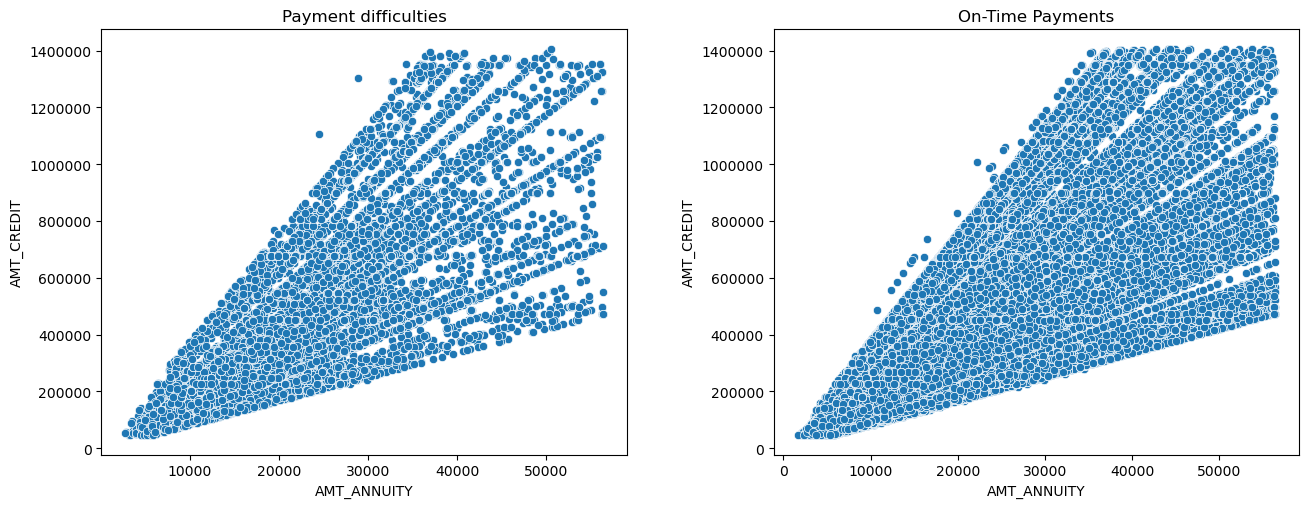

In [277]:
col_two_dim_analysis (df0,df1,'AMT_ANNUITY', 'AMT_CREDIT')

Між стовпцями 'AMT_ANNUITY' та 'AMT_CREDIT' є позитивна кореляція. Чим вища сума кредиту, тим більша сума платежу ануїтету.

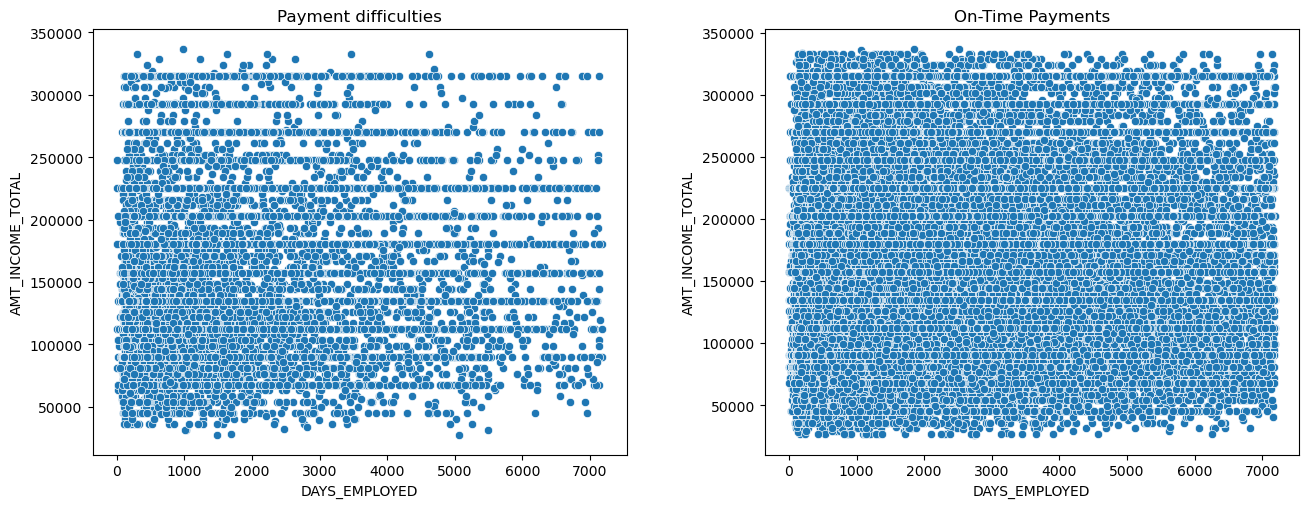

In [278]:
col_two_dim_analysis (df0,df1,'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL')

Між стовпцями 'DAYS_EMPLOYED' та 'AMT_INCOME_TOTAL' відсутня кореляція.

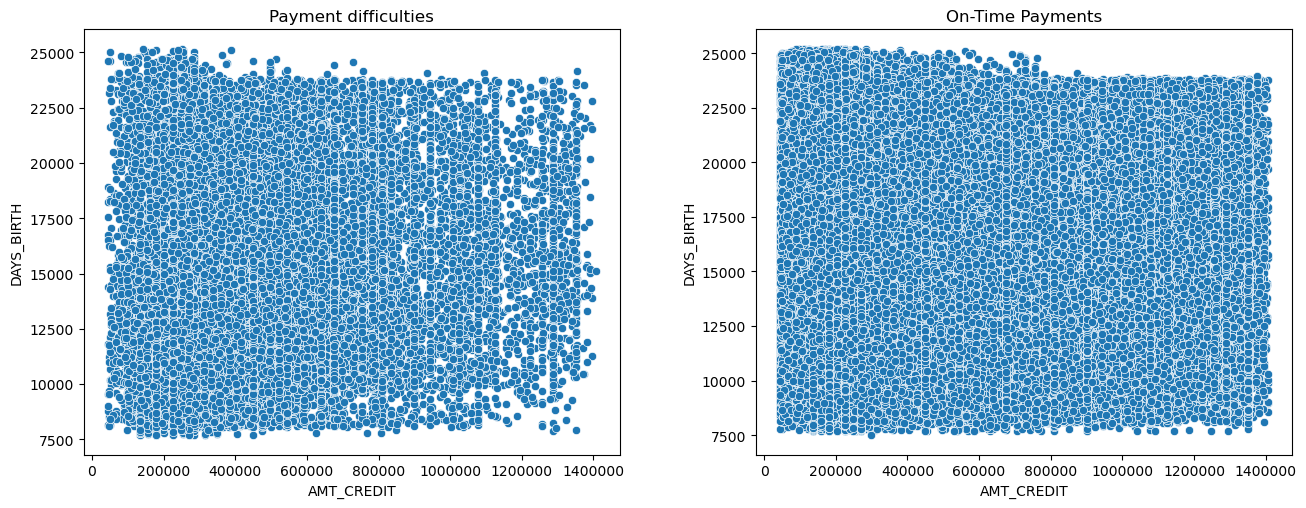

In [260]:
col_two_dim_analysis (df0,df1,'AMT_CREDIT', 'DAYS_BIRTH')

Між стовпцями 'AMT_CREDIT' та 'DAYS_BIRTH' відсутня кореляція.

## Неперервні та категоріальні змінні

In [239]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [240]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [241]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

**Клієнт з платіжними труднощами**

In [242]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2438.00 648500.58 410415.70  47970.00   
                    M           1571.00 642070.94 409695.93  45000.00   
Incomplete higher   F            504.00 520150.35 352227.49  91692.00   
                    M            368.00 554723.82 347843.71  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           323595.00 545040.00  877500.00 2687355.00  
                    M           329202.00 545040.00  832797.00 2695500.00  
Incomplete higher   F           269550.00 450000.00  675000.00 2695500.00  
                    M           284400.00 497520.00  699976.12 2013840.00

**Клієнт зі вчасними платежами**

In [243]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              97.00 708770.74 463052.42 130824.00   
                    M              64.00 735235.38 497739.97  74182.50   
Higher education    F           47852.00 682485.00 456642.78  45000.00   
                    M           23002.00 713144.54 486073.66  45000.00   
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           354469.50 607500.00 1006920.00 2463840.00  
                    M           309519.00 610056.00 1036890.00 1984500.00  
Higher education    F           302206.50 568057.50  916470.00 4050000.00  
                    M           315000.00 592560.00  973503.00 4050000.00  
Incomplete higher   F           253737.00 454500.00  760225.50 2517300.00

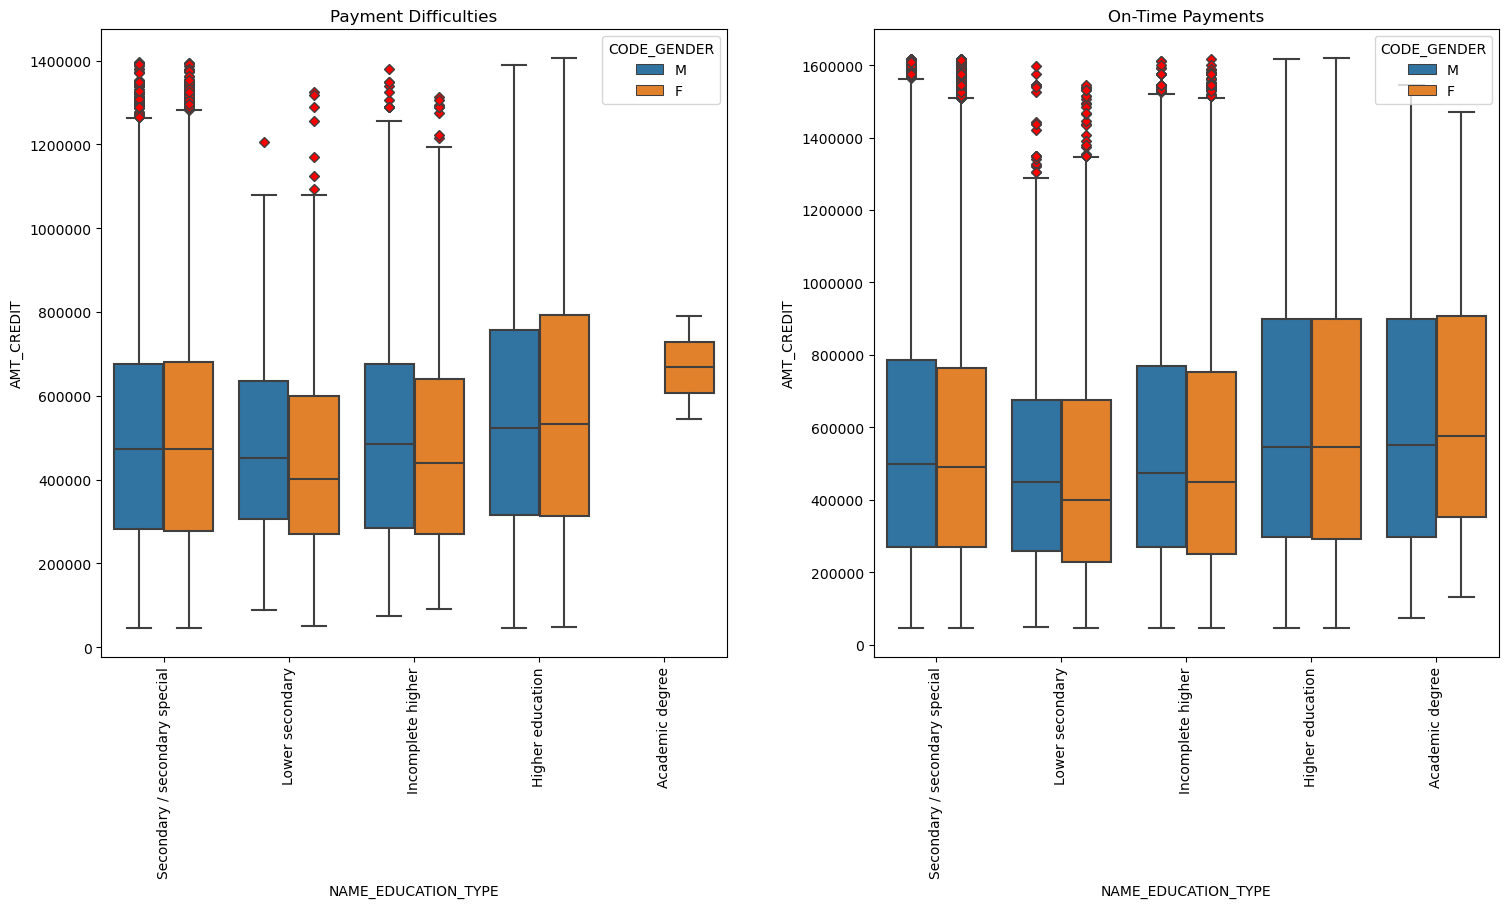

In [244]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')


**Спостереження**
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "академічним ступенем" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "академічним ступенем" завжди сплачують кредит вчасно

 # ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

Можете також проаналізувати додатково свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.


In [300]:
def analyze_continuous_variable(df0, df1, categorical, continuous, hue_column):
    # Calculate outlier ranges
    max_value1 = outlier_range(df1,continuous)
    max_value0 = outlier_range(df0,continuous)
    
    
    # Show head of 'Clients with payment issues'
    print("'Clients with payment issues' head:")
    print(df1.groupby(by=[categorical, hue_column])[continuous].describe().head())
    print()
    
    # Show head of 'Clients without payment issues'
    print("'Clients without payment issues' head:")
    print(df0.groupby(by=[categorical, hue_column])[continuous].describe().head())
    print()
    
    # Plot
    
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_value1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_value0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

'Clients with payment issues' head:
                                 count      mean        std      min  \
NAME_FAMILY_STATUS CODE_GENDER                                         
Civil marriage     F           1753.00 153620.72  101045.86 25650.00   
                   M           1208.00 173949.99   92449.17 36000.00   
Married            F           8324.00 159907.85 1283283.40 27000.00   
                   M           6526.00 182233.06   94787.77 31500.00   
Separated          F           1045.00 161159.55   82633.33 36000.00   

                                     25%       50%       75%          max  
NAME_FAMILY_STATUS CODE_GENDER                                             
Civil marriage     F           108000.00 135000.00 180000.00   3150000.00  
                   M           117000.00 157500.00 202500.00   1350000.00  
Married            F            90000.00 135000.00 180000.00 117000000.00  
                   M           126000.00 157500.00 225000.00   1890000.00  
Sep

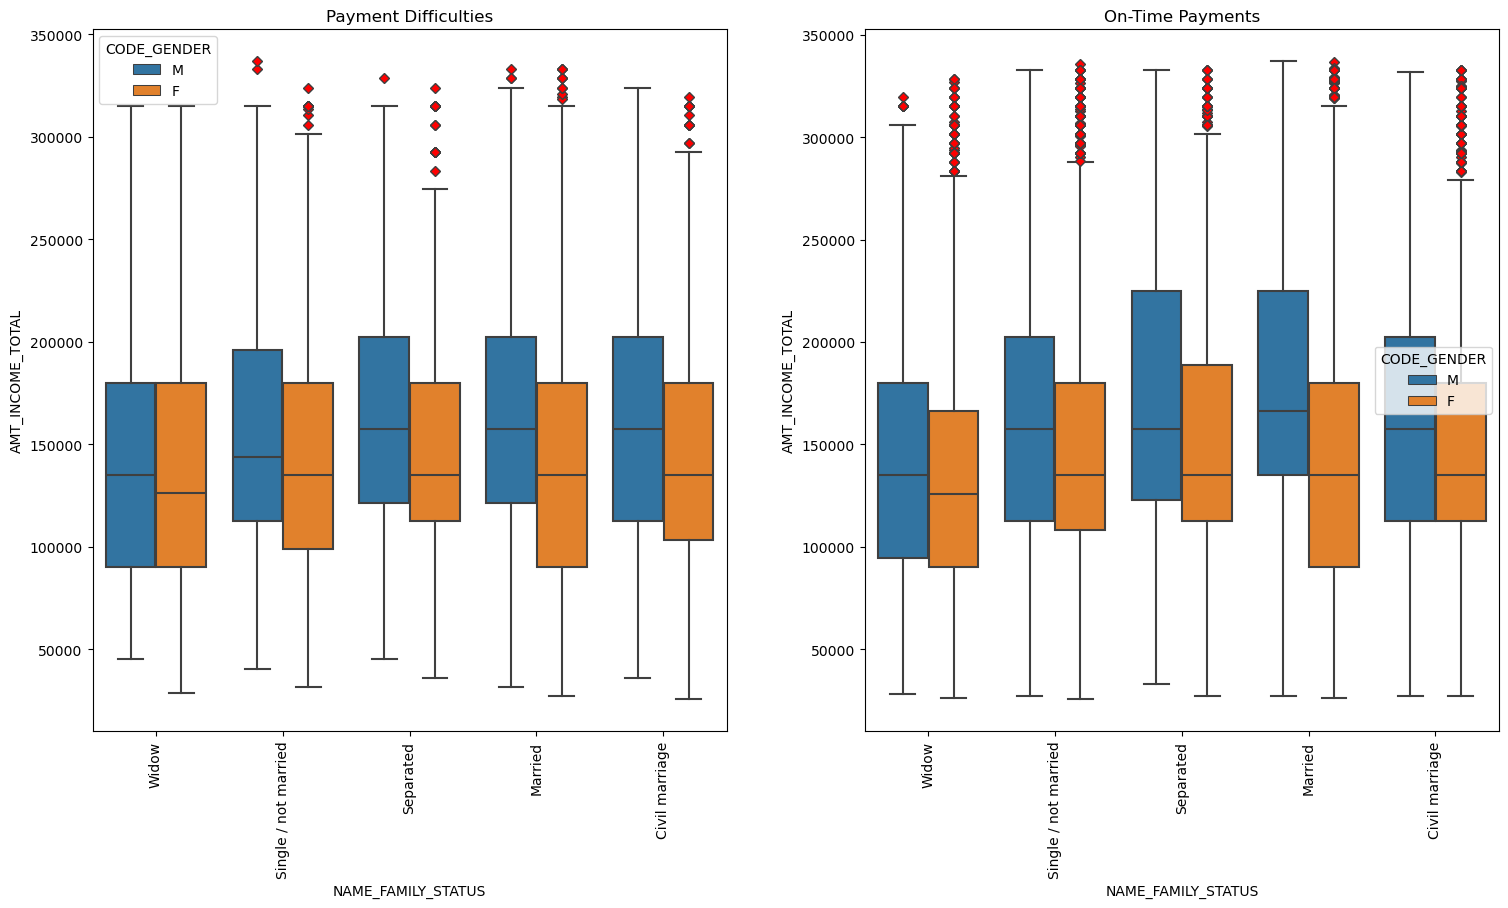

In [288]:
analyze_continuous_variable(df0, df1, 'NAME_FAMILY_STATUS', 'AMT_INCOME_TOTAL', 'CODE_GENDER')

**Спостереження**

1. Незалежно від того чи є проблеми у клієнта з вчасним погашенням кредиту чи ні, медіанні суми збігаються в обох таргетах. 
2. Загалом в обох таргетах чоловіки роблять запит на більші суми по кредиту. Зокрема у категорії клієнтів з вчасними платежами, більша кількість самотніх та одружених чоловіків зробили запит/отримали кредит на більші суми, ніж в категорії клієнтів з проблемами зі сплатою кредиту. 
3. В категорії клієнтів без проблем з вчасним погашенням кредиту більша кількість аутлаєрів по сумам кредиту. Це може бути пов'язано загалом з кредитною історією клієнта - чим краща попередня історія, тим вищу суму погоджує кредитна установа. Для категорії з проблемами у вчасному погашені кредиту, суми кредиту будуть дещо меншими.

'Clients with payment issues' head:
                                           count      mean      std      min  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                         
20-30                Co-op apartment       40.00 148628.70 59516.24 67500.00   
                     House / apartment   4201.00 151897.22 70874.65 31500.00   
                     Municipal apartment  153.00 153608.82 78282.79 45000.00   
                     Office apartment      40.00 147375.00 50817.26 67500.00   
                     Rented apartment     229.00 144210.10 59998.66 45000.00   

                                               25%       50%       75%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                   
20-30                Co-op apartment     110250.00 135000.00 185625.00   
                     House / apartment   112500.00 135000.00 180000.00   
                     Municipal apartment 108000.00 135000.00 180000.00   
                     Office apart

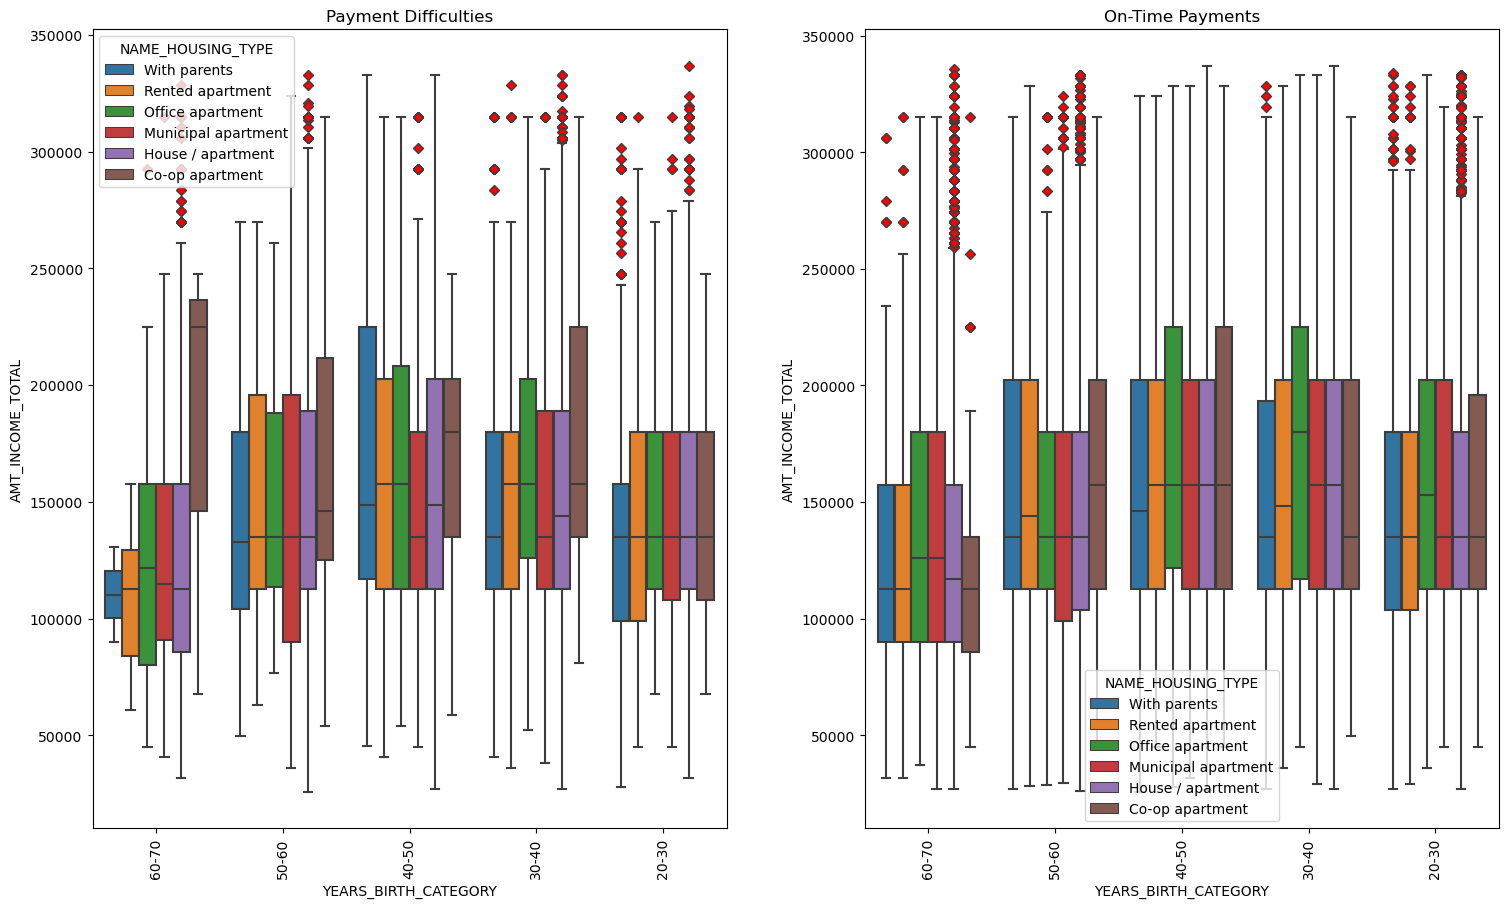

In [289]:
analyze_continuous_variable(df0, df1, 'YEARS_BIRTH_CATEGORY', 'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE')

**Спостереження**

1. Сума кредиту у категорії юзерів без проблем з погашенням є ширшою по всім категоріям віку. Медіанні значення суми кредиту незначно відрізняються  незалежно від того чи є проблеми з погашенням кредиту чи ні. 
2. В групі клієнтів 20-30 років з проблемою вчасного погашення цікавим є те, що медіанна сума та 75% перцентиль є рівним для усіх категорій житла, за виключенням тих, хто живе з батьками. Також 75% перцентиль є аналогічним для половини категорії клієнтів цього ж віку, які не мають проблем з погашенням кредиту. Можливо тут в більшості йде мова про кредит на навчання, тому ці показники здебільшого збігаються.
3. В категорії 40-50 років звернув на себе увагу показник для клієнтів з проблемами з погашенням кредиту, які зазвичай отримують більші суми і живуть з батьками. Я б для таких клієнтів запропонувала б ввести якийсь коефіцієнт, який буде знижувати їх кредитну оцінку під час прийняття рішення щодо видачі кредиту загалом, а також суми виданого кредиту.
4. Те саме стосується категорії клієнтів віком 60-70 років, які проживають в co-op (кооперативних?) квартирах і мають запит на суму від 149’000 і вище.


'Clients with payment issues' head:
                                   count      mean       std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                         
Commercial associate F           2966.00 536362.21 353710.65  45000.00   
                     M           2391.00 526387.31 335859.94  45000.00   
Maternity leave      F              2.00 929250.00 715945.62 423000.00   
Pensioner            F           2241.00 495016.26 317042.45  45000.00   
                     M            739.00 486543.08 321104.43  45000.00   

                                       25%       50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                            
Commercial associate F           270000.00 450000.00  675000.00 3600000.00  
                     M           270000.00 450000.00  675000.00 2961000.00  
Maternity leave      F           676125.00 929250.00 1182375.00 1435500.00  
Pensioner            F           229500.00 450000.00  675000

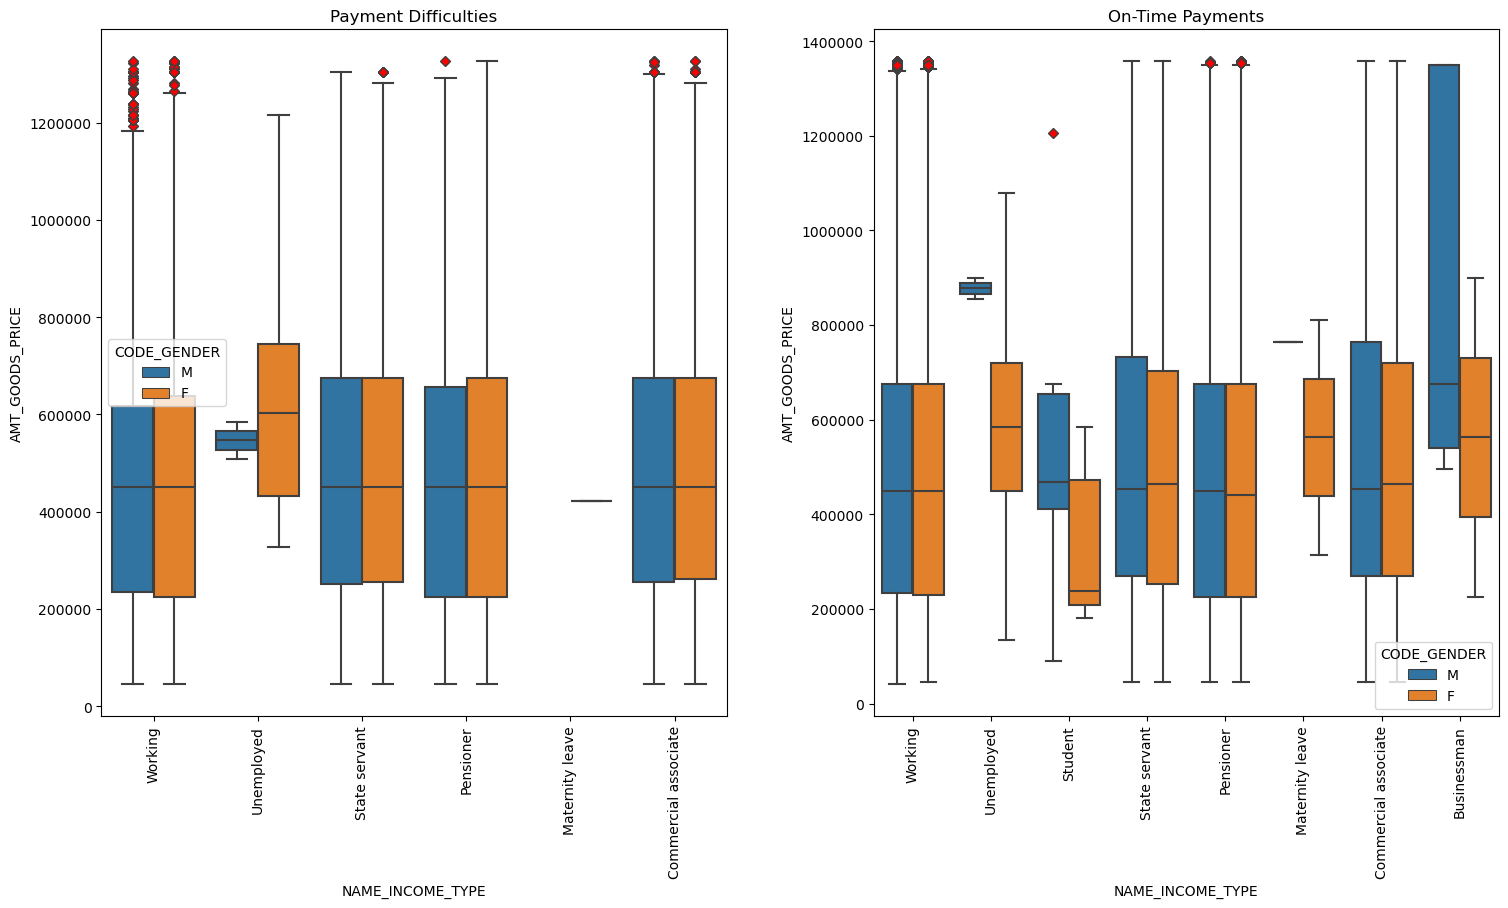

In [290]:
analyze_continuous_variable(df0, df1, 'NAME_INCOME_TYPE', 'AMT_GOODS_PRICE', 'CODE_GENDER')

**Спостереження**
1. Категорія клієнтів, які мають власний бізнес завжди вчасно сплачують кредитні зобов’язання і мають вищі суми застав. 
2. Те ж спостереження щодо студентів з відмінністю в сумах застави, яка значно менша. Але ця категорія клієнтів також не має проблем з погашенням кредиту.
3. Дуже мала кількість чоловіків у статусі «декрет», які беруть кредит. Скоріш за все це пов’язано з тим, що в Америці (країні, що досліджуємо) не розповсюджене таке явище, як чоловічий декрет. Загалом що стосується цієї категорії - то більшість кредитів є з заставою і вчасно повертаються, а кількість кредитів, по яким є проблеми з вчасністю оплати є невеликою і лише по категорії клієнтів-жінок.
4. Непрацевлаштовані чоловіки, які мають проблеми з погашенням кредиту мають заставу на меншу суму, ніж ті, які вчасно сплачують кредит.

'Clients with payment issues' head:
                                     count      mean       std       min  \
OCCUPATION_TYPE NAME_HOUSING_TYPE                                          
Accountants     Co-op apartment       2.00 281250.00 111369.32 202500.00   
                House / apartment   412.00 176428.81  78688.65  54000.00   
                Municipal apartment  16.00 198140.62 103481.96  72000.00   
                Office apartment      3.00 250500.00 153022.06  99000.00   
                Rented apartment      7.00 130500.00  39487.34  81000.00   

                                          25%       50%       75%       max  
OCCUPATION_TYPE NAME_HOUSING_TYPE                                            
Accountants     Co-op apartment     241875.00 281250.00 320625.00 360000.00  
                House / apartment   115875.00 157500.00 203625.00 540000.00  
                Municipal apartment 131625.00 177750.00 230625.00 450000.00  
                Office apartment    17325

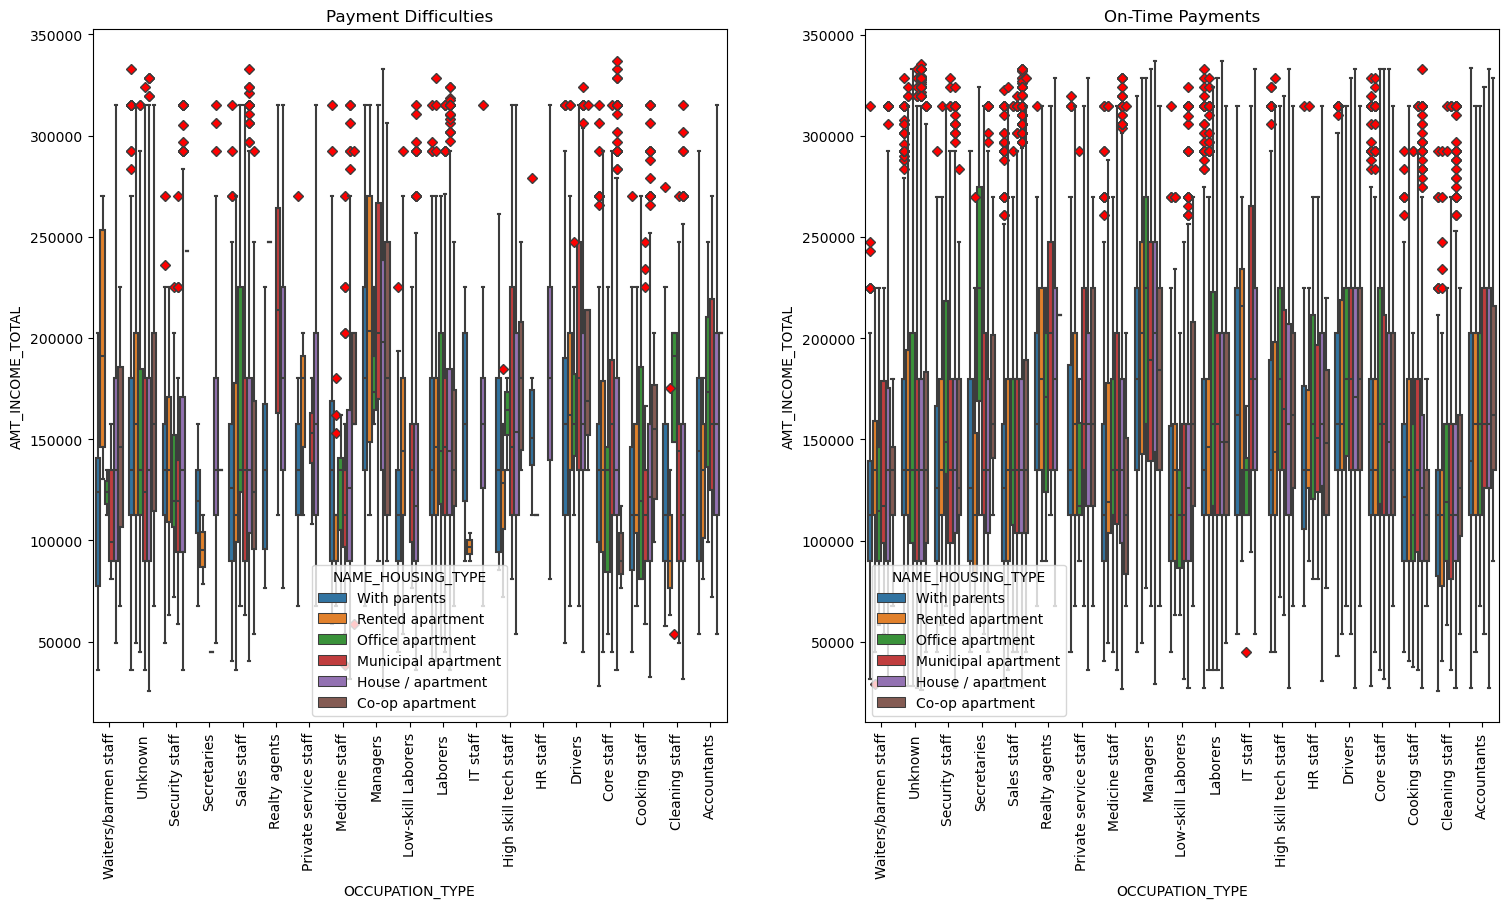

In [301]:
analyze_continuous_variable(df0, df1, 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE')

Тут все дуже важко зрозуміти, тому розіб'ємо цей аналіз на частини.

In [303]:
#розіб'ємо таблицю df0 на частини
df0_1 = df0[df0['NAME_HOUSING_TYPE'].isin(['With parents', 'Rented apartment'])]
df0_2 = df0[df0['NAME_HOUSING_TYPE'].isin(['Office apartment', 'Municipal apartment'])]
df0_3 = df0[~df0['NAME_HOUSING_TYPE'].isin(['With parents', 'Rented apartment', 'Office apartment', 'Municipal apartment'])]


#розіб'ємо таблицю df1 на частини
df1_1 = df1[df1['NAME_HOUSING_TYPE'].isin(['With parents', 'Rented apartment'])]
df1_2 = df1[df1['NAME_HOUSING_TYPE'].isin(['Office apartment', 'Municipal apartment'])]
df1_3 = df1[~df1['NAME_HOUSING_TYPE'].isin(['With parents', 'Rented apartment', 'Office apartment', 'Municipal apartment'])]

'Clients with payment issues' head:
                                   count      mean      std      min  \
OCCUPATION_TYPE NAME_HOUSING_TYPE                                      
Accountants     Rented apartment    7.00 130500.00 39487.34 81000.00   
                With parents       34.00 154588.24 70620.01 54000.00   
Cleaning staff  Rented apartment   15.00  96300.00 29839.93 63000.00   
                With parents       25.00 126684.00 54478.06 57600.00   
Cooking staff   Rented apartment   21.00 132514.29 45972.21 67500.00   

                                        25%       50%       75%       max  
OCCUPATION_TYPE NAME_HOUSING_TYPE                                          
Accountants     Rented apartment  101250.00 135000.00 157500.00 180000.00  
                With parents       92250.00 150750.00 196875.00 369000.00  
Cleaning staff  Rented apartment   76500.00  90000.00 112500.00 175500.00  
                With parents       90000.00 112500.00 157500.00 274500.00  
Coo

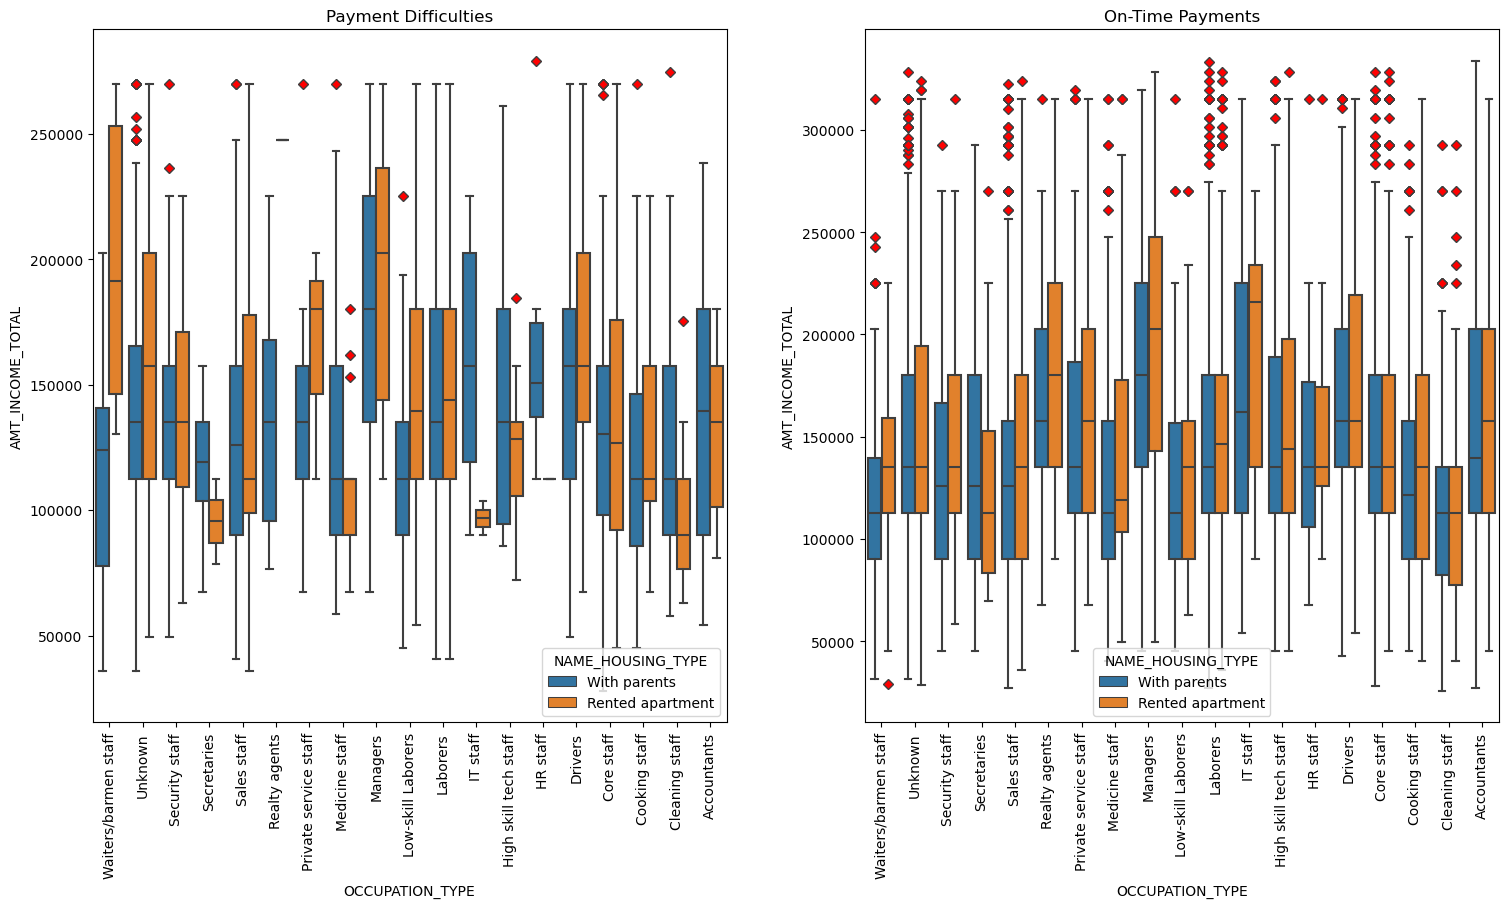

In [304]:
#тепер проаналізуємо ці частини
analyze_continuous_variable(df0_1, df1_1, 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE')

**Спостереження**
1. З графіку видно, що категорія клієнтів, які не мають проблем по кредиту, мають ширший діапазон доходу. При чому це стосується не лише верхньої межі доходу, а і нижньої. 
2. З цікавого - медіанне значення доходу для клієнтів, що не мають проблем з вчасністю погашення кредиту є нижчим, ніж для клієнтів, які мають складнощі з вчасним погашенням.
3. Загалом клієнти, які живуть в орендованих квартирах і вчасно сплачують кредит, отримують або такий же дохід, як і ті, хто проживає з батьками, або вищий (виключення - секретарі та HR staff)
4. HR staff, які живуть в орендованій квартирі в більшості погашають кредит вчасно. 
5. Те саме стосується і IT staff. Невелика кількість айтівців, які живуть в орендованій квартирі і мають дохід близько 100’000, мають проблеми з вчасним погашенням кредиту. 
6. Цікаво, що практично відсутні проблеми з погашенням кредиту у ріелторів, які проживають в орендованих квартирах. Є невелика частка клієнтів, які все ж таки невчасно сплачують кредит, при тому, що їх дохід високий і складає близько 250’000. Можна було б детальніше дослідити ці випадки. 
7. Велика кількість клієнтів з барменів/офіціантів які проживають в орендованій квартирі і мають високий дохід від 150’000 до 250’000 мають проблеми з вчасністю погашення кредиту. При тому, що основна частина клієнтів цієї ж професії з меншим доходом і які теж проживають в орендованих квартирах, не мають проблем з погашенням кредиту. 

'Clients with payment issues' head:
                                     count      mean       std      min  \
OCCUPATION_TYPE NAME_HOUSING_TYPE                                         
Accountants     Municipal apartment  16.00 198140.62 103481.96 72000.00   
                Office apartment      3.00 250500.00 153022.06 99000.00   
Cleaning staff  Municipal apartment  21.00 137142.86  55472.77 49500.00   
                Office apartment      4.00 159750.00  71293.41 54000.00   
Cooking staff   Municipal apartment  25.00 124380.00  50208.79 58500.00   

                                          25%       50%       75%       max  
OCCUPATION_TYPE NAME_HOUSING_TYPE                                            
Accountants     Municipal apartment 131625.00 177750.00 230625.00 450000.00  
                Office apartment    173250.00 247500.00 326250.00 405000.00  
Cleaning staff  Municipal apartment  90000.00 144000.00 157500.00 270000.00  
                Office apartment    148500.00 19

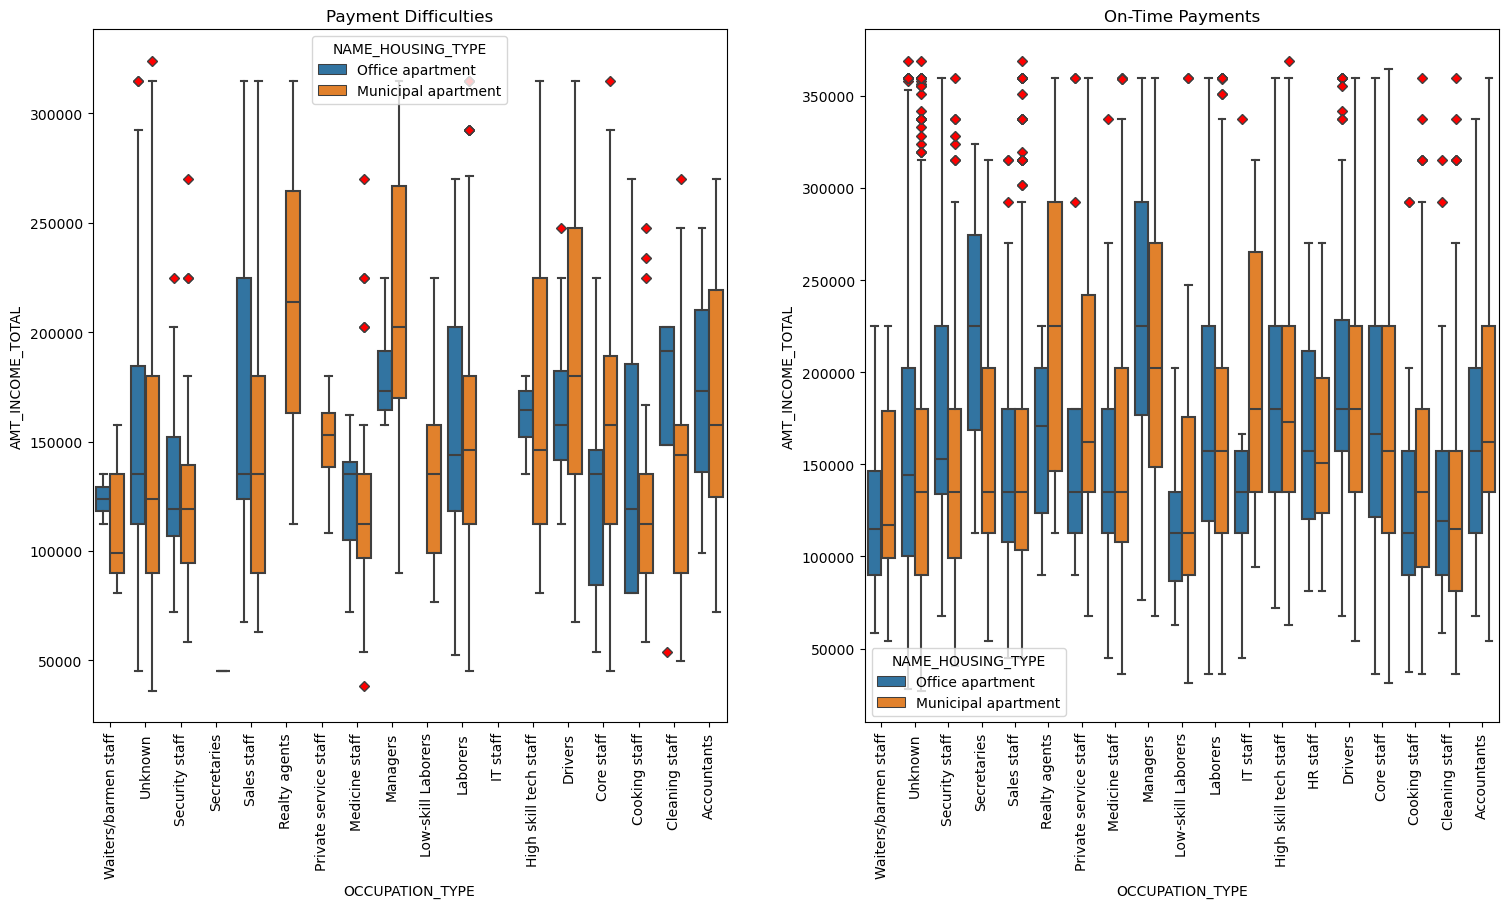

In [305]:
analyze_continuous_variable(df0_2, df1_2, 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE')

**Спостереження**
1. Загалом клієнти, які живуть в офісних квартирах, мають менше проблем з вчасним погашенням кредитів, незалежно від їх доходу. 
2. Секретарі, які живуть в муніципальних або офісних квартирах практично не мають проблем з вчасним погашенням кредиту. За виключенням невеликої кількості, які проживають в муніципальних квартирах і мають дохід нижче 50’000.
3. Цікаво, що менеджери, які проживають в муніципальних квартирах і мають проблеми з вчасним погашенням кредиту, мають вищий медіанний дохід, ніж клієнти цієї ж професії, які не мають проблем з вчасністю погашення кредиту. 
4. Агенти нерухомості, які проживають в офісних квартирах не мають проблем з вчасністю погашення кредиту, в той час, як ті, які проживають в муніципальних квартирах незалежно від рівня їх доходу, можуть бути як серед тих, хто має проблеми з погашенням кредиту, так і ні.
5. Клієнти категорії Private service, які живуть в офісних квартирах, вчасно сплачують за кредит.
6. Серед категорії клієнтів, які є cleaning staff і живуть в офісних квартирах і мають проблеми з вчасною сплатою по кредиту, дохід, як правило вищий, ніж в категорії цієї ж професії, які вчасно сплачують кредит.
7. IT staff, які живуть в муніципальних та офісних квартирах незалежно від їх доходу, не мають проблем з оплатою кредиту.


'Clients with payment issues' head:
                                   count      mean       std       min  \
OCCUPATION_TYPE NAME_HOUSING_TYPE                                        
Accountants     Co-op apartment     2.00 281250.00 111369.32 202500.00   
                House / apartment 412.00 176428.81  78688.65  54000.00   
Cleaning staff  House / apartment 382.00 128646.40  70986.16  31500.00   
Cooking staff   Co-op apartment     7.00 177428.57  79437.31  99000.00   
                House / apartment 517.00 135430.85  60040.04  32400.00   

                                        25%       50%       75%       max  
OCCUPATION_TYPE NAME_HOUSING_TYPE                                          
Accountants     Co-op apartment   241875.00 281250.00 320625.00 360000.00  
                House / apartment 115875.00 157500.00 203625.00 540000.00  
Cleaning staff  House / apartment  90000.00 112500.00 157500.00 720000.00  
Cooking staff   Co-op apartment   128250.00 166500.00 191250.00 3

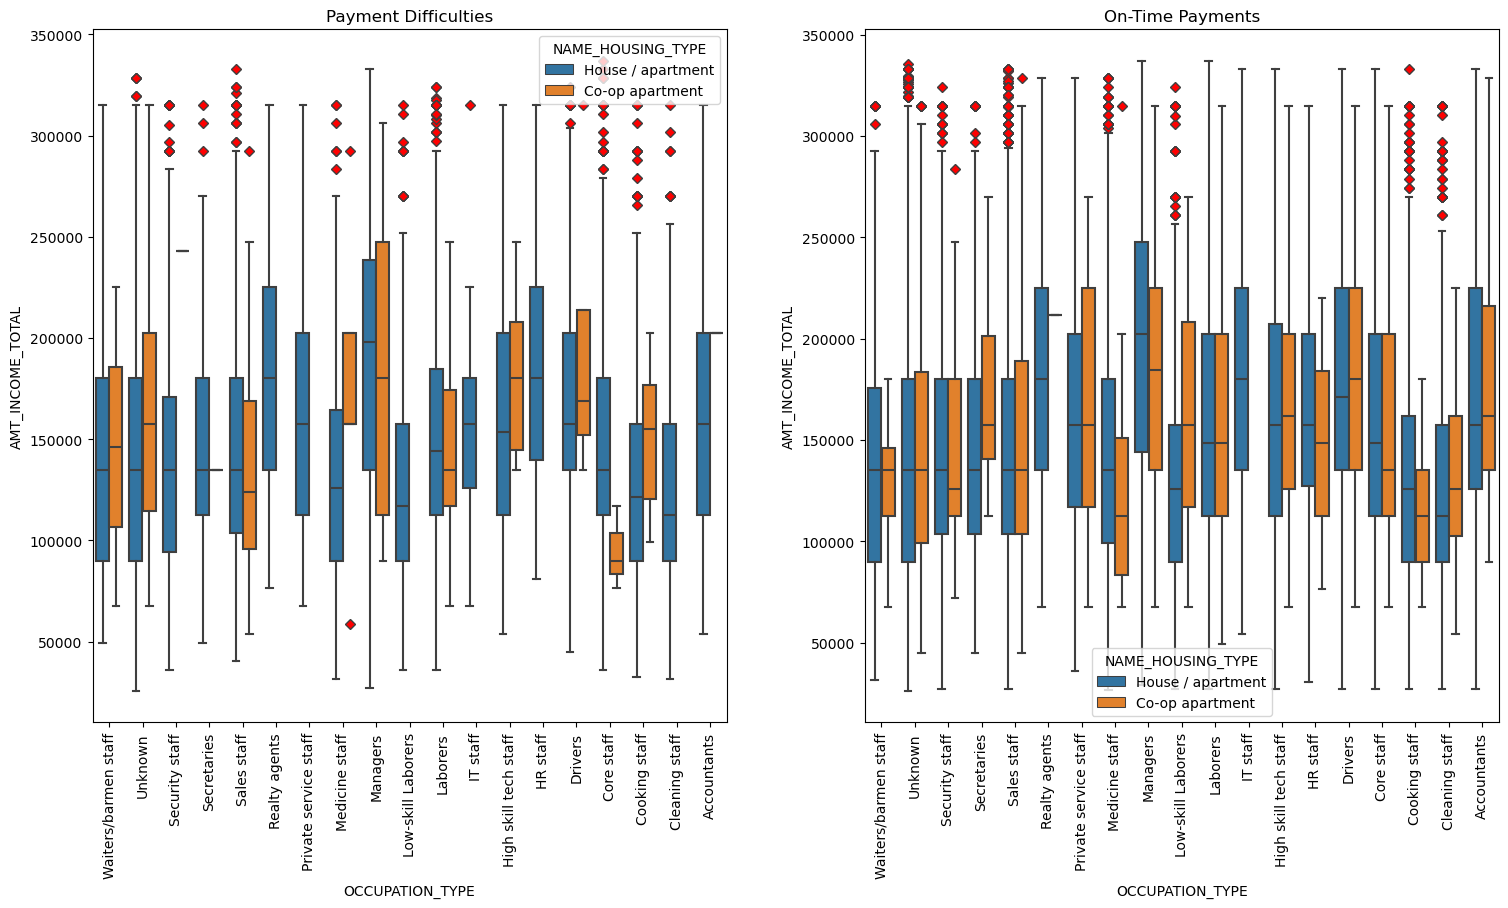

In [307]:
analyze_continuous_variable(df0_3, df1_3, 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE')

**Спостереження**
1. Бухгалтери, секретарі, hr staff, private service, security staff та категорія клієнтів cleqning staff, які живуть в co-op квартирах, незалежно від рівня їх доходу, вчасно сплачують кредити. Є такі, які мають проблеми з вчасною сплатою, але їх кількість мізерно мала. 
2. Цікаво, що серед security staff рівень доходу для тих, хто живе в co-op квартирах і все ж має проблеми з вчасним погашенням, досить високий і складає близько 230’000, що є верхньою межею доходу для тої ж категорії клієнтів, але без проблем щодо погашення кредиту.
3. Основна частина менеджерів з ширшим діапазоном доходу , які проживають в co-op квартирах, мають проблеми з вчасним погашенням. 
4. Дуже мала кількість агентів з нерухомості проживає в co-op квартирах і, як правило, вчасно сплачують кредитне зобов’язання. 
5. Клієнти категорії it staff не проживають в co-op квартирах. 

## Залежності між категоріальними змінними

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [319]:
def bi_countplot_target(df0, df1, column, hue_column):
  group_name = f'Нормалізований розподіл значень за категорією: {column}'
  print(group_name.upper())

  pltname = 'Клієнт зі складнощами щодо платності'
  unique_hue_values = df1[hue_column].unique()
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_size_inches(25,6)

  proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
  proportions = (proportions*100).round(2)
  ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

  # анотація значень в барплоті
  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

  pltname = 'Клієнти зі своєчасними платежами'
  unique_hue_values = df0[hue_column].unique()

  proportions = df0.groupby(hue_column)[column].value_counts(normalize=True)
  proportions = (proportions*100).round(2)
  ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

  plt.show()

  # ---------------
  group_name = f'Кількість значень за категорією: {column}'
  print(group_name.upper())

  pltname = 'Клієнт зі складнощами щодо платності'
  unique_hue_values = df1[hue_column].unique()
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_size_inches(14,4)

  counts = df1.groupby(hue_column)[column].value_counts()
  ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

  for container in ax.containers:
    ax.bar_label(container)

  pltname = 'Клієнти зі своєчасними платежами'
  unique_hue_values = df0[hue_column].unique()

  counts = df0.groupby(hue_column)[column].value_counts()
  ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

  for container in ax.containers:
    ax.bar_label(container)

  plt.show()

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_INCOME_TYPE


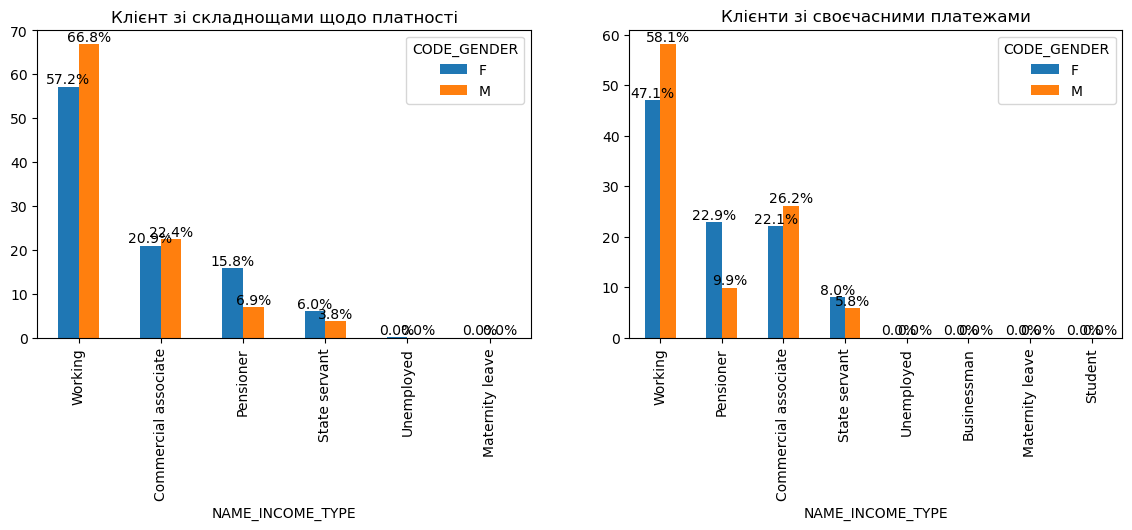

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_INCOME_TYPE


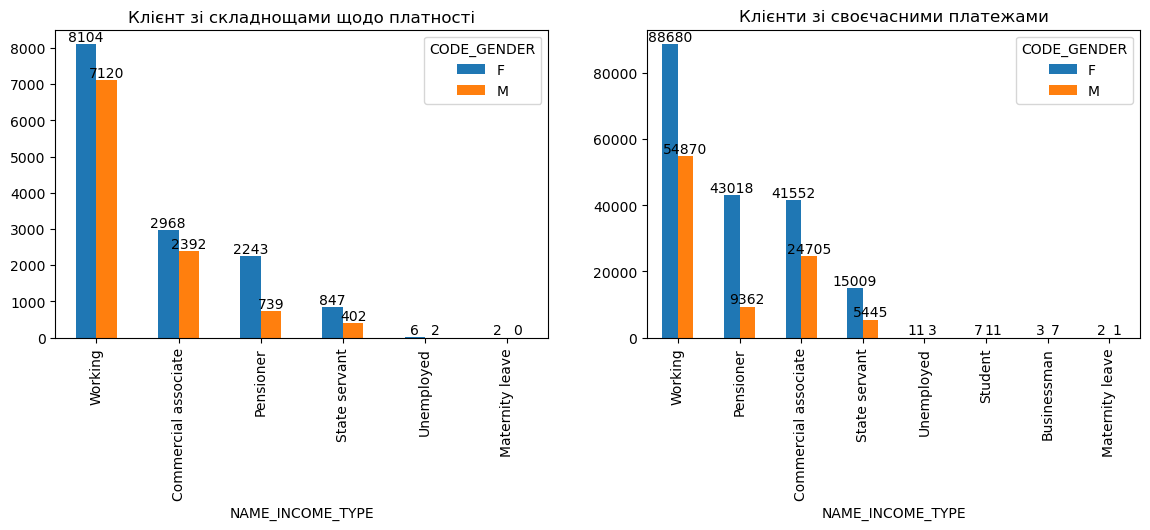

In [246]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER');

**Спостереження**
- Серед клієнтів, які мають складнощі з платністю людей категорії "Працюючі" та "Чоловіки" відсотково значно більше, ніж серед клієнтів, які складнощів з платністю не мають.
- Серед клієнтів, які мають складнощі з платністю людей категорії "Працюючі" та "Жінки" відсотково значно більше, ніж серед клієнтів, які складнощів з платністю не мають.
- Оскільки за обома CODE_GENDER бачимо, що найбільший відсоток клієнтів мають NAME_INCOME_TYPE Working - важливо проаналізувати ще додаткові змінні, які можуть впливати на те, чи буде клієнт мати складнощі з платежами, адже група клієнтів NAME_INCOME_TYPE Working - є в цілому найбільшою в наших даних.
- Клієнти категорії "Бізнесмени" та "Студенти" здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_EDUCATION_TYPE


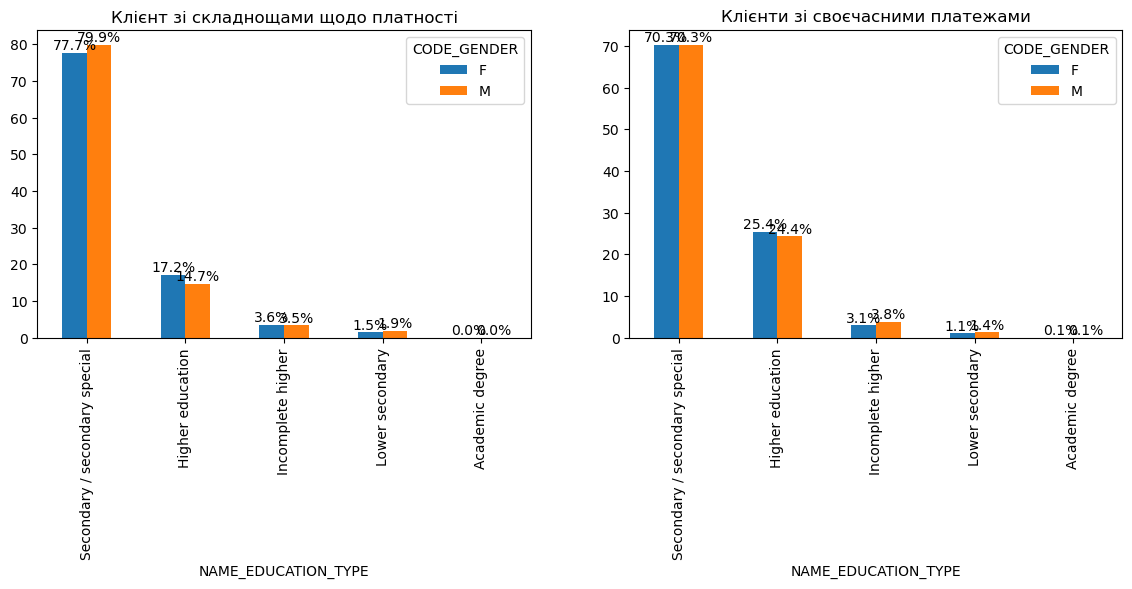

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_EDUCATION_TYPE


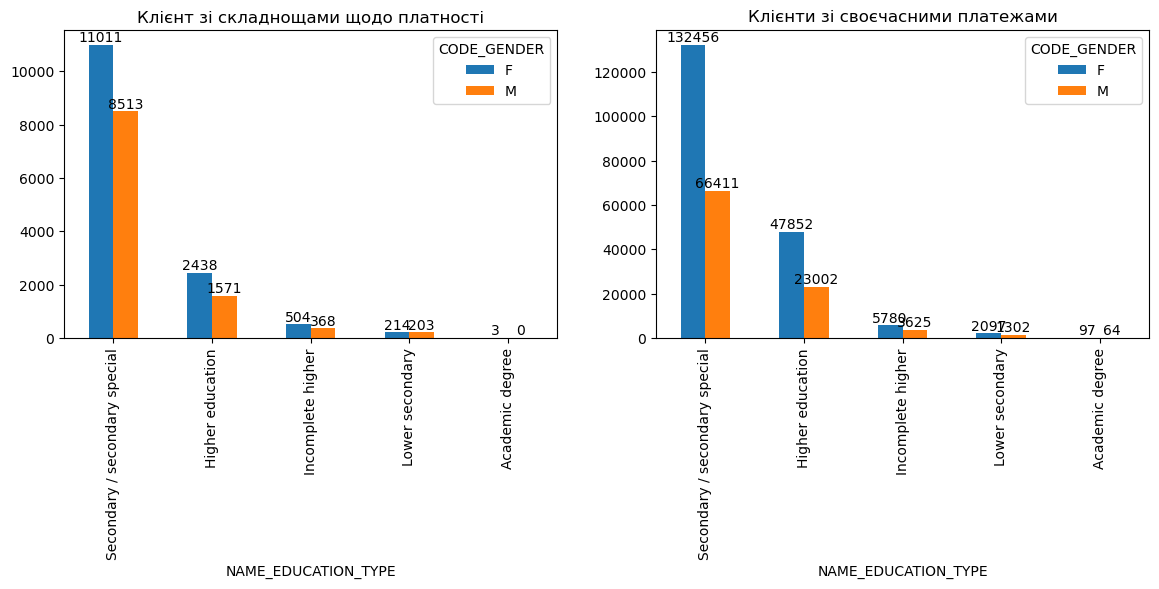

In [310]:
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE','CODE_GENDER')

**Спостереження**
1. Клієнти з secondary/secondary special освітою мають однакову репрезентативність в обох таргетах і є найбільшою серед категорій. 
2. Відсоткове співвідношення клієнтів з вищою освітою більше в таргеті з вчасною сплатою кредиту, як для чоловіків, так і для жінок. 
3. Загалом видно, що в розрізі цих категорій вплив статі на таргет є незначним, оскільки відсоткове співвідношення для обох статей незначно відрізняється в залежності від категорії освіти.

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


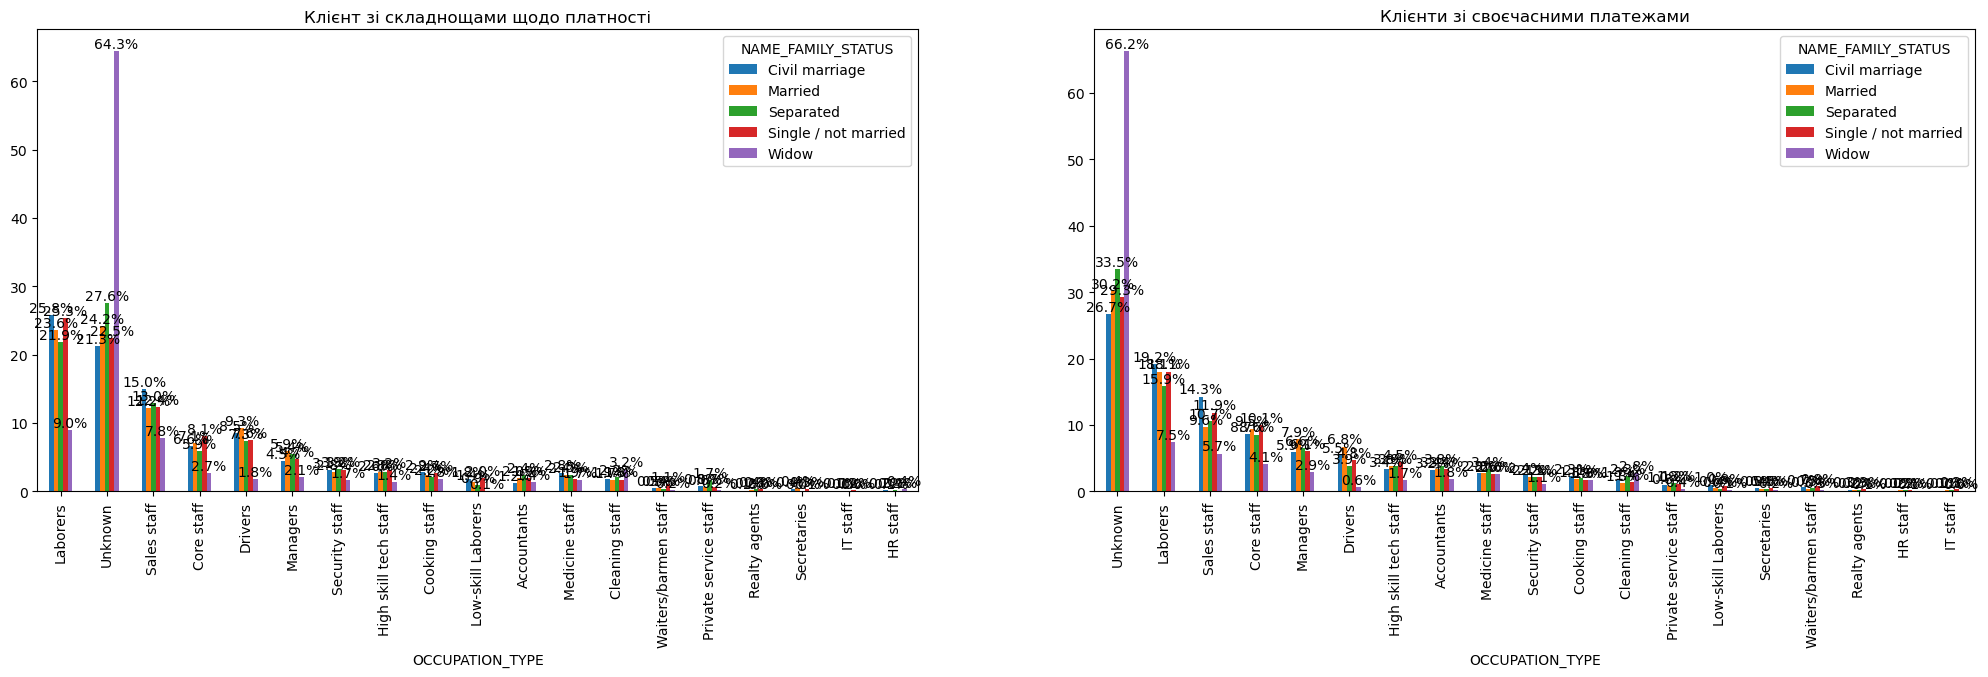

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


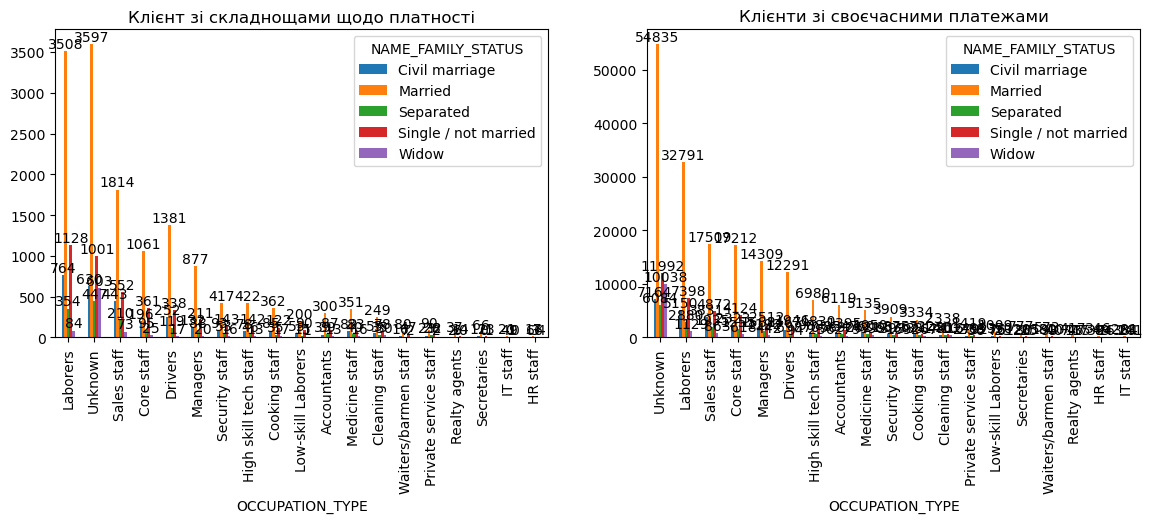

In [321]:
bi_countplot_target(df0, df1,'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS')

In [323]:
#розіб'ємо таблицю df0 на частини за OCCUPATION_TYPE
df0_ot1 = df0[df0['OCCUPATION_TYPE'].isin(['Laborers', 'Unknown', 'Sales staff', 'Core staff'])]


#розіб'ємо таблицю df1 на частини
df1_ot1 = df1[df1['OCCUPATION_TYPE'].isin(['Laborers', 'Unknown', 'Sales staff', 'Core staff'])]

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


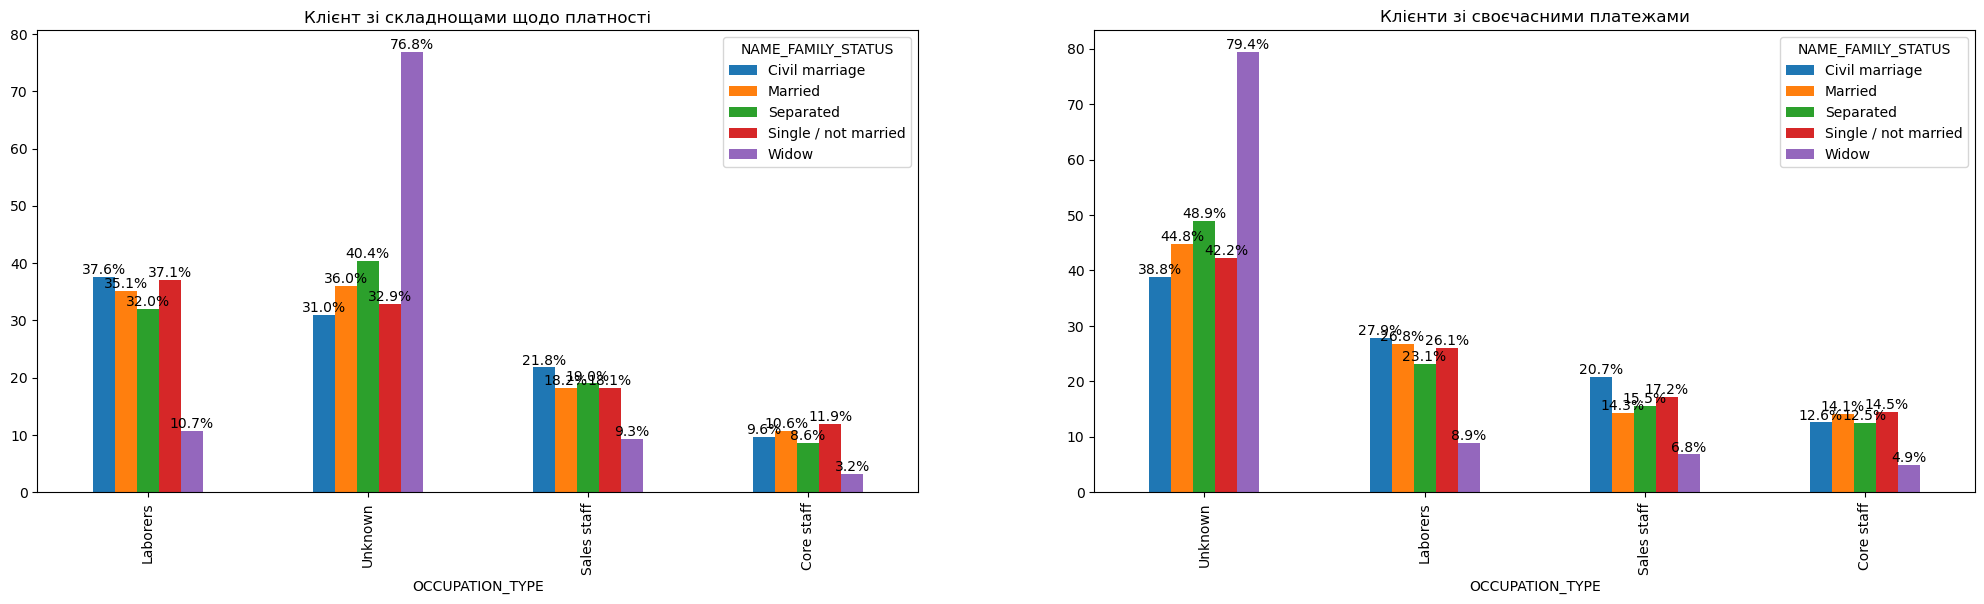

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


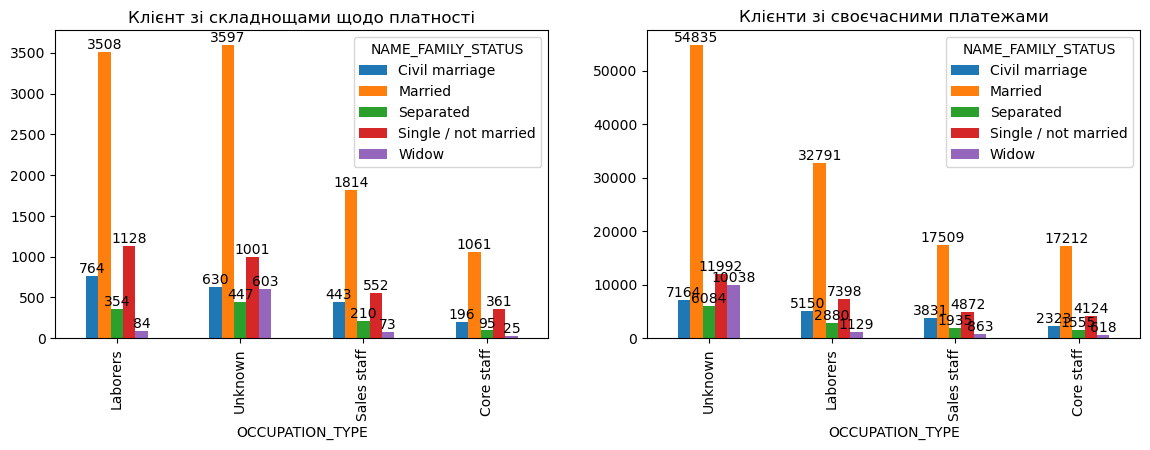

In [324]:
bi_countplot_target(df0_ot1, df1_ot1,'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS')

**Спостереження**
1. Цікаво, що серед Unknown категорії більший відсоток клієнтів, що не мають проблем з вчасною сплатою кредиту, а серед категорії Laborers вищі відносні відсотки незалежно від сімейного статусу (окрім вдівців/вдів) серед тих клієнтів, які мають труднощі зі сплатою кредиту.
2. Для категорій Sales staff та Core staff відсоткове розподілення між таргетами залежно від сімейного статусу відрізняється незначно.

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


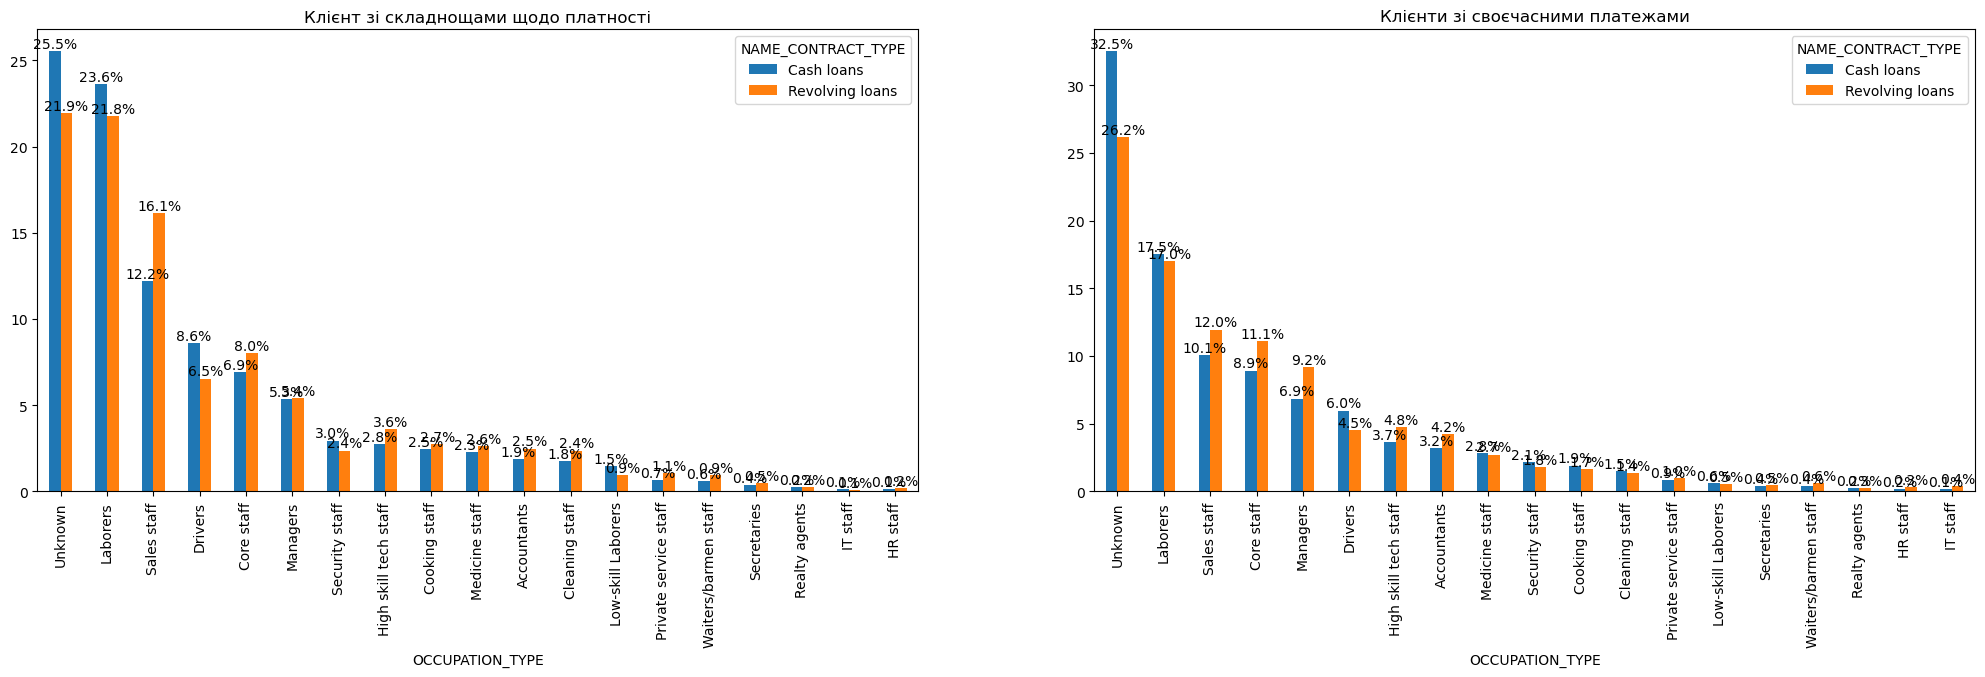

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


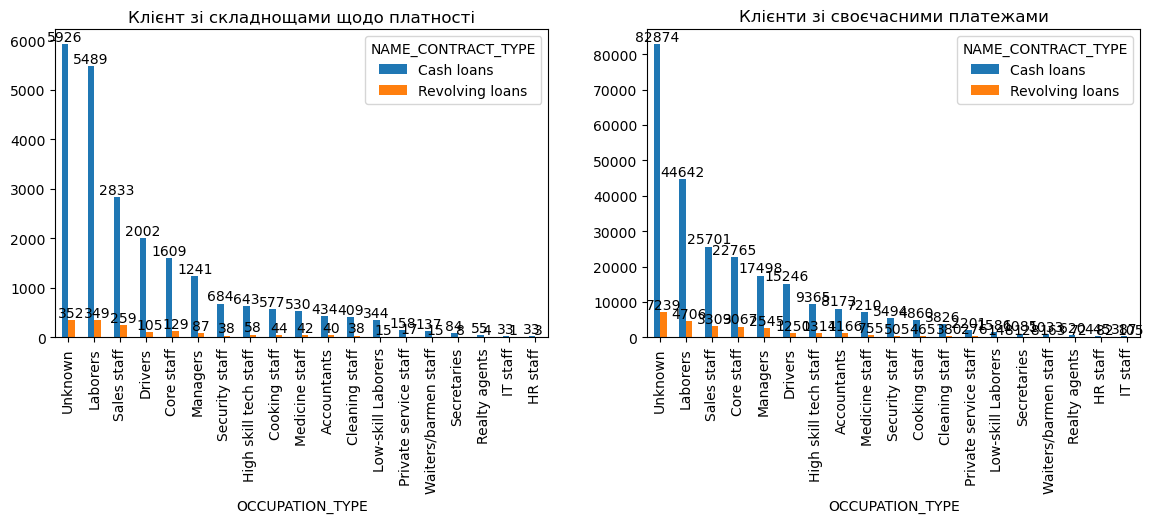

In [325]:
bi_countplot_target(df0, df1,'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE')

**Спостереження**
1. Найбільший відносний відсоток в обох таргетах має категорія клієнтів з невідомим статусом зайнятості. Це стосується обох видів кредитів, але відсоток Cash loans все ж вище.
2. На цьому графіку бачимо підтвердження того, що категорія клієнтів Laborers незалежно вже від типу кредиту, відсотково має більше складнощів з погашенням кредиту, ніж з вчасною оплатою.
3. Також видно, що серед Sales staff вищий відсоток клієнтів, що мають проблеми з погашенням кредиту саме для Revolving loans. 

***
# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.

# Висновок: Категорії клієнтів, на яких слід орієнтуватися при наданні кредиту


Проаналізувавши параметри, можу зробити висновок, що я б підвищила коефіцієнт на видачу кредиту для клієнта, який відповідав би наступним параметрам:
- жіночої статі, 
- Income_type: Commercial associate, Pensioner, State servant.
- Працювали більше 2000 днів
- Higher education
- Married
- '> 41 years old
- мають заставу до 170000 або вище 580000
Зрозуміло з даних, що більшість клієнтів подаються зі статусом Laborer, але по параметрам, які я описала вище була відносно найбільша кількість клієнтів, які не мали проблем з вчасним поверненням кредиту.